<a href="https://colab.research.google.com/github/maguerreberry/indicadores_mercosur/blob/master/practico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En el presente práctico, se analizan las bases de datos disponibles en la página del Banco Mundial, las cuales presentan los valores de diversos Features (variables) para cinco indicadores (Género, Pobreza, Educación, Ambiente, Salud y Protección Social), desde el año 1960 a 2019. Específicamente, exploraremos y analizaremos gráficamente los Features para los países del Mercosur: Argentina, Brasil, Paraguay, Uruguay, Venezuela, Bolivia, Chile, Colombia, Ecuador, Guyana, Perú y Surinam. El objetivo final, más allá del alcance del presente práctico, es obtener una predicción aceptable de los valores de ciertos Features de interés, para Argentina y para el año 2019. 

En primer lugar, nos centraremos en analizar la estructura de las bases de datos, y detectar similitudes o diferencias entre bases de datos correspondientes a distintos Indicadores (por ejemplo, cantidad de Features por indicador). En segundo lugar, analizaremos la presencia de valores nulos para los distintos Features por indicador y a través de los años. Este paso es fundamental, dado que los modelos de Aprendizaje Automático, en general, no aceptan valores nulos. En tercer lugar, se analizará la tendencia temporal de aquellos Features por Indicador con la menor cantidad de valores nulos, y se analizará con mayor profundidad la tendencia temporal de 5 Features de  interés del Indicador Género. En cuarto lugar, se explorará la calidad del dato para Features relacionados con grupos históricamente marginados. Finalmente, a modo de ejemplo, se analizarán ciertos Features de Interés para Argentina, y se propondrá una hipótesis relacionada al contexto político-económico-social que intenten explicar la tendencia temporal de los mismos.

Al final, se resumirán las conclusiones más importantes que fueron obtenidas durante la realización del práctico, y se insinuará un camino a seguir para continuar con el análisis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setear el path de su drive personal donde se encuentran los datasets
#BASE_DIR = '/content/drive/My Drive/Mentoria/datasets/' # path de Nico
BASE_DIR = '/content/drive/My Drive/DiploDatos/Mentoria/datasets/' # path de Pablo
#BASE_DIR = '/content/drive/My Drive/DiploDatos/Mentoria/datasets/' # path de Matt

In [ ]:
import pandas as pd
import numpy as np
#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Para que pandas no trunque aquellas celdas con contenido muy largo (como textos)
#pd.set_option('display.max_colwidth', -1)
# Para que pandas no trunque la vista de todas las columnas
pd.set_option('display.max_columns', None, "display.max_rows", 10)

In [ ]:
education = pd.read_csv(BASE_DIR + 'educacion_mercosur_cleaned.csv')
gender = pd.read_csv(BASE_DIR + 'gender_mercosur_cleaned.csv')
environment = pd.read_csv(BASE_DIR + 'environment_mercosur_cleaned.csv')
health = pd.read_csv(BASE_DIR + 'health_mercosur_cleaned.csv')
poverty = pd.read_csv(BASE_DIR + 'poverty_mercosur_cleaned.csv')
social_protection = pd.read_csv(BASE_DIR + 'socialprotection_mercosur_cleaned.csv')

In [ ]:
#Corección del nombre de la primera columna
education = education.rename(columns={"Unnamed: 0": "Features"})
gender = gender.rename(columns={"Unnamed: 0": "Features"})
environment = environment.rename(columns={"Unnamed: 0": "Features"})
health = health.rename(columns={"Unnamed: 0": "Features"})
poverty = poverty.rename(columns={"Unnamed: 0": "Features"})
social_protection = social_protection.rename(columns={"Unnamed: 0": "Features"})

In [ ]:
dataset = pd.concat([education, gender, environment, health, poverty, social_protection])
dataset.rename(columns={"Country Code": "CCod", "Indicator Code": "ICod", "Country Name": "Pais"}, inplace=True)
dataset.columns = dataset.columns.map(lambda x: str(x[:4]))
dataset.sample(5)

Feat               Indi  \
529  Prevalencia de emaciación (% de menores de 5 a...             Health   
981  Inscripción escolar, nivel primario, varones (...             Gender   
882  Emisiones agrícolas de gas metano (miles de to...        Environment   
81   Proporción de niñas con respecto a niños en ed...             Gender   
412  Fuerza laboral con educación básica (% del total)  Social_protection   

          Pais CCod                  ICod        1970        1971        1972  \
529  Venezuela  VEN        SH.STA.WAST.ZS         NaN         NaN         NaN   
981   Suriname  SUR        SE.PRM.NENR.MA         NaN         NaN         NaN   
882   Suriname  SUR  EN.ATM.METH.AG.KT.CE  495.163645  497.099335  457.213347   
81   Argentina  ARG     SE.ENR.PRSC.FM.ZS    1.033830    1.024740    1.011950   
412  Venezuela  VEN        SL.TLF.BASC.ZS         NaN         NaN         NaN   

           1973       1974        1975        1976        1977        1978  \
529         NaN        NaN         NaN         NaN         NaN         NaN   
981         NaN        NaN         NaN         NaN   95.074770   96.996650   
882  529.352972  513.22357  536.930947  538.305173  543.014371  600.040556   
81     1.013780    1.00782    1.010620    1.012230    1.018520    1.031830   
412         NaN        NaN         NaN         NaN         NaN         NaN   

           1979        1980        1981        1982        1983        1984  \
529         NaN         NaN         NaN         NaN         NaN         NaN   
981         NaN         NaN         NaN         NaN         NaN         NaN   
882  635.871873  690.465424  740.793626  748.425472  745.571545  750.645833   
81     1.020990    1.024400    1.022780    1.009160         NaN    1.011940   
412         NaN         NaN         NaN         NaN         NaN         NaN   

           1985        1986        1987        1988        1989        1990  \
529         NaN         NaN    2.200000         NaN         NaN    5.700000   
981         NaN         NaN         NaN         NaN         NaN         NaN   
882  742.125741  739.009532  703.400571  687.174557  685.882241  534.285597   
81     1.021050    1.007010    1.007760    1.047460         NaN         NaN   
412         NaN         NaN         NaN         NaN         NaN         NaN   

           1991        1992        1993        1994        1995        1996  \
529    4.500000    4.300000    4.000000    3.800000    3.800000    3.800000   
981         NaN         NaN         NaN         NaN         NaN         NaN   
882  588.390605  648.835248  559.191491  523.357738  551.045163  549.177942   
81          NaN         NaN         NaN         NaN         NaN    1.019280   
412         NaN         NaN         NaN         NaN         NaN         NaN   

           1997        1998        1999        2000        2001      2002  \
529    3.800000    4.400000    4.000000    3.900000    4.400000    4.8000   
981         NaN         NaN         NaN         NaN         NaN       NaN   
882  479.231059  459.580265  450.077059  408.120796  470.603329  403.8930   
81     1.021060    1.008990    1.022970    1.015870    1.017790    1.0181   
412         NaN         NaN         NaN         NaN         NaN       NaN   

           2003        2004        2005        2006        2007        2008  \
529    5.200000    5.200000    4.800000    4.800000    5.000000    4.500000   
981         NaN         NaN   81.978430   83.618840   81.996210   86.934550   
882  483.975143  477.958528  478.628303  475.817914  473.969847  471.354972   
81     1.022080    1.027790    1.033000    1.040220    1.046380    1.050010   
412         NaN         NaN   63.776100   64.201500   63.794899   63.713699   

          2009      2010       2011       2012      2013      2014      2015  \
529   4.100000       NaN        NaN        NaN       NaN       NaN       NaN   
981  89.327220  86.84577  84.819930  85.352250  85.04044  84.13737  86.40897   
882        NaN       NaN    

# PARTE 1

## Pregunta 1.1

¿Cuántos tipos de Features diferentes existen por indicador considerado? ¿Todos los países mantienen esa misma cantidad para el mismo indicador?

### Respuesta
A continuación, se muestra una tabla en la que se observa el número de features por indicador para cada país. Como puede observarse todos los indicadores tienen el mismo número de features para todos los paises. 

In [ ]:
dataset.groupby(['Indi', 'Pais']).count().reset_index().pivot(index='Indi', columns='Pais', values='Feat')

Pais               Argentina  Bolivia  Brasil  Chile  Colombia  Ecuador  \
Indi                                                                      
Education                106      106     106    106       106      106   
Environment               76       76      76     76        76       76   
Gender                    83       83      83     83        83       83   
Health                   112      112     112    112       112      112   
Poverty                   15       15      15     15        15       15   
Social_protection         93       93      93     93        93       93   

Pais               Guyana  Paraguay  Perú  Suriname  Uruguay  Venezuela  
Indi                                                                     
Education             106       106   106       106      106        106  
Environment            76        76    76        76       76         76  
Gender                 83        83    83        83       83         83  
Health                112       112   112       112      112        112  
Poverty                15        15    15        15       15         15  
Social_protection      93        93    93        93       93         93

In [ ]:
dataset.groupby(['Indi', 'Pais'])

## Pregunta 1.2

¿Cuál es la proporción de valores nulos para cada Feature dentro de cada Indicador con respecto al intervalo temporal considerado? ¿Estos valores nulos se encuentran dispersos a lo largo de todo el intervalo temporal o existen agrupamientos (más chicos y/o más grandes) de los mismos? ¿Qué decisión se podría tomar con respecto a los mismos en un futuro?

### Respuesta
Para responder esta pregunta, calculamos la proporción de valores nulos para cada Feature de cada Indicador por año, agrupando todos los países. Con esta información contruimos mapas de calor que muestran la distribución de los valores nulos por Feature y por Año: las celdas azules indican años en los que el feature en cuestión no tiene valores nulos, mientras que las celdas rojas indican años en los que el feature en cuestión tiene todos valores nulos; colores intermedios indican proporciones intermedias de valores nulos para ese año, para el feature en cuestión. Para una lectura gráfica más cómoda, realizamos un gráfico para cada Indicador, debido a la cantidad de variables analizadas.

Existen agrupamientos de valores nulos que varían en funcíon del Indicador analizado. Debajo de cada gráfico correspondiente a cada indicador, se describe lo observado en cada caso.

In [ ]:
# Creo un dataset agrupado por Indicadores y Features (con el código "ICod") sumando para cada feature los valores no nulos por países.
df_ic = dataset.groupby(['Indi','ICod'], as_index = False).count() 
#Separo las primeras 2 columnas con la información que quiero mantener por fila (Indicador y Código del Feature)
df_ic_2 = df_ic.iloc[:, 0:2] 
#Tomando solo las columnas correspondientes a los años (1970 a 2018), calculo la proporción de valores nulos por año para cada Feature.
df_ic = df_ic.iloc[:, 5:(len(df_ic.columns) - 1)].transform(lambda x: (12 - x)/12)
#Uno las columnas reservadas anteriormente al cálculo de proporción de valores nulos.
df_ic = pd.concat([df_ic_2, df_ic], axis=1) 
#Incluyo los ICod como índices de las filas.
df_ic.index = df_ic['ICod'] 

#Creo una columna con una variable auxiliar que es la suma por fila de la proporción de valores nulos para cada Feature.
df_ic['sum_NA'] = df_ic.iloc[:,1:(len(df_ic.columns) - 1)].sum(axis=1) 
#Ordeno el dataframe de modo que los Features me queden ordenados en función de la proporción de valores nulos (Featues más "completos" en la parte superior).
df_ic_sort = df_ic.sort_values('sum_NA')
df_ic_sort

Indi               ICod  1970  1971  1972  \
ICod                                                                        
SP.POP.6569.MA.5Y             Health  SP.POP.6569.MA.5Y   0.0   0.0   0.0   
SP.POP.80UP.FE.5Y             Health  SP.POP.80UP.FE.5Y   0.0   0.0   0.0   
SP.POP.7579.MA.5Y             Health  SP.POP.7579.MA.5Y   0.0   0.0   0.0   
SP.POP.7579.FE.5Y             Health  SP.POP.7579.FE.5Y   0.0   0.0   0.0   
SP.POP.0014.TO.ZS          Education  SP.POP.0014.TO.ZS   0.0   0.0   0.0   
...                              ...                ...   ...   ...   ...   
SL.TLF.PART.FE.ZS  Social_protection  SL.TLF.PART.FE.ZS   1.0   1.0   1.0   
SL.TLF.PART.FE.ZS             Gender  SL.TLF.PART.FE.ZS   1.0   1.0   1.0   
SL.TLF.PART.MA.ZS             Gender  SL.TLF.PART.MA.ZS   1.0   1.0   1.0   
SL.TLF.PART.ZS     Social_protection     SL.TLF.PART.ZS   1.0   1.0   1.0   
SL.EMP.SMGT.FE.ZS  Social_protection  SL.EMP.SMGT.FE.ZS   1.0   1.0   1.0   

                   1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
ICod                                                                            
SP.POP.6569.MA.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.80UP.FE.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.7579.MA.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.7579.FE.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.0014.TO.ZS   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
SL.TLF.PART.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.TLF.PART.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.TLF.PART.MA.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.TLF.PART.ZS      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.EMP.SMGT.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                   1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  \
ICod                                                                            
SP.POP.6569.MA.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.80UP.FE.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.7579.MA.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.7579.FE.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
SP.POP.0014.TO.ZS   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
SL.TLF.PART.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.TLF.PART.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.TLF.PART.MA.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.TLF.PART.ZS      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
SL.EMP.SMGT.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                   1993  1994  1995  1996  1997  1998  1999      2000  \
ICod                                                                    
SP.POP.6569.MA.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
SP.POP.80UP.FE.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
SP.POP.7579.MA.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
SP.POP.7579.FE.5Y   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
SP.POP.0014.TO.ZS   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
...                 ...   ...   ...   ...   ...   ...   ...       ...   
SL.TLF.PART.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0  0.916667   
SL.TLF.PART.FE.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0  0.916667   
SL.TLF.PART.MA.ZS   1.0   1.0   1.0   1.0   1.0   1.0   1.0  0.916667   
SL.TLF.PART.ZS      1.0   1.0   1.0   1.0   1.0   1.0   1.0  0.916667   
SL.EMP.SMGT.FE.ZS   1.0   1.0   1.0   1.0   1.

In [ ]:
#Función para realizar los gráficos por Indicador. El gráfico es un mapa de calor que representa la proporción de NA de cada Feature para cada año. 
def plot_indicator_heatmap(indicator, figsize):
    plt.figure(figsize = figsize)
    sns.heatmap(data = df_ic_sort[df_ic_sort.Indi == indicator].iloc[:,2:-1],linewidths=.5, vmin=0, vmax=1, cmap="coolwarm")
    plt.title('Proporcióón de valores nulos por año para los índices del indicador '+indicator+'\n')
    plt.xlabel("\nAños")
    plt.xticks(rotation=45)
    plt.ylabel("Código del Feature")

#### Mapa de calor: Género

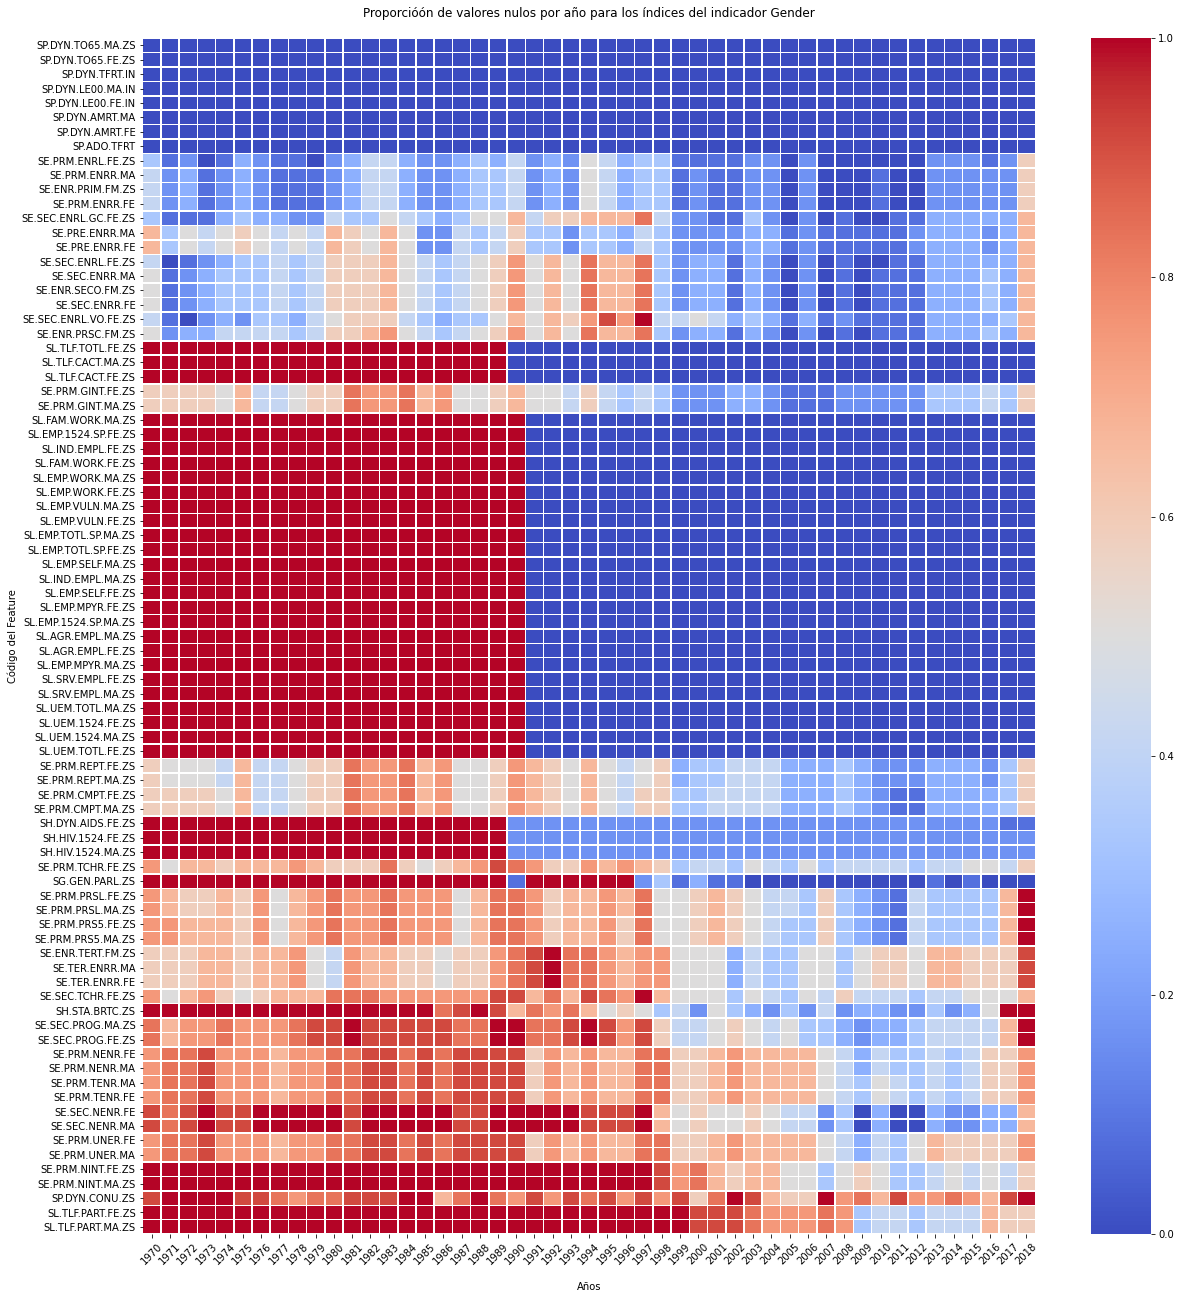

In [ ]:
#Género
plot_indicator_heatmap('Gender', (20, 22))

Para el indicador de **Género**, se observa que sólo 8 (de un total de 83) Features poseen datos completos para todos los países en el intervalo de tiempo estudiado (1970-2018). Además, llamativamente, existe un conjunto de Features que se presentan de forma completa (o casi completa) a partir de 1990-1991. Esto nos indica que disponemos de datos en ese intervalo temporal para el Feature dado para casi todos los países.

De todos modos, visualmente se observa que para la mayoría de los Features no se dispone de datos para todos los países y para todos los años. Esto es extremo en algunos Features particulares, para los cuales se tienen datos en un período muy acotado de años y sólo para algunos países (últimas filas del mapa de calor).

#### Mapa de calor: Pobreza

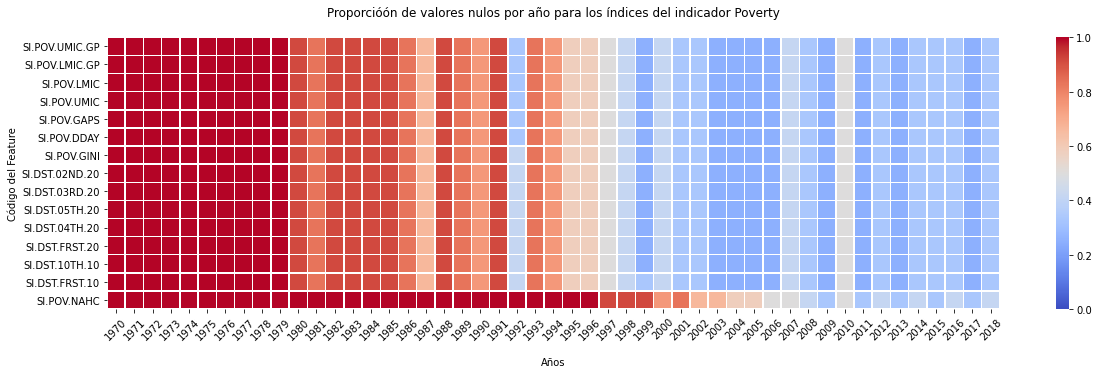

In [ ]:
#Pobreza
plot_indicator_heatmap('Poverty', (20, 5))

Para el indicador de **Pobreza**, no se observa ninguna Feature para la cuál existan datos completos para todos los países en el intervalo de tiempo estudiado. Asimísmo, prácticamente no hay datos previos al año 1980 para la mayoría de los Features.

Además, exceptuando la última fila del mapa de calor, la distribución de los valores nulos es comparable para el resto de las Features. Esto nos podría indicar que algunas Features poseen datos nulos para los mismos países y años.

#### Mapa de calor: Educación

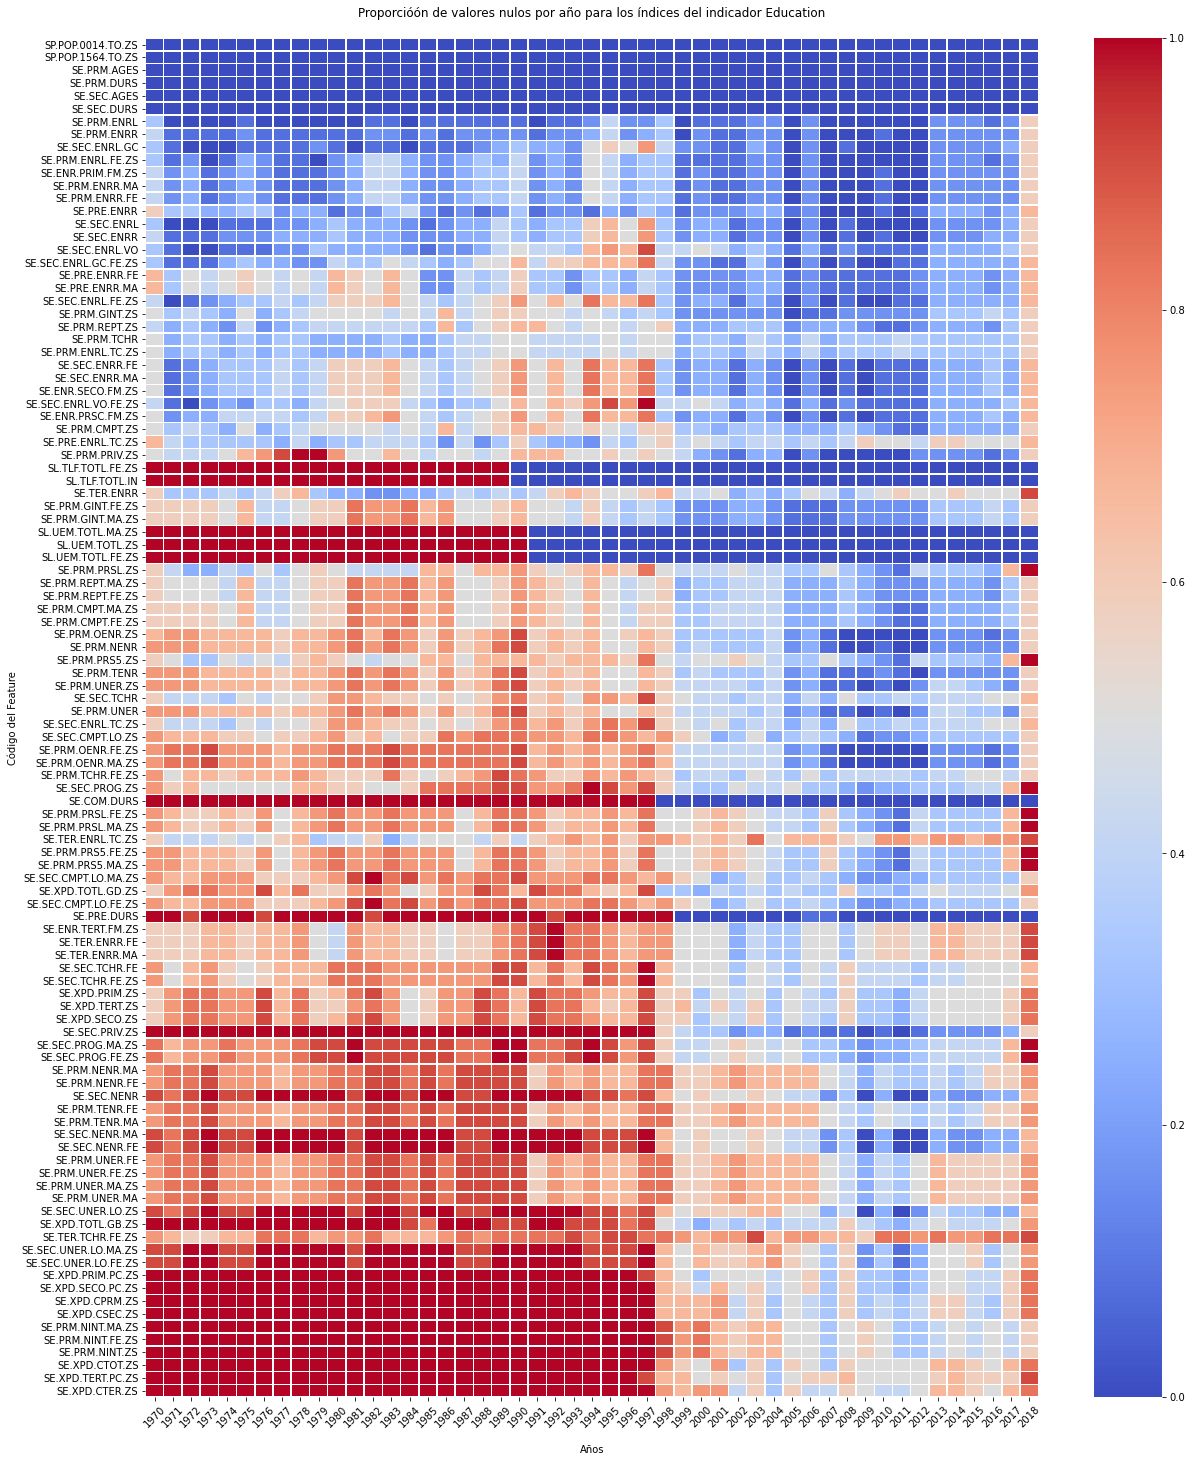

In [ ]:
#Educación
plot_indicator_heatmap('Education', (20, 25))

Para el indicador de **Educación**, se observa un patrón similar que el descripto para Género, pero más marcado. Aquí sólo 6 (de un total de 106) Features poseen datos completos para todos los países en el intervalo de tiempo estudiado (1970-2018). Además, llamativamente, existe un conjunto de Features que se presentan de forma completa a partir de 1989-1990. Y otras dos Features que están completas a partir de 1998 y 1999, respectivamente. Esto nos indica que disponemos en ese intervalo temporal de datos para el Feature dado para todos los países seleccionados.

De todos modos, al igual que para el indicador Género, visualmente se observa que para la mayoría de los Features no se dispone de datos para todos los países y para todos los años. 

#### Mapa de calor: Ambiente

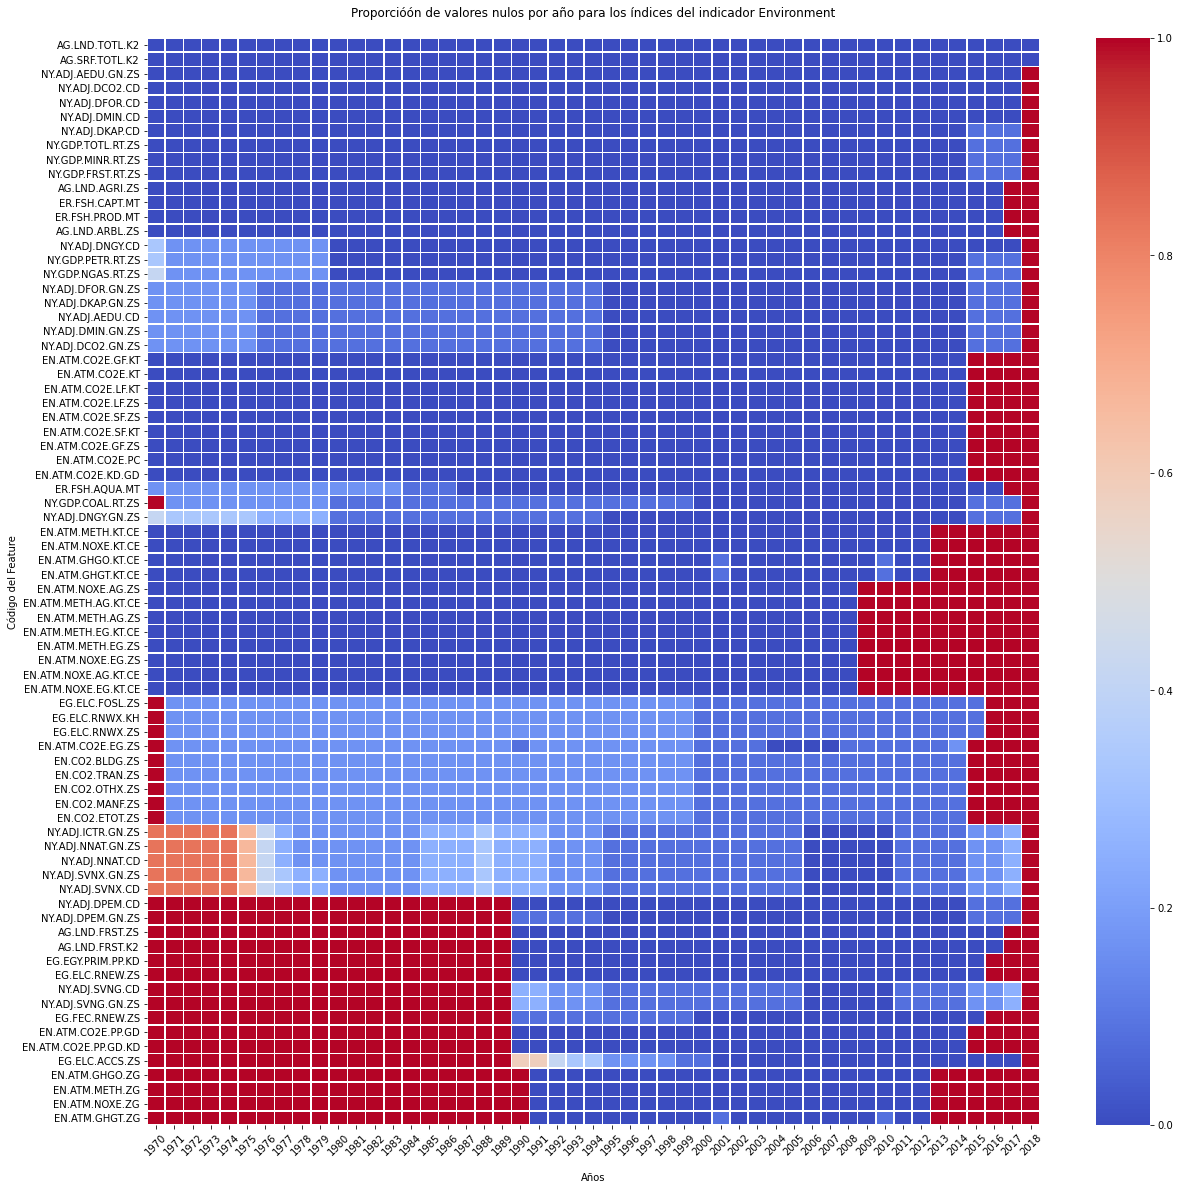

In [ ]:
#Ambiente
plot_indicator_heatmap('Environment', (20, 20))

Para el indicador **Ambiente**, llamativamente la proporción de datos nulos es realtivamente baja respecto de los indicadores analizados previamente. Solo 2 Features se encuentran completos par todos los años. Alrededor de la mitad de los Features para este indicador poseen buena cobertura de datos en el intervalo de tiempo estudiado. Sin embargo, llamativamente, gran parte de estos comienzan a tener datos nulos en los años más cercanos al presente (un grupo a partir del año 2015 aproximádamente, y otro grupo a partir del año 2009 aproximádamente). Por otro lado, 16 Features de 76 del total, presentan valores nulos hasta el año 1989/1990, a partir del cual comienzan a observarse datos no nulos.

#### Mapa de calor: Salud

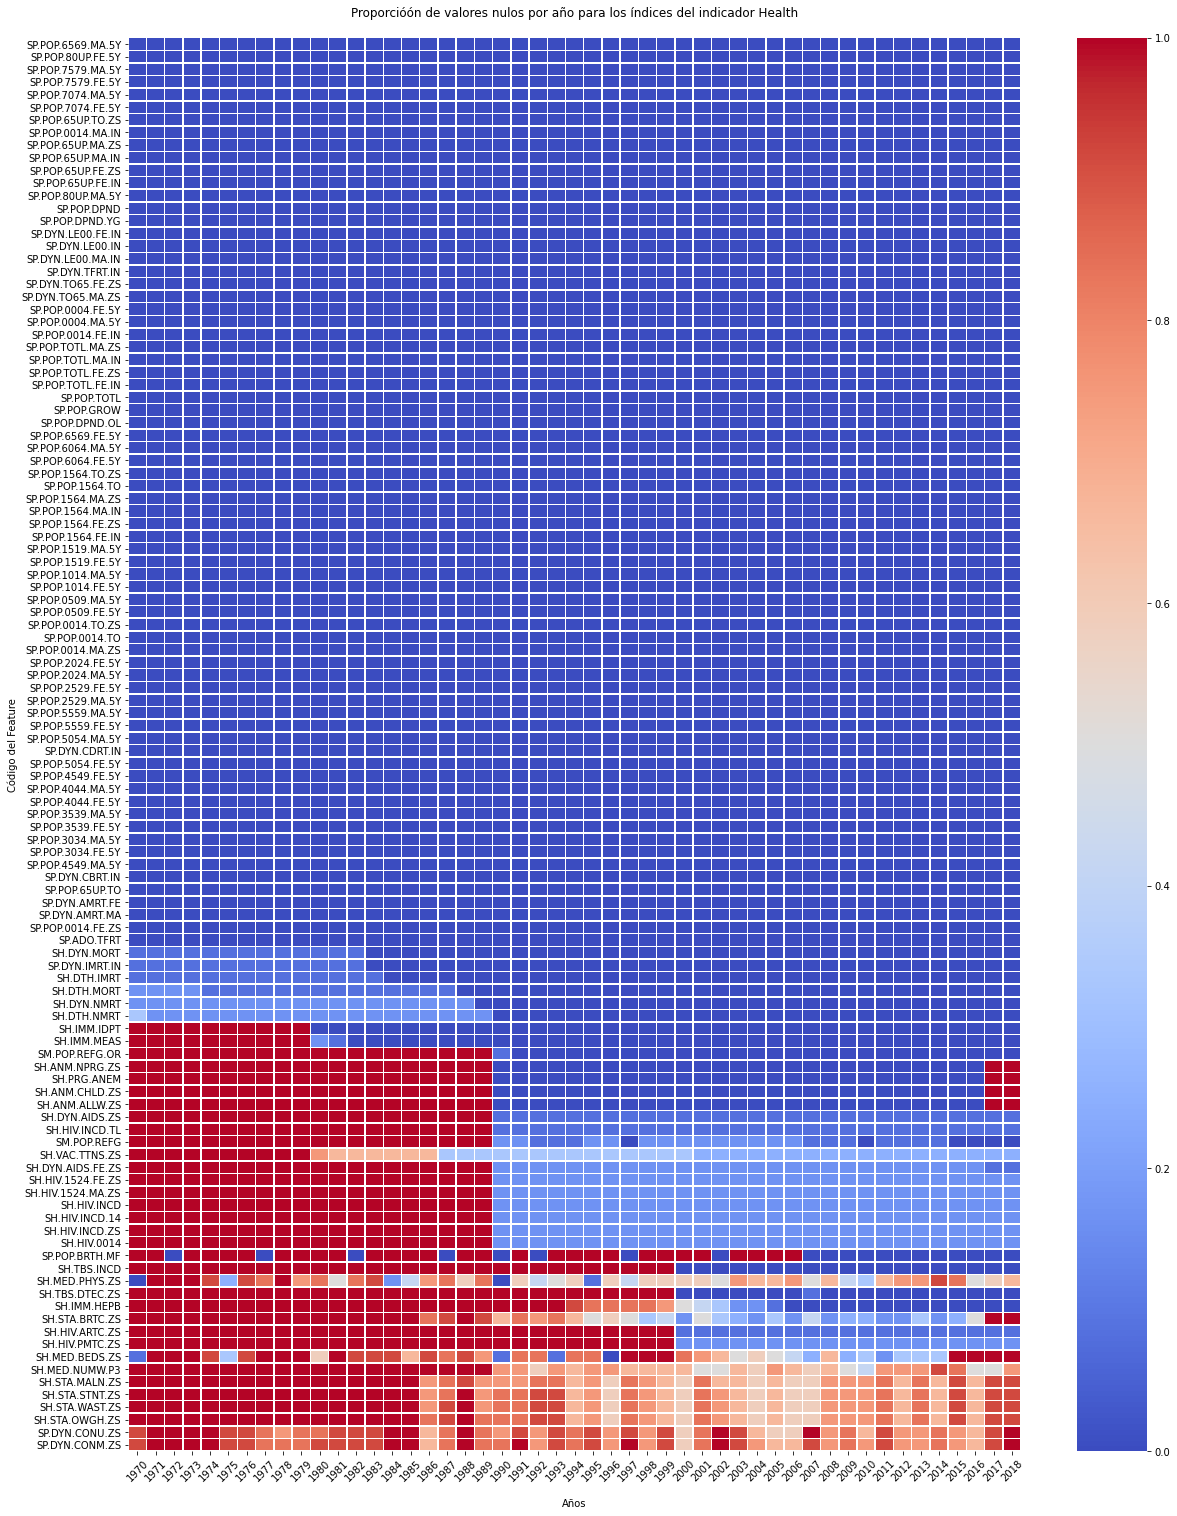

In [ ]:
#Salud
plot_indicator_heatmap('Health', (20, 26))

Para el indicador **Salud**, se observa que alrededor de 3/4 partes de los Features poseen nula o poca proporción de valores nulos. Comparativamente, este indicador se encuentra en mejor posicionado frente al resto en cuanto a la cantidad de datos faltantes.

Alrededor de 15 Features presentan valores nulos hasta el año 1989/1990, a partir del cual comienzan a tener valores no nulos. Finalmente, 8 Features poseen mucha proporción de valores nulos durante todo el intervalo de tiempo estudiado (ver últimas filas del mapa de calor). 

#### Mapa de calor: Protección social

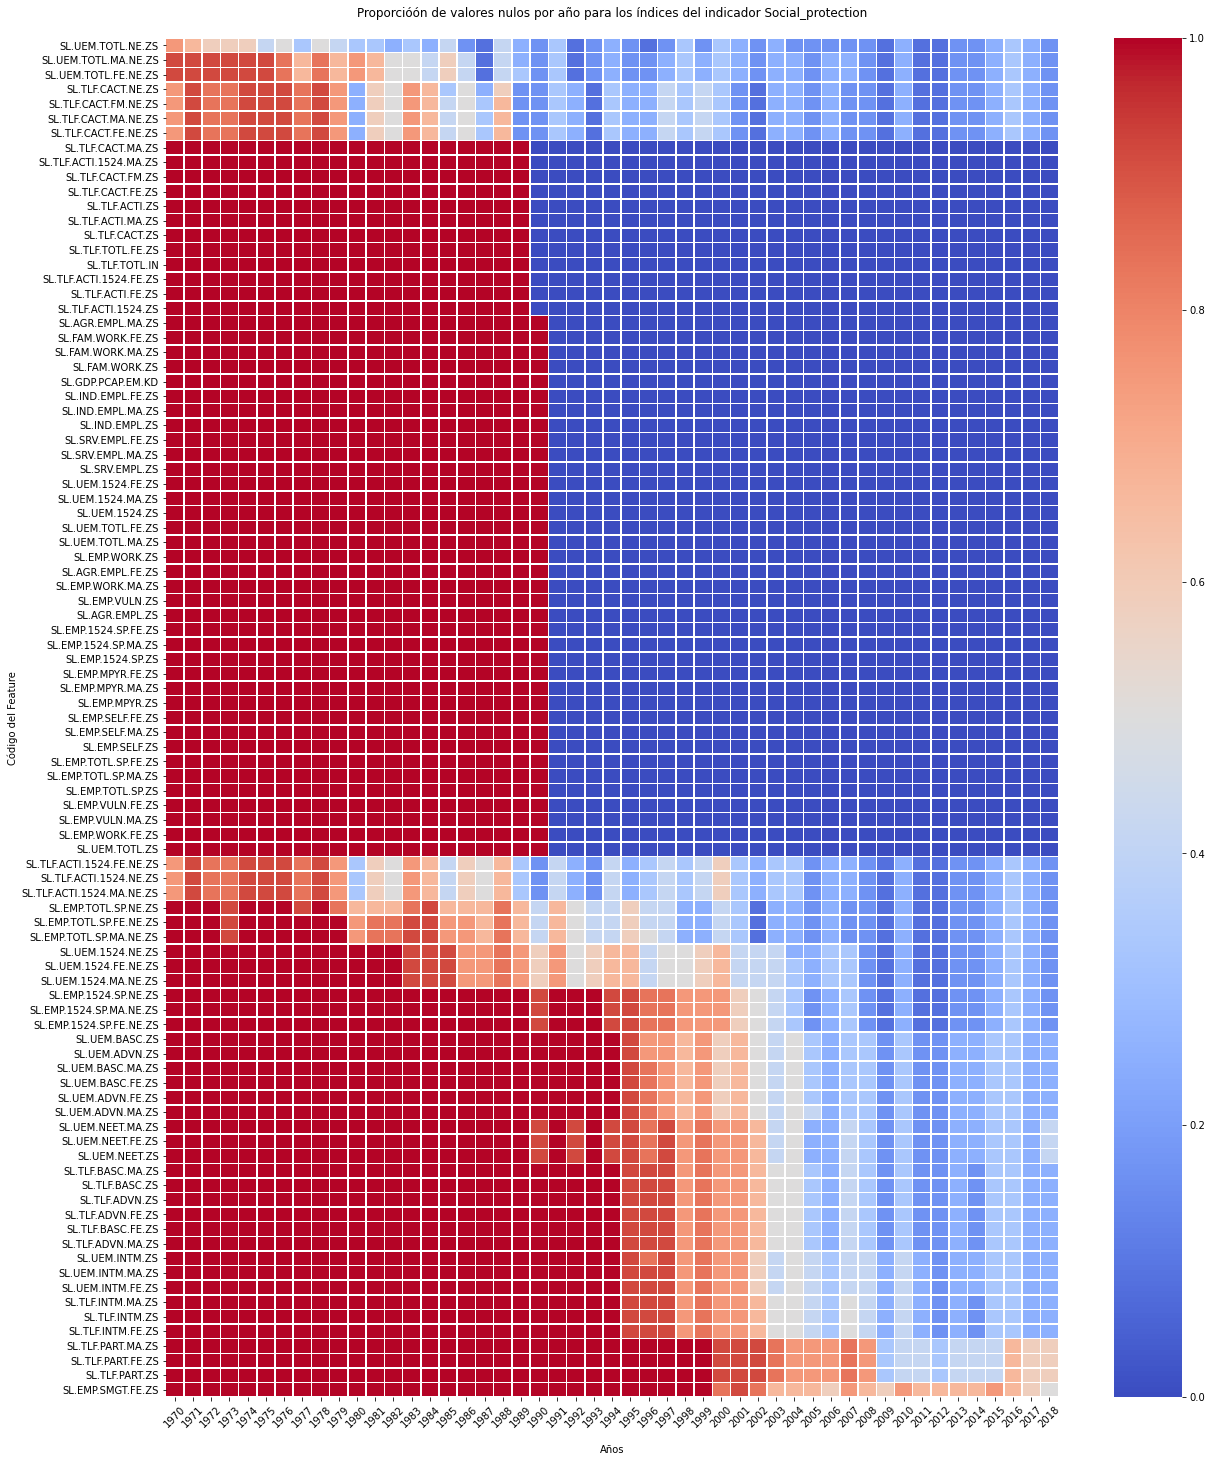

In [ ]:
#Protección social
plot_indicator_heatmap('Social_protection', (20, 25))

A primera vista, para el indicador **Protección Social**, se observa un gran grupo de Features con valores nulos hasta el año 1991, a partir del cual comienzan a tener valores no nulos hasta el final del intervalo de tiempo estudiado. Además, las primeras filas del mapa de calor muestran Features con una tendencia gradual a tener menos valores nulos a medida que avanzamos en el intervalo temporal. Finalmente, alrededor de 1/3 de los Features presentan mucha cantidad de valor nulos hasta el año 1998 aproximádamente, a partir del cual gradualmente comienzan a tener valores no nulos, aunque no de manera completa.

## Pregunta 1.3

¿Cómo es la distribución de valores nulos por año (por columnas del dataset)?. Teniendo en cuenta que el objetivo final de la mentoría es realizar una predicción de cada Feature para el año 2019, ¿se disponen de datos suficientes para comparar las predicciones que se obtendrán con el valor real en ese año?

### Respuesta

A continuación se muestra un gráfico de linea (cada punto refleja la media, con un intervalo de confianza asociado del 95%) en donde se observa la variación en la proporción de valores nulos para cada indicador a través de los años, incluyendo a todos los features y a todos los países. De este gráfico y de los mapas de calor graficados para la respuesta anterior, concluimos que para existe variabilidad en la proporción de valores nulos de acuerdo al indicador que estudiemos. En el caso de Salud, se observa una gran parte de los Features con poca cantidad de valores nulos, por lo que las predicciones para este indicar serían viables. Otros casos, como el de Pobreza y el de Protección Social, poseen datos con muchos valores nulos en gran parte del intervalo temporal considerado. Los indicadores de Educación y Género poseen features de diversa calidad, es decir, algunos pocos con una buena cobertura de datos en el intervalo temporal estudiado, y otros con mucha cantidad de valores nulos. Es interesante destacar el patrón observado para el Indicador Ambiente, el cual posee numerosos Features que comienzan a tener valores nulos en años más cercanos al presente (ver en el gráfico anterior como asciende la curva para este indicador en los últimnos años del intervalo temporal).

En general, para que las predicciones para el año 2019 sean viables, deberemos elegir cuidadosamente los Features para cada Indicador, intentando que posean la menor cantidad de valores nulos posibles para todos los países y para todos los años.

In [ ]:
#Transformo dataset a formato long para poder ser utilizado por seaborn
df_ic_long = pd.melt(df_ic, id_vars=['Indi', 'ICod'], 
                     value_vars= df_ic.columns[2:-1],
                     var_name='Año', value_name='NA')
df_ic_long

Indi                  ICod   Año        NA
0              Education           SE.COM.DURS  1970  1.000000
1              Education     SE.ENR.PRIM.FM.ZS  1970  0.416667
2              Education     SE.ENR.PRSC.FM.ZS  1970  0.500000
3              Education     SE.ENR.SECO.FM.ZS  1970  0.500000
4              Education     SE.ENR.TERT.FM.ZS  1970  0.583333
...                  ...                   ...   ...       ...
23760  Social_protection     SL.UEM.TOTL.FE.ZS  2018  0.000000
23761  Social_protection  SL.UEM.TOTL.MA.NE.ZS  2018  0.166667
23762  Social_protection     SL.UEM.TOTL.MA.ZS  2018  0.000000
23763  Social_protection     SL.UEM.TOTL.NE.ZS  2018  0.166667
23764  Social_protection        SL.UEM.TOTL.ZS  2018  0.000000

[23765 rows x 4 columns]

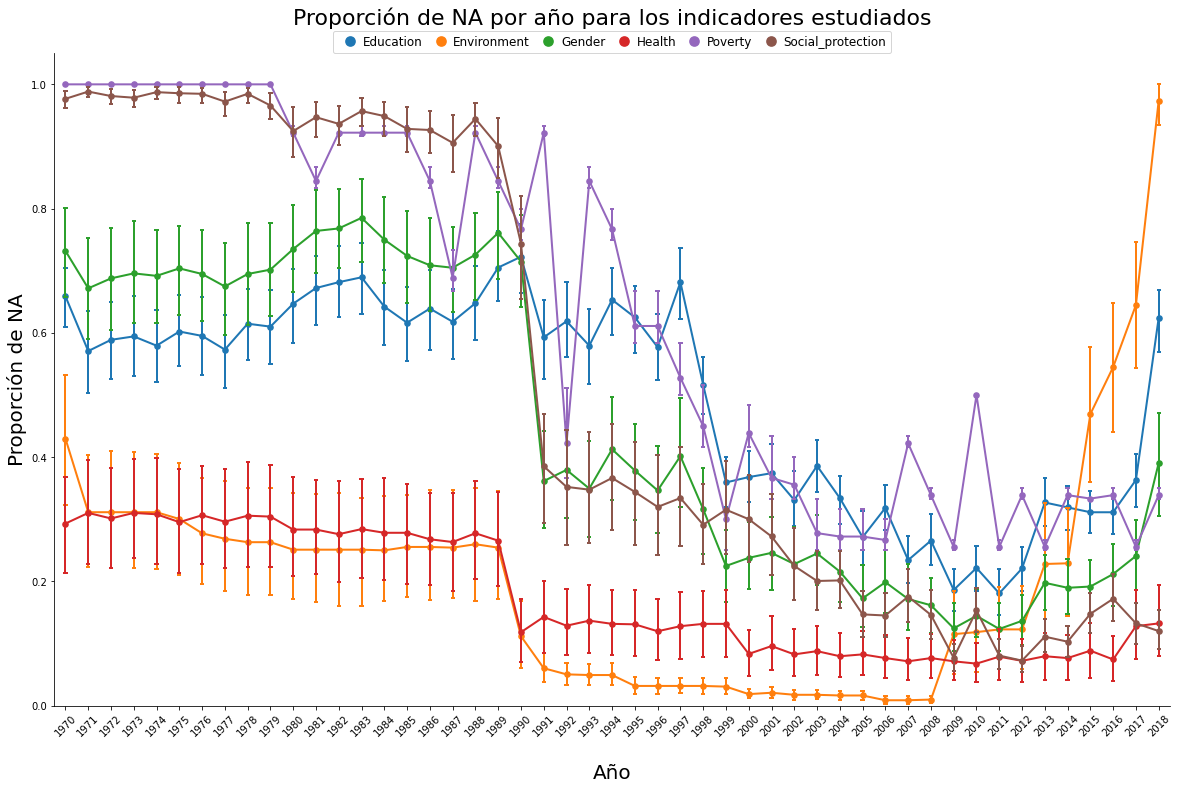

In [ ]:
# Graficamos las curvas para la proporción de valor nulos por año para todos los indicadores
plt.figure(figsize = (20, 12))
sns.pointplot(data=df_ic_long, x='Año', y='NA', hue='Indi', pallete='colorblind', ci=95, capsize=0.1, scale=0.75, errwidth=2)
plt.title("Proporción de NA por año para los indicadores estudiados\n", fontsize=22)
plt.xlabel("\nAño", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Proporción de NA", fontsize=20)
plt.legend(bbox_to_anchor=(0.25, 1, 0.5, 0.5), loc="lower left", ncol=6, mode="expand", borderaxespad=0., fontsize=12, 
           markerscale=1.8, scatteryoffsets=[0.5], labelspacing=2, handletextpad=0.05)
plt.ylim(0,)
sns.despine()

## Pregunta 1.4

Volviendo a los resultados del punto 2, elegir como mínimo 15 Features por Indicador con al menos el 50% de valores no nulos (y en lo posible los mismos para todos los países) y mostrar gráficamente, con gráficos de distribución o de cajas por ejemplo, la distribución de los mismos. ¿Qué se puede observar de estas distribuciones? ¿Son normales? ¿Qué sucede con los outliers? ¿Observan alguna similitud entre los features elegidos?. Para estos mismos 15 Features realizar el gráfico de línea de su serie temporal y analizarlo.

### Respuesta
A cotinuación, se crea un nuevo dataset el cual posee los 15 features con la menor proporción de valores nulos por indicador. Luego, definimos funciones para realizar los histogramas, gráficos de caja y gráficos de línea para los 15 indicadores por país, por indicador.

In [ ]:
# Se seleccionan los 15 Features con la menor proporcion de NA, para  cada indicador

df_15_feat = pd.DataFrame()

for item in dataset.Indi.unique():
    feat_15 = df_ic[df_ic.Indi == item].sort_values('sum_NA').head(15).ICod.unique() 
    df_15_feat = df_15_feat.append(dataset[(dataset.Indi == item) & (dataset.ICod.isin(feat_15))], ignore_index = True)

df_15_feat_melt = pd.melt(
    df_15_feat,
    id_vars = df_15_feat.columns[:5],
    value_vars= df_15_feat.columns[5:],
    var_name='Year',
    value_name='Value',
)

df_15_feat_melt['Year'] = df_15_feat_melt['Year'].astype('int')

In [ ]:
df_15_feat_melt.to_csv(BASE_DIR + "dataset_15feat.csv", index=False)

In [ ]:
# Función para plotear boxplots para las 15 Features elegidas por país 
def plot_indi_15feat_boxplots(indicador):
 datos = df_15_feat_melt[df_15_feat_melt.Indi == indicador]
 for ii in datos.ICod.unique():
  ti = datos[datos['ICod'] == ii].Feat.unique()[0]
  gr = sns.FacetGrid(datos[datos.ICod == ii], col="CCod", row = "ICod", col_order=np.sort(datos.CCod.unique()))
  gr.map(sns.boxplot, "Value", order=None, orient="v")
  gr.set_titles("{col_name}", size = 15).set_axis_labels("", "")
  gr.fig.suptitle(ti, y=1.1, size = 24)
  gr.fig.tight_layout()

In [ ]:
# Función para plotear gráficos de línea para las 15 Features elegidas por país en todo el espacio temporal
# Cada gráfico de línea incluye tres lineas horizontales que marcan los valores del 1er cuartil, la mediana,
# y el 3er cuartil, tomando como población a los valores de cada Feature para todos los años y todos los países.
def plot_indi_15feat_lines(indicador):
    datos = df_15_feat_melt[df_15_feat_melt.Indi == indicador]
    for ii in datos.ICod.unique():
        ti = datos[datos['ICod'] == ii].Feat.unique()[0]            #Nombre del feature
        me = np.nanpercentile(datos[datos['ICod'] == ii].Value, 50)  #mediana
        fq = np.nanpercentile(datos[datos['ICod'] == ii].Value, 25)  #1er Q
        tq = np.nanpercentile(datos[datos['ICod'] == ii].Value, 75)  #3er Q
        g = sns.relplot(x="Year", y="Value", col="CCod",
                        col_wrap=12, kind="line", height=1.7,
                        col_order=np.sort(datos.CCod.unique()),
                        data=datos[datos['ICod'] == ii])
        g.map(plt.axhline, y=me, ls='-.', lw=1.1, c='red')
        g.map(plt.axhline, y=fq, ls=':', lw=1.2, c='red')
        g.map(plt.axhline, y=tq, ls=':', lw=1.2, c='red')
        g.set_titles("{col_name}").set(xlim=(1970, 2020)).set_axis_labels("","")
        g.fig.suptitle(ti, y=1.1)

### Gráficos de caja

En general, al agrupar los datos de cada Feature por país, se observan pocos outliers. Se puede mencionar el caso de Brasil, que para algunos features de Ambiente, presentan algunos outilers. Estos se corresponden con años en los que Brasil obtuvo un valor atípico respecto de la distribución de estos features.

#### Gráficos de caja: Género

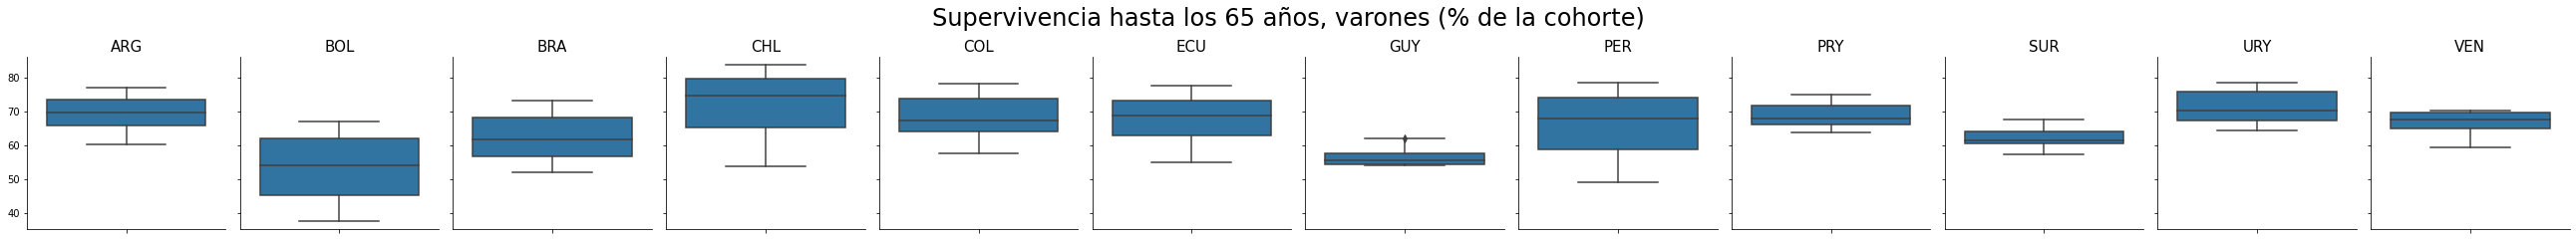

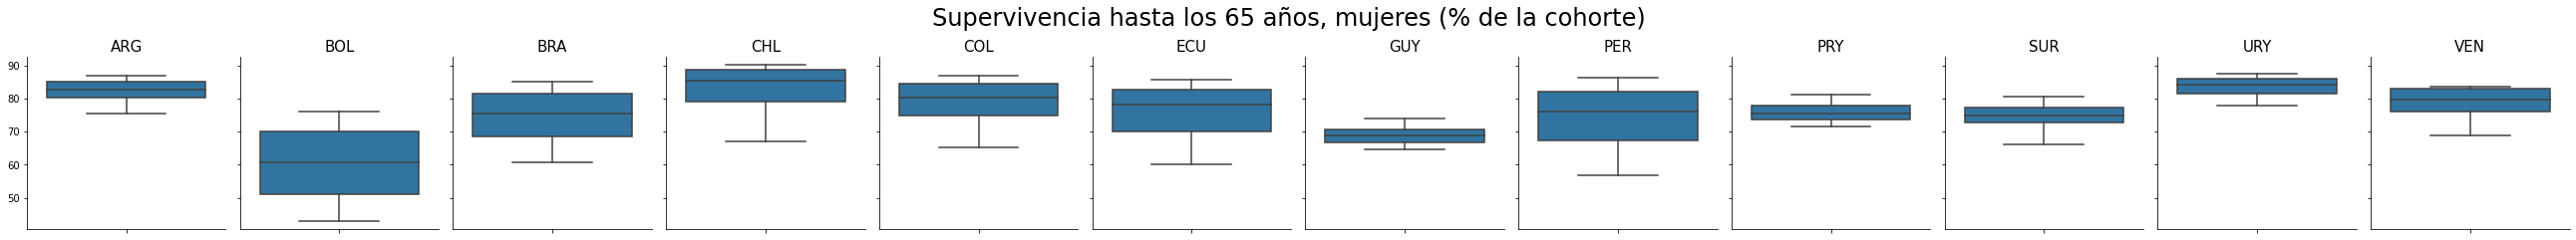

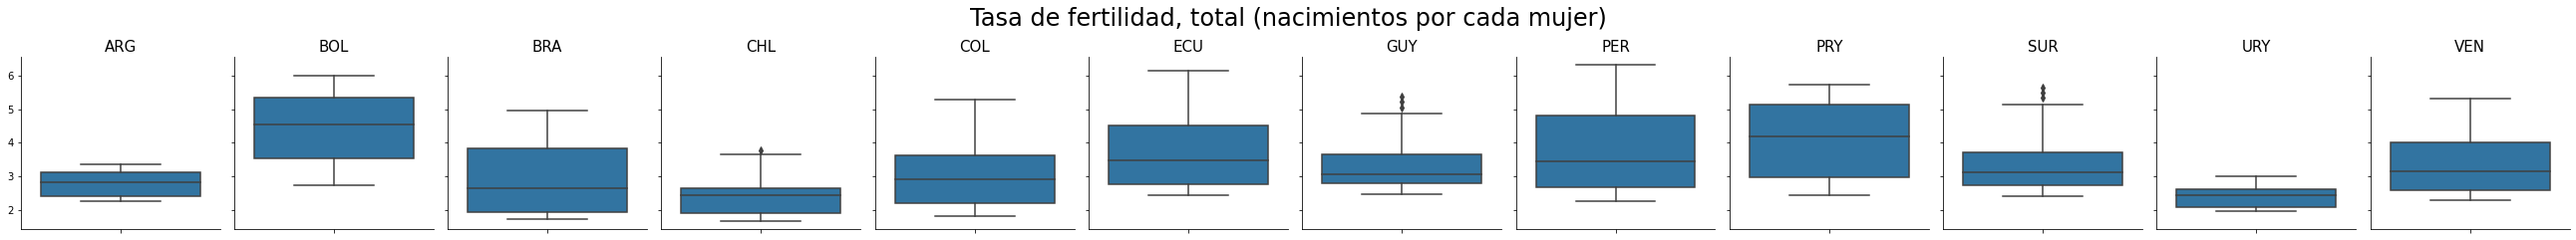

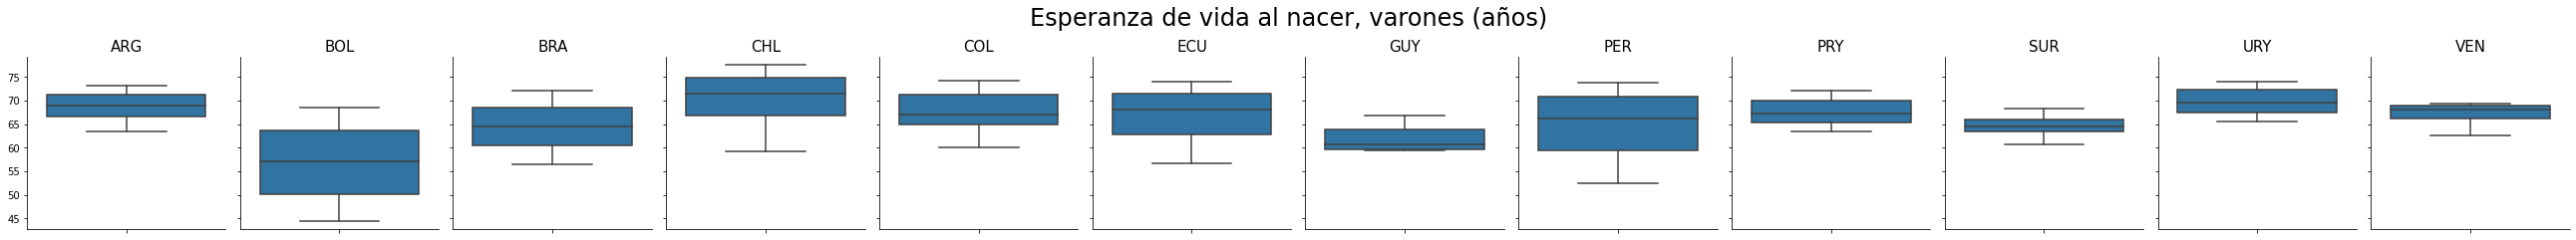

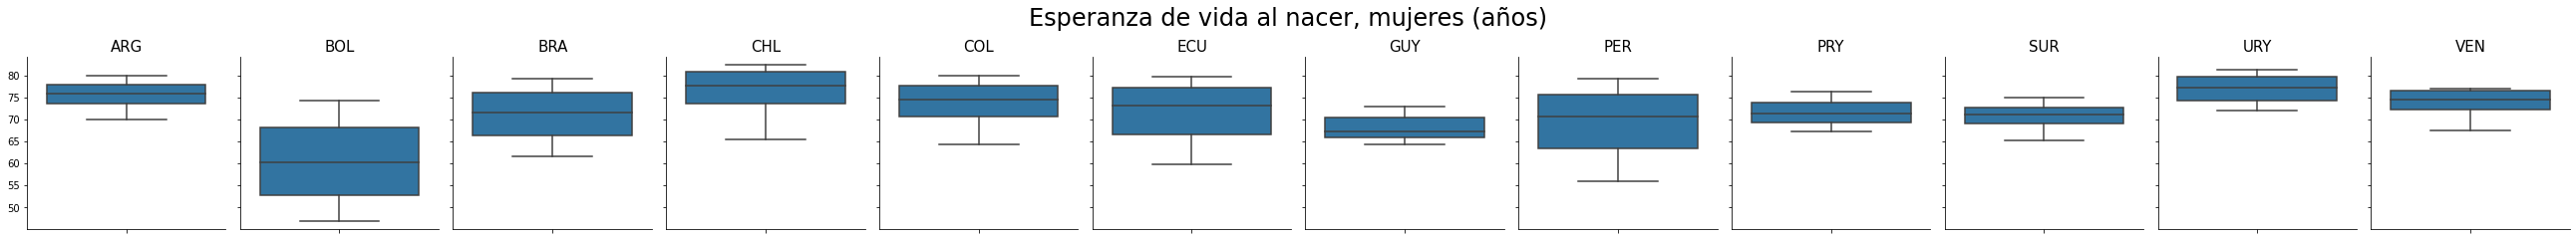

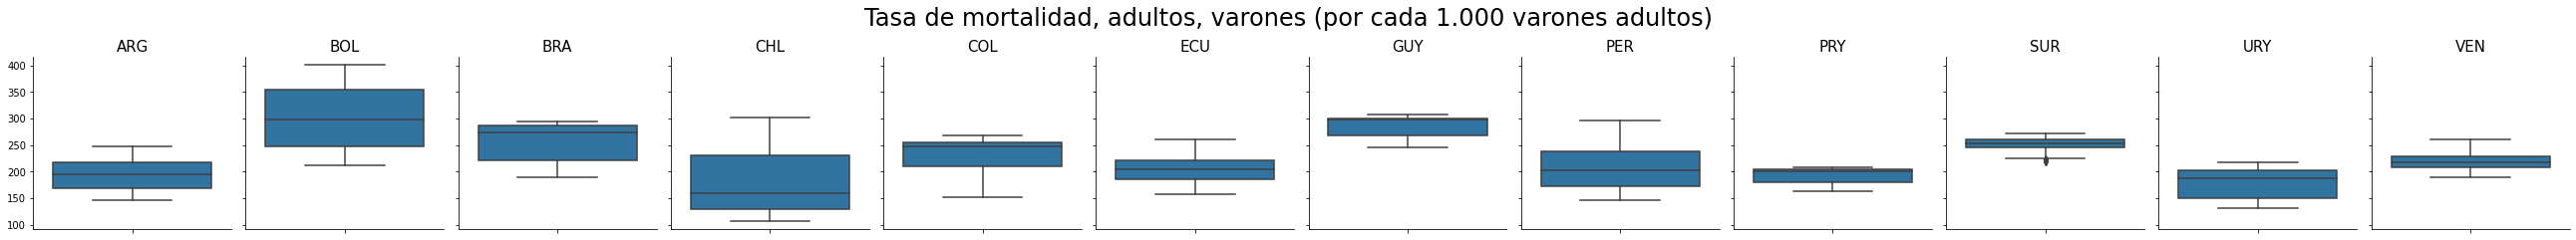

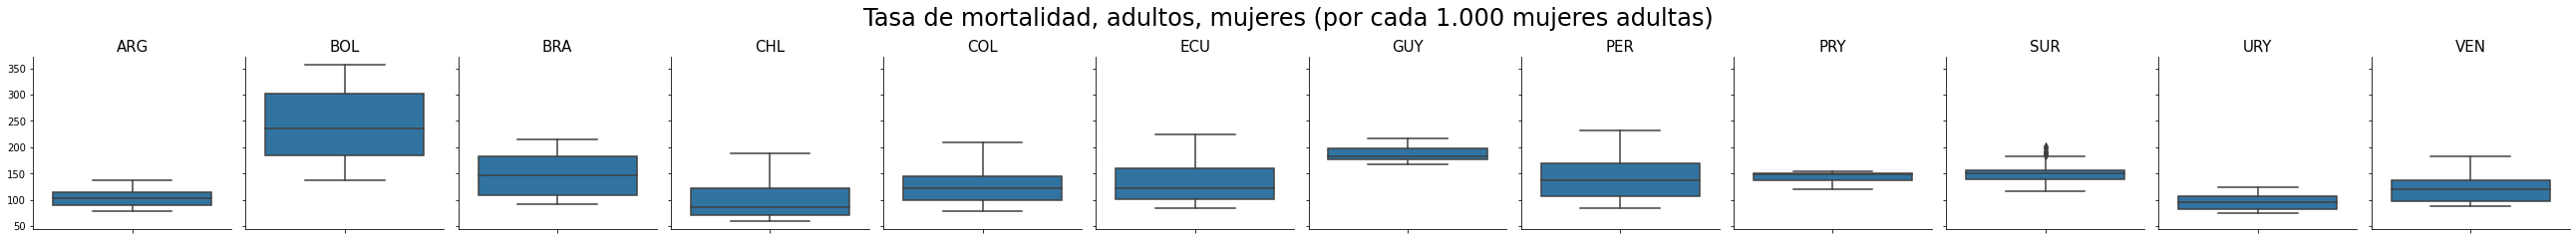

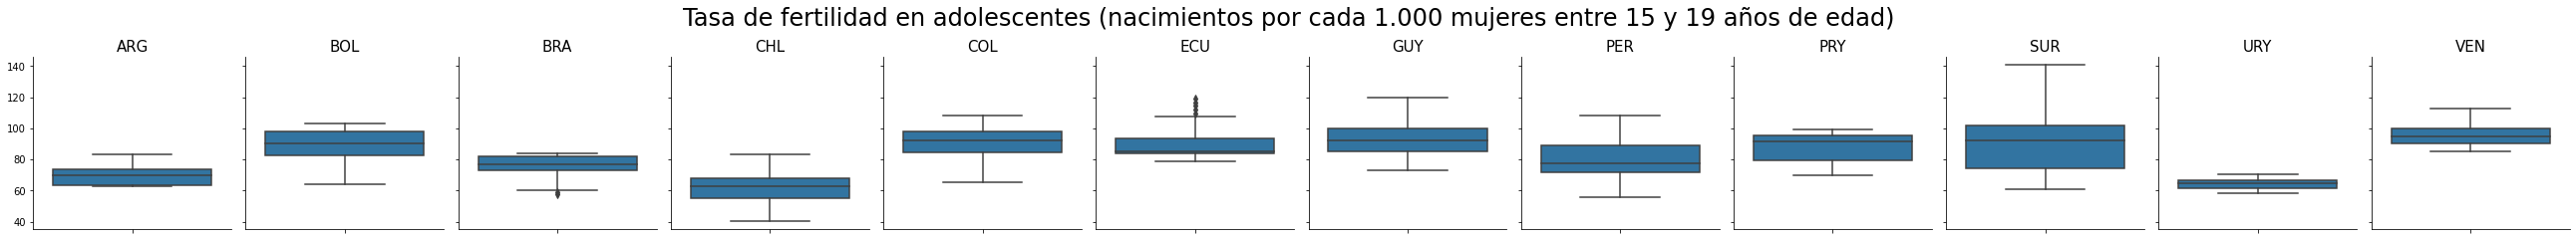

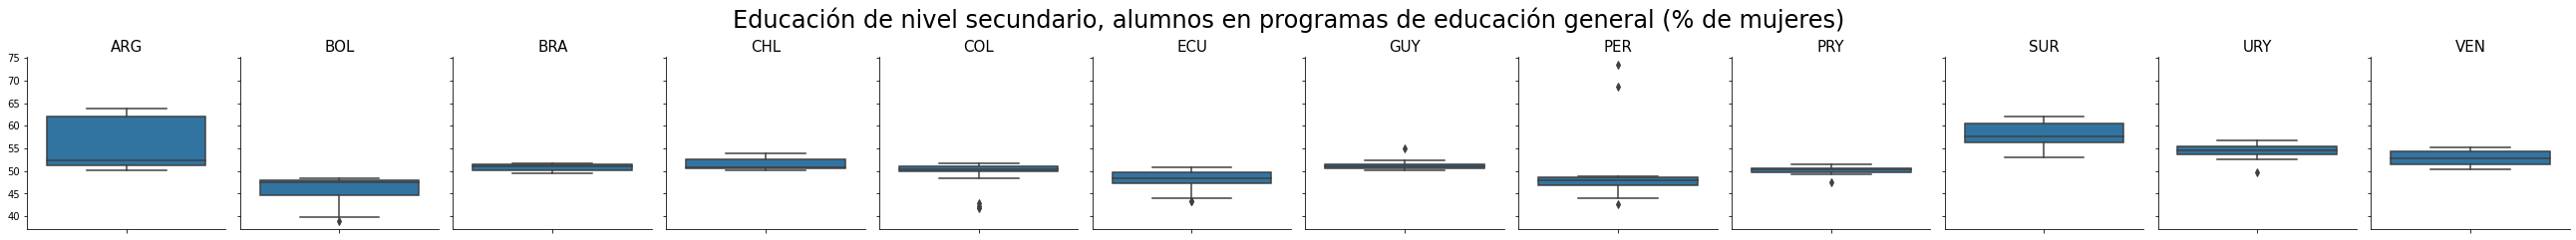

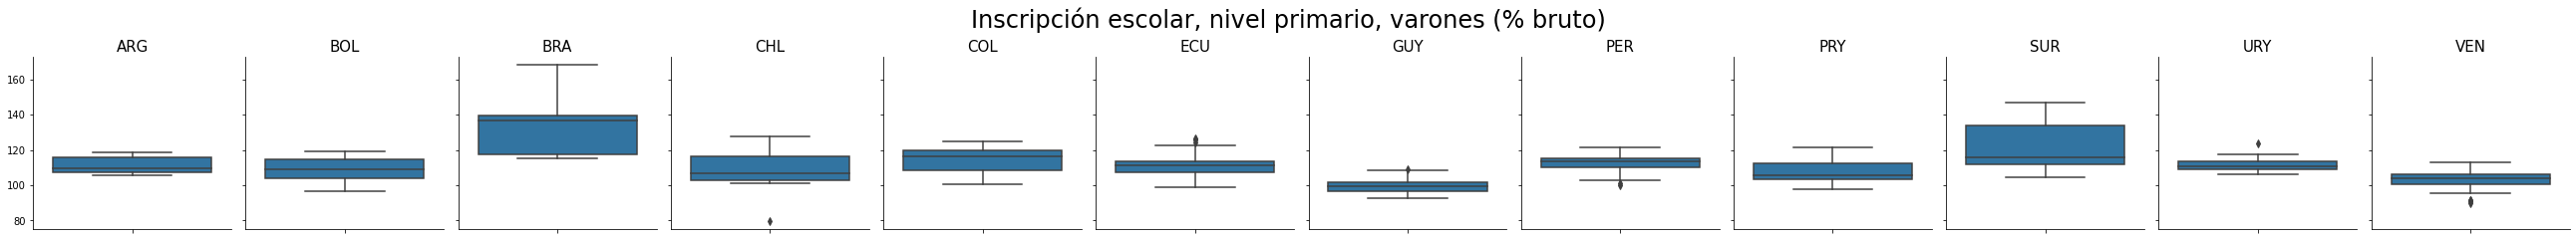

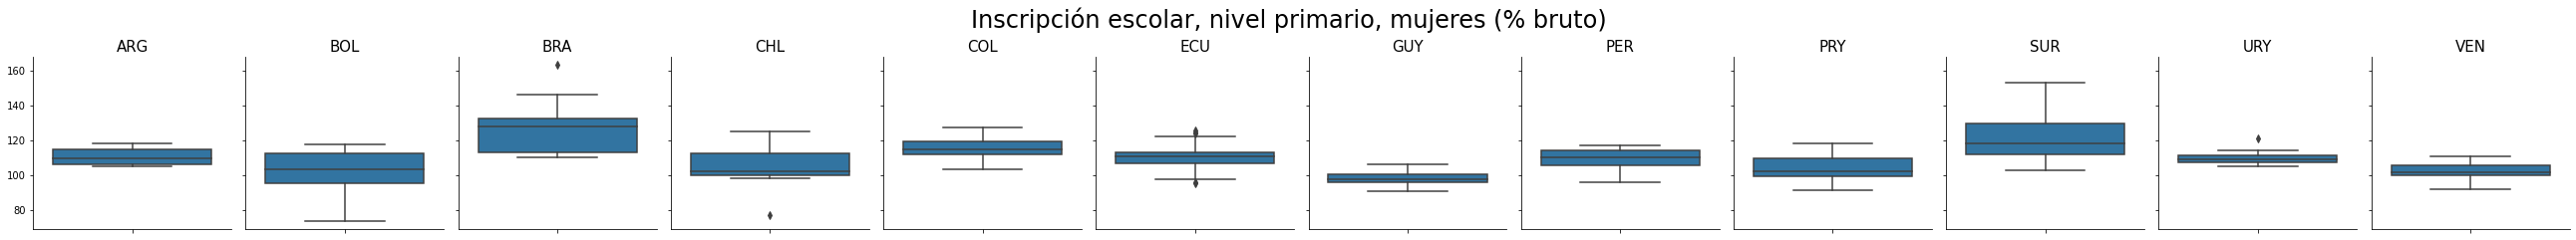

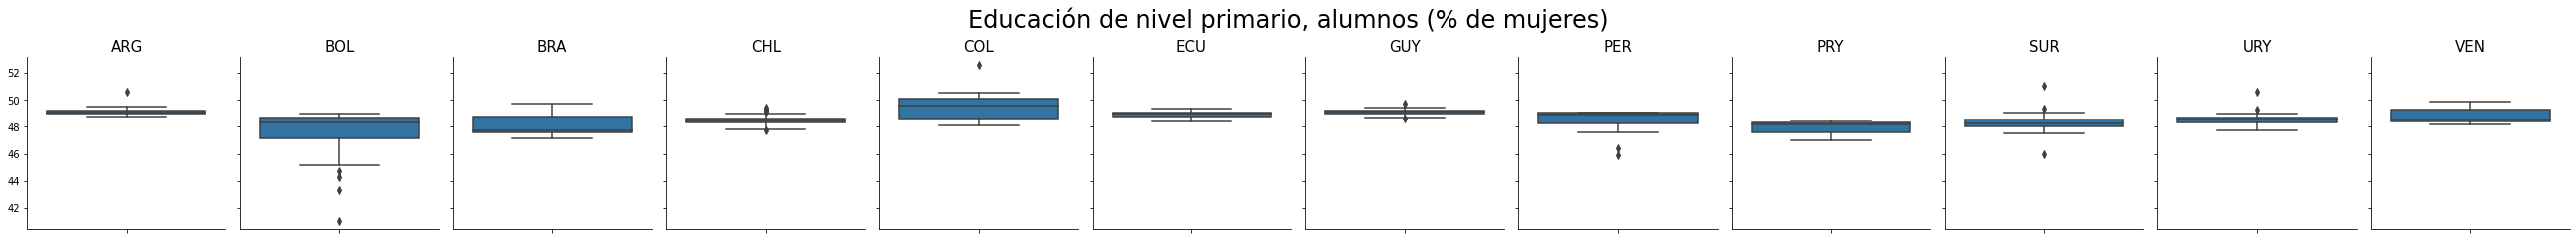

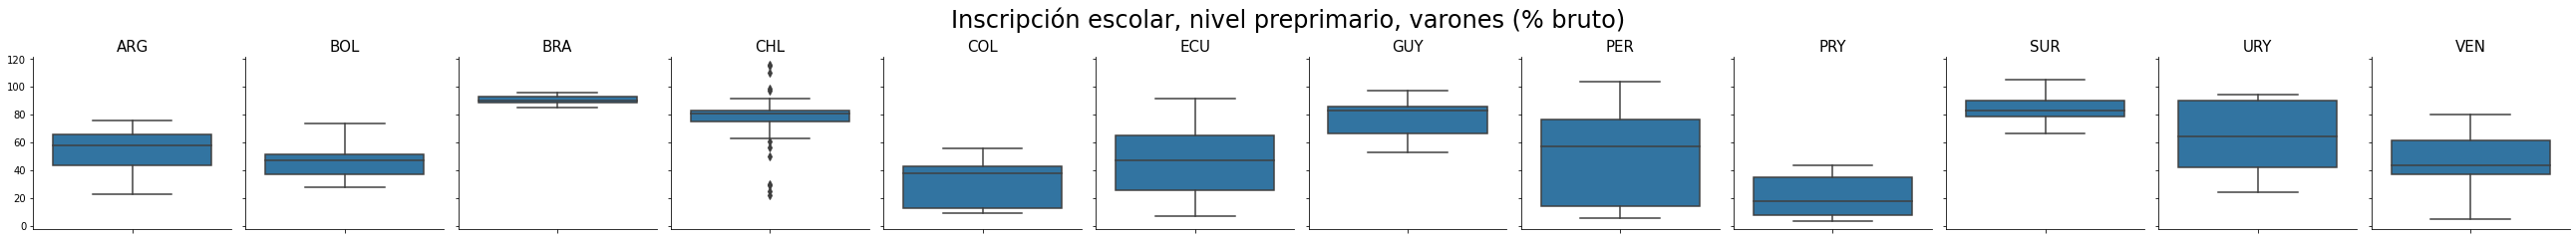

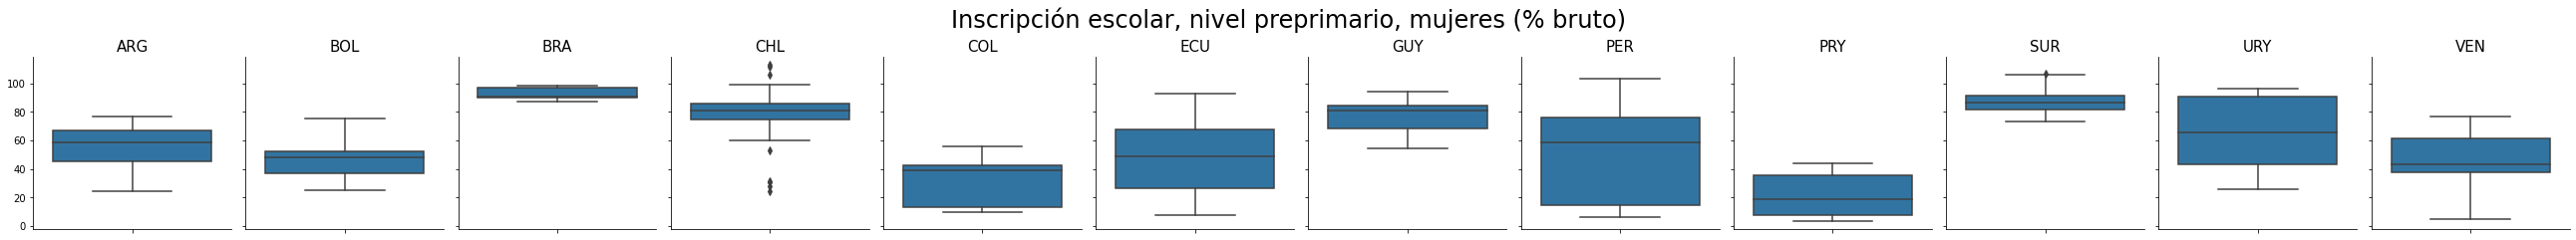

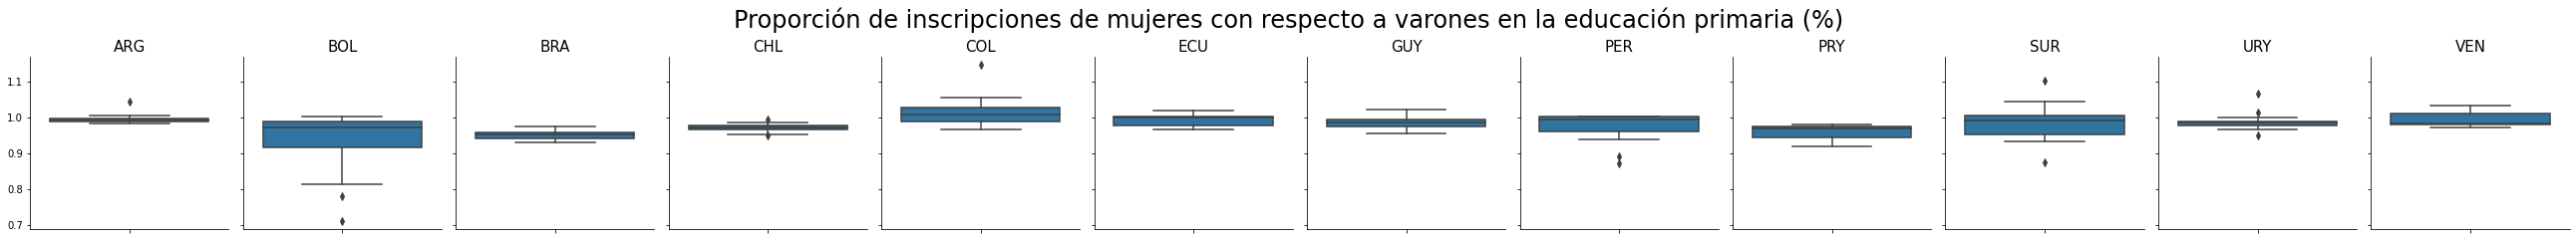

In [ ]:
plot_indi_15feat_boxplots("Gender")

#### Gráficos de caja: Pobreza

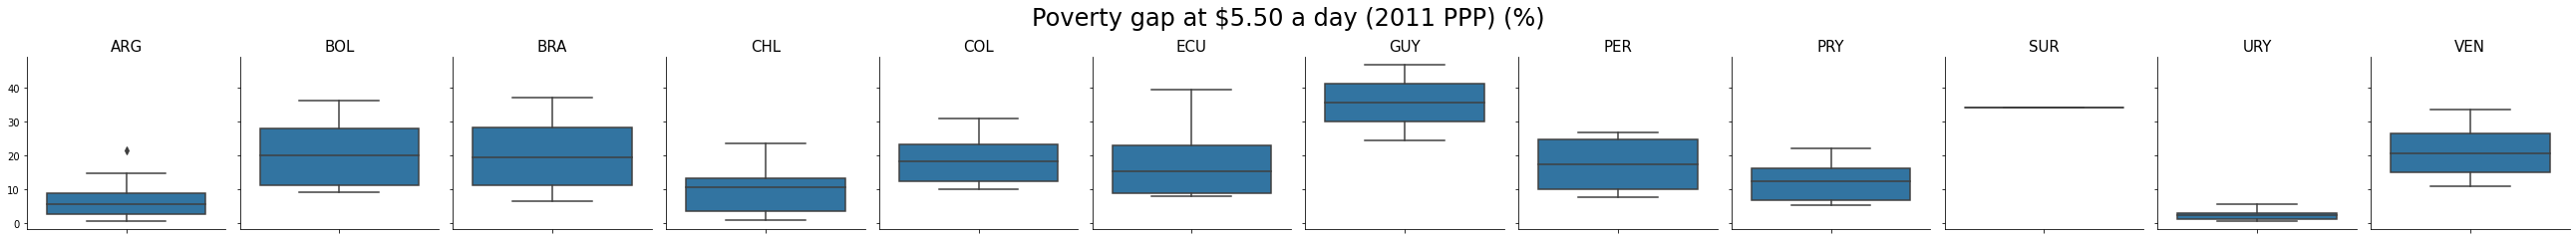

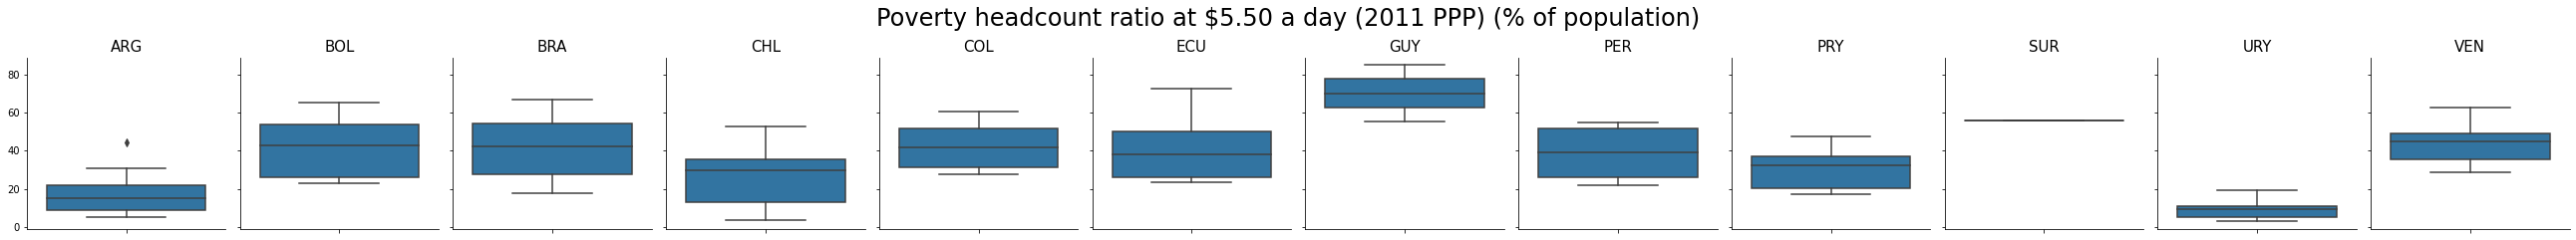

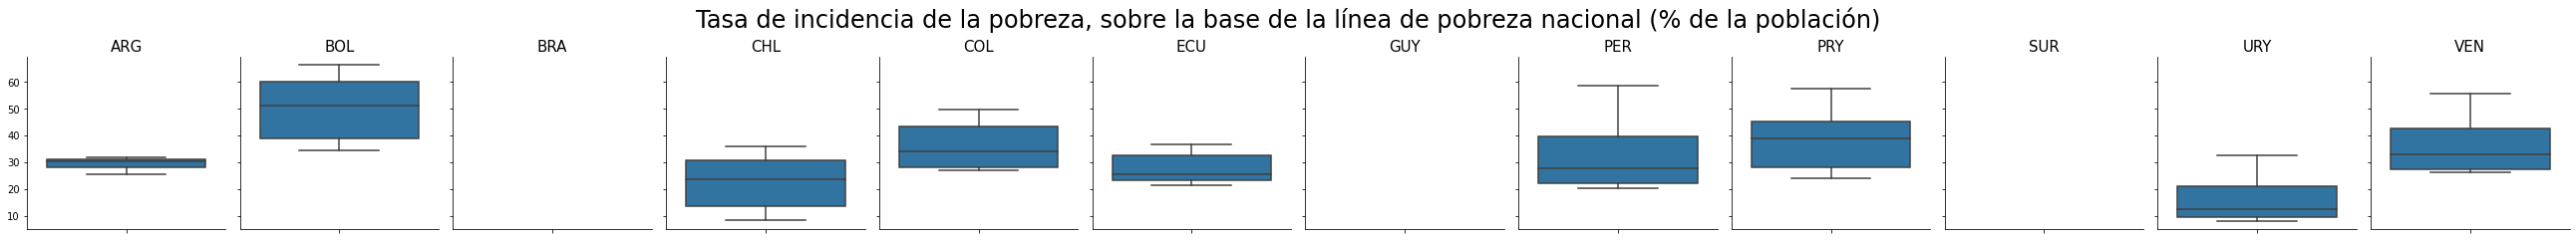

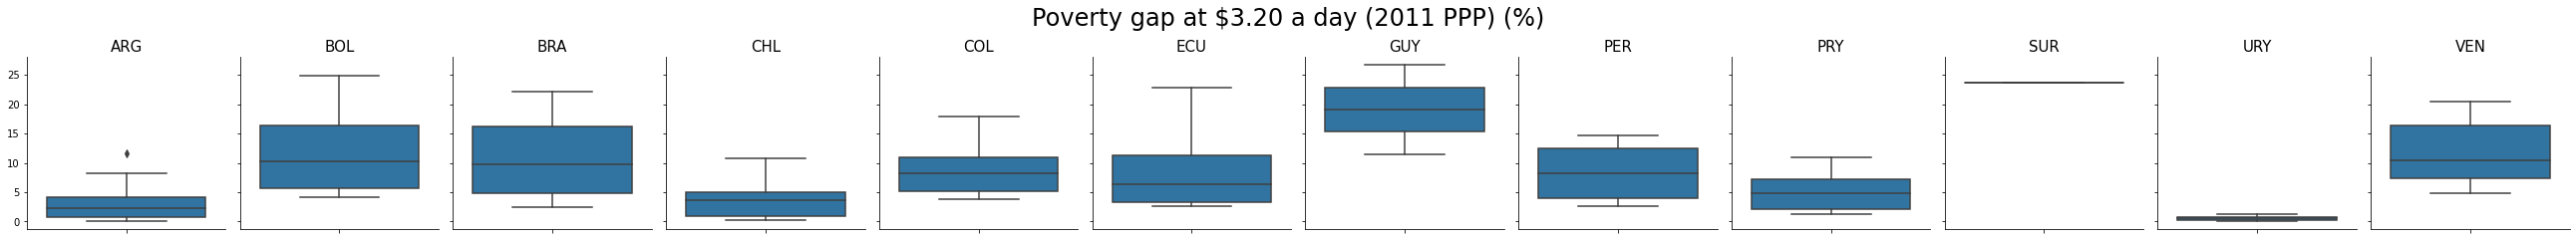

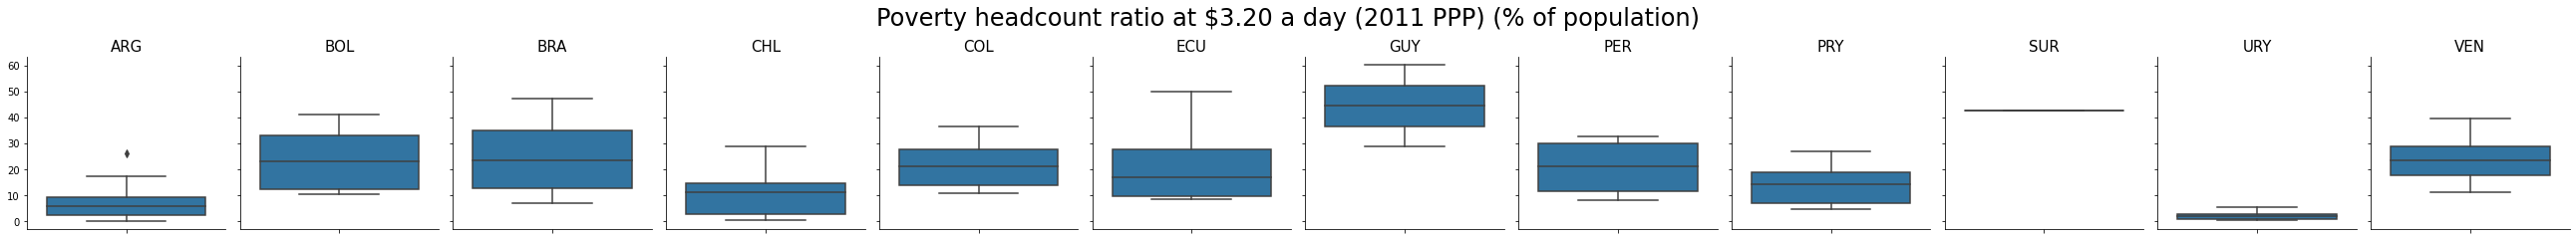

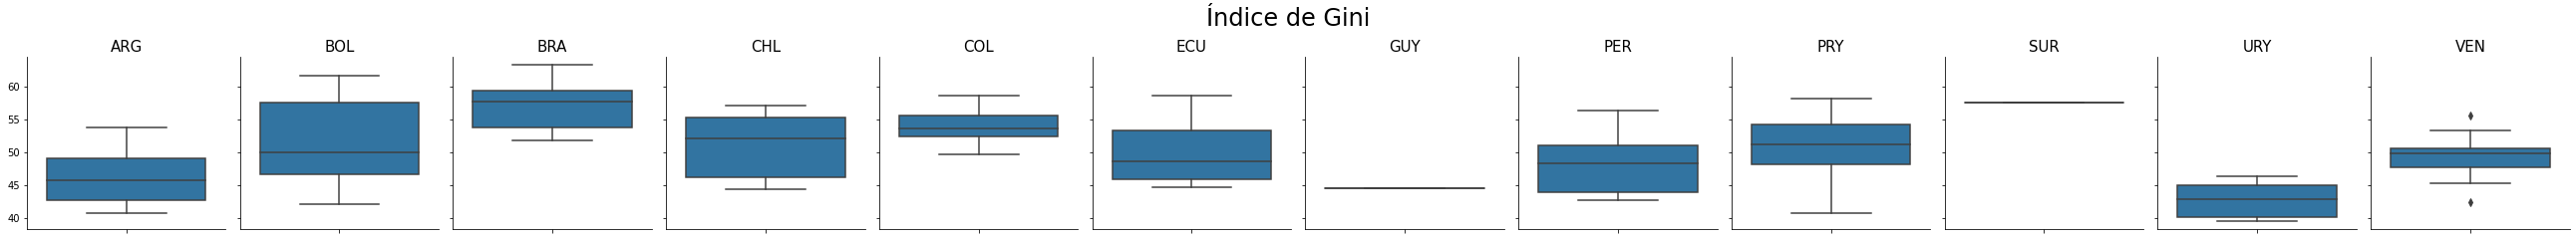

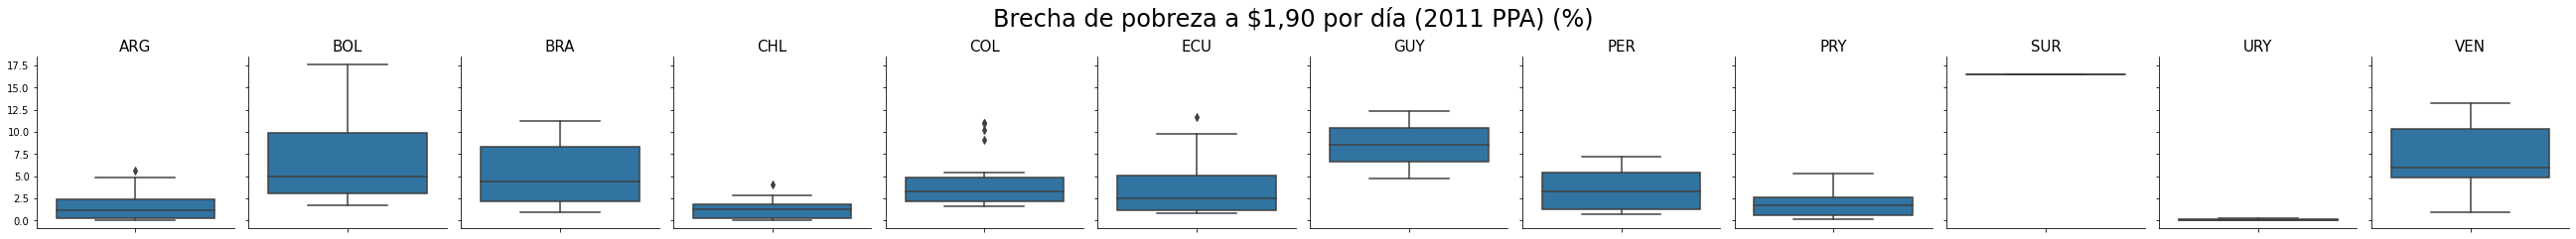

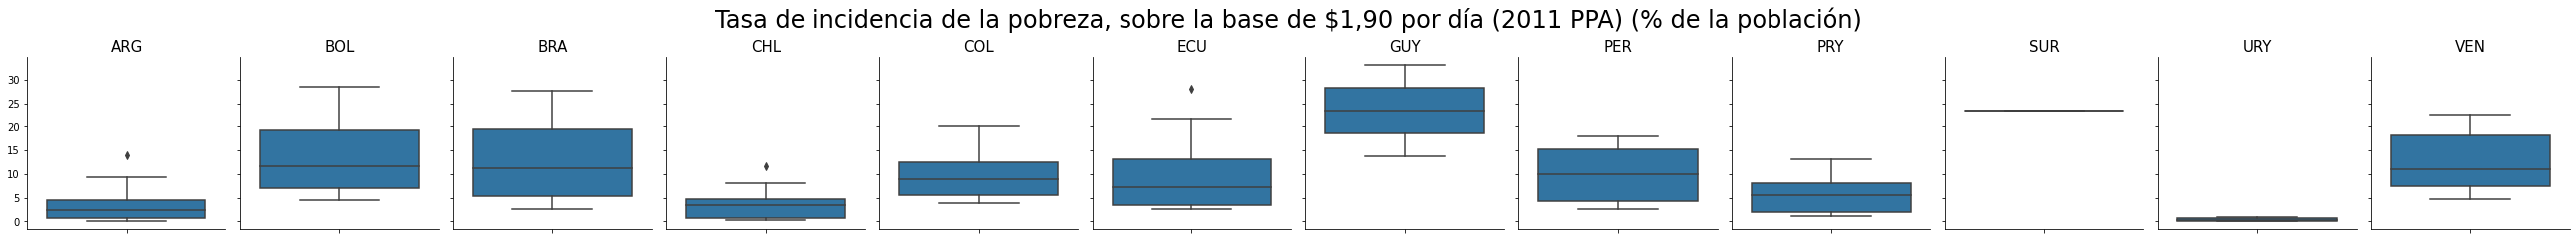

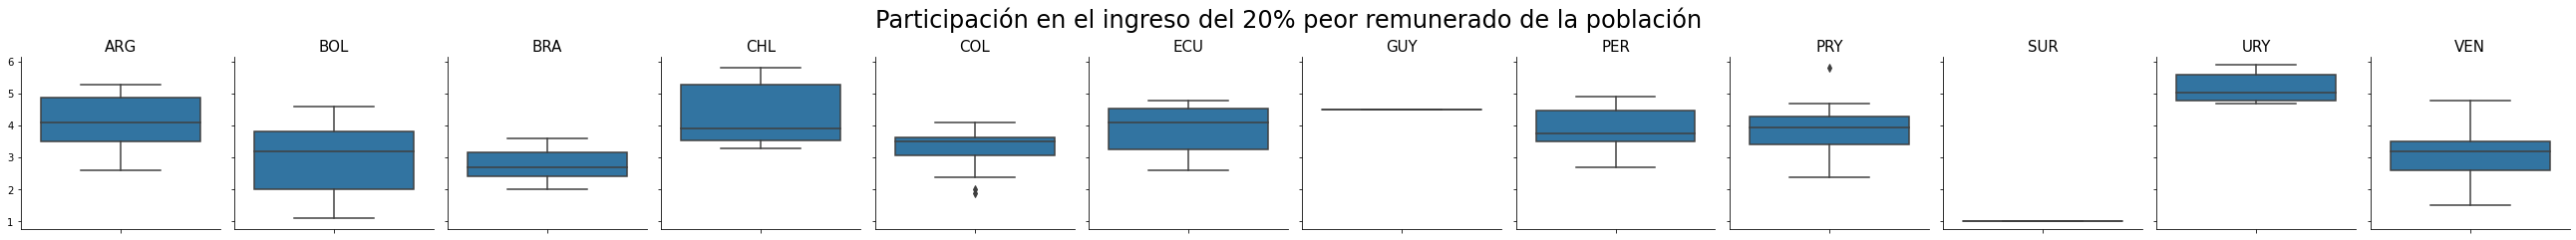

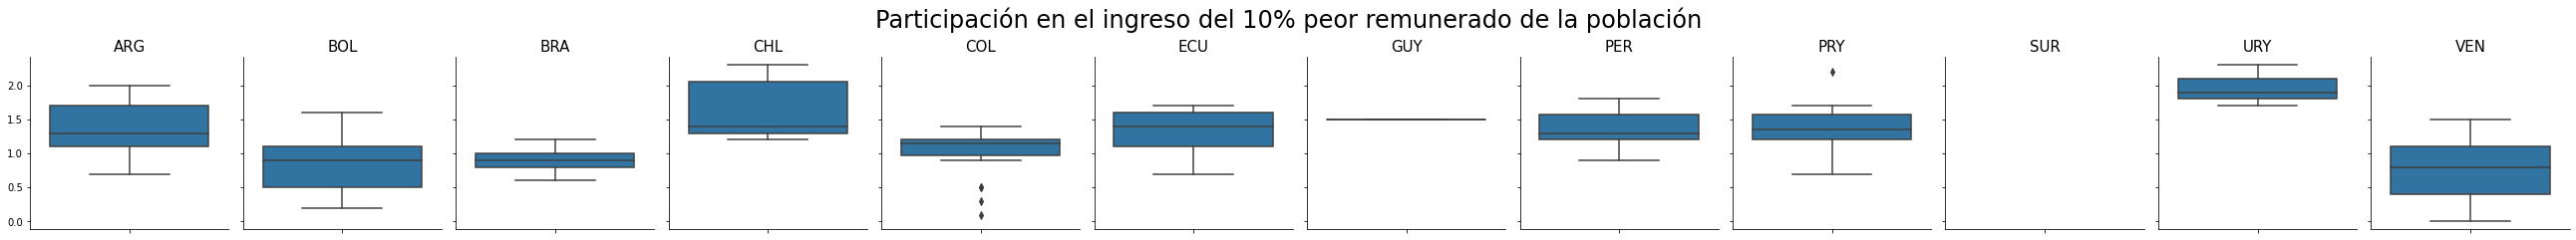

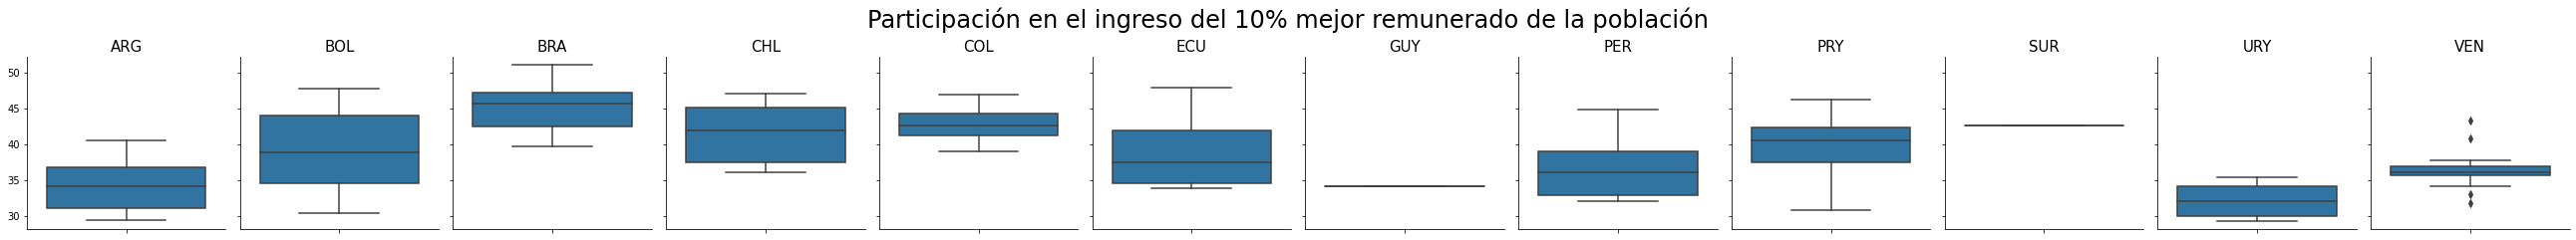

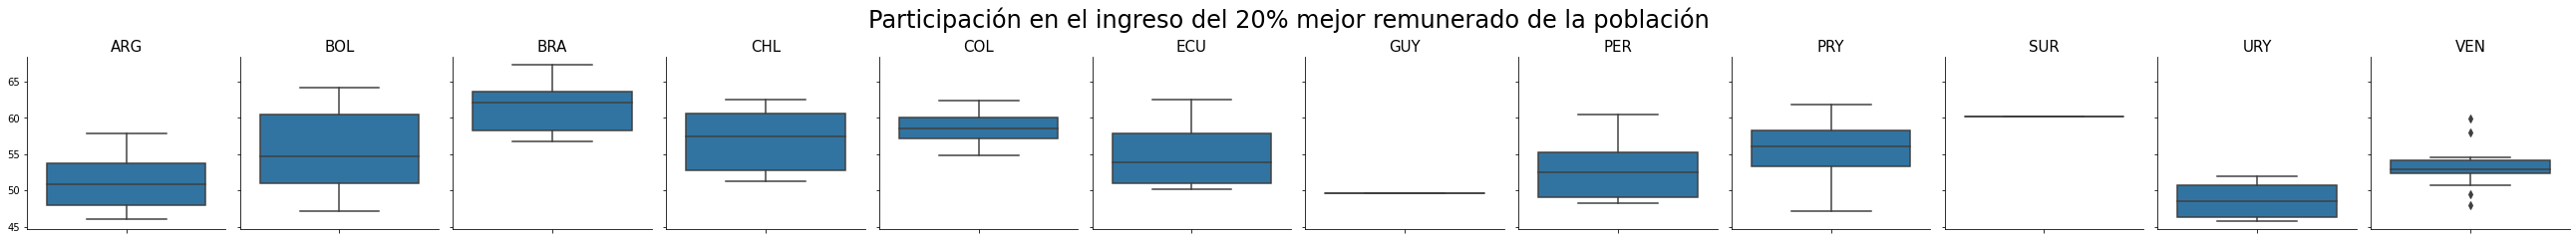

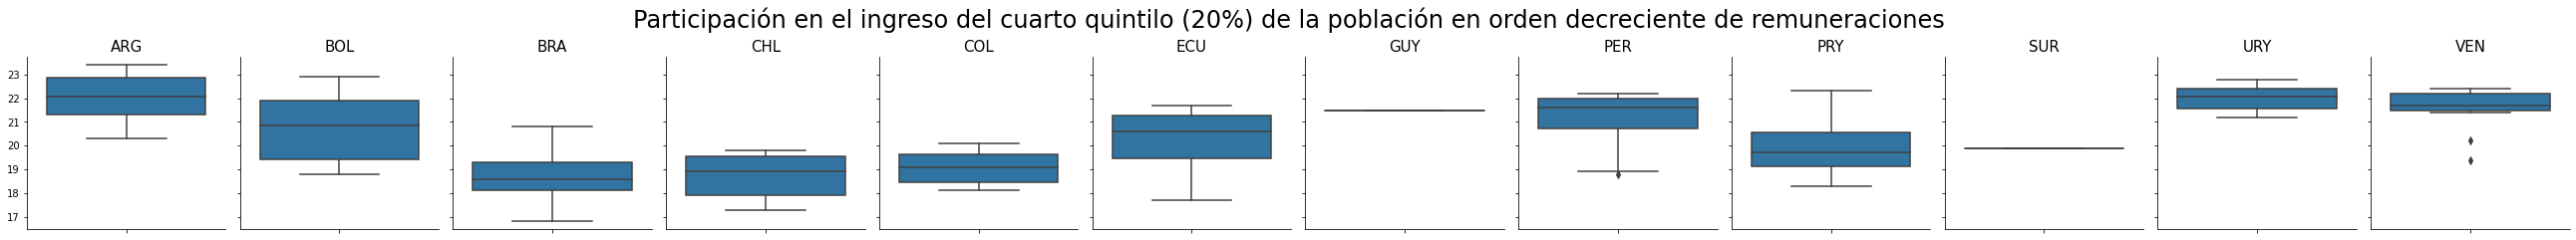

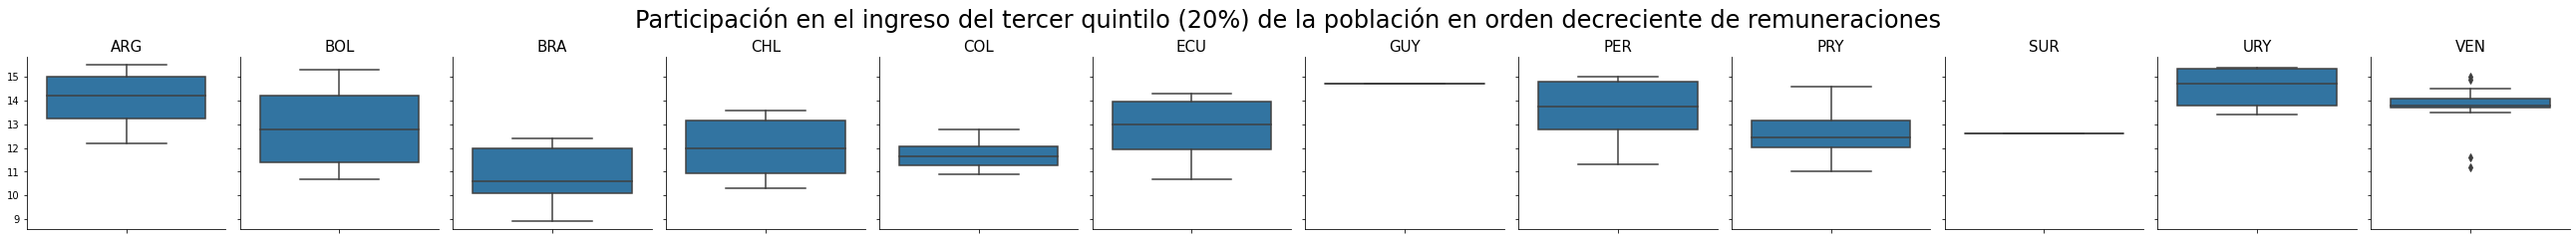

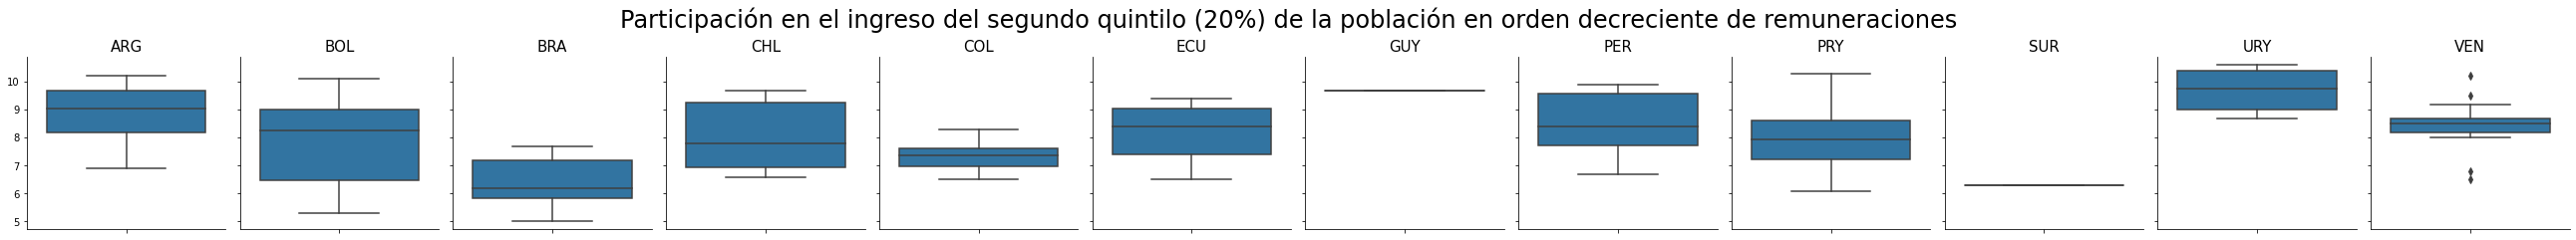

In [ ]:
plot_indi_15feat_boxplots("Poverty")

#### Gráficos de caja: Educación

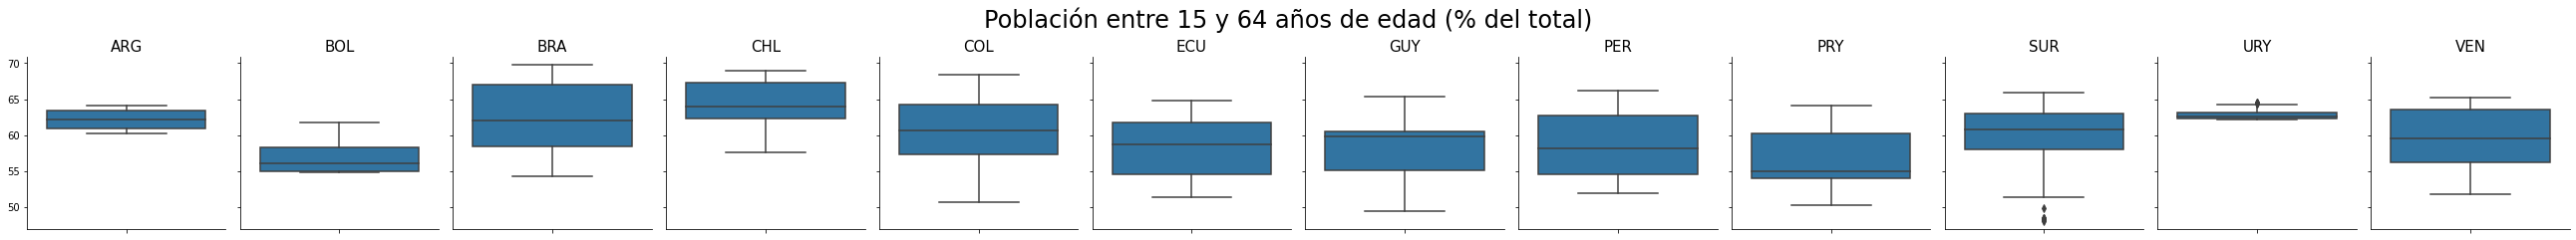

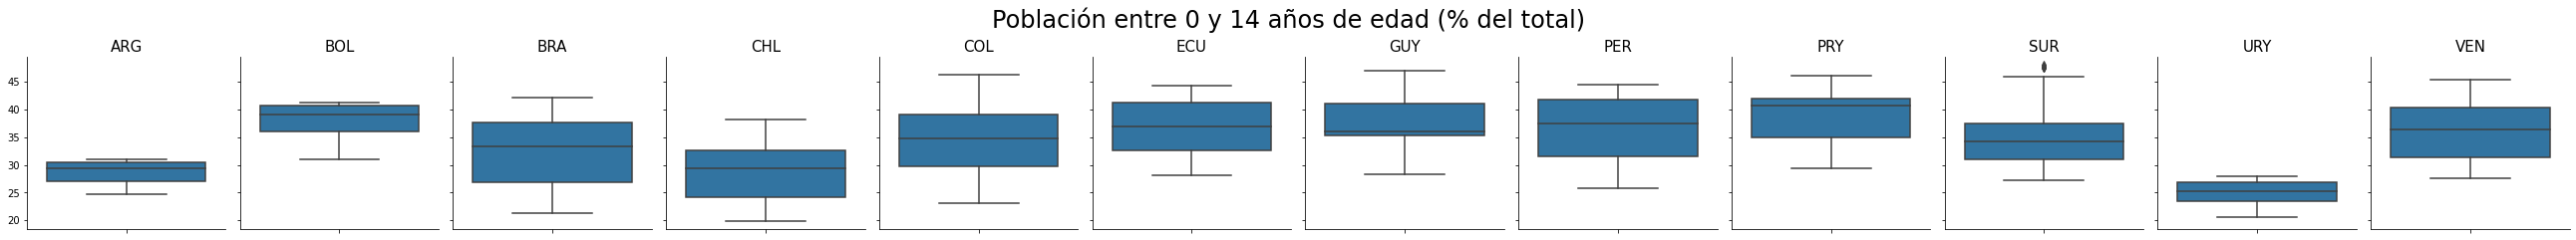

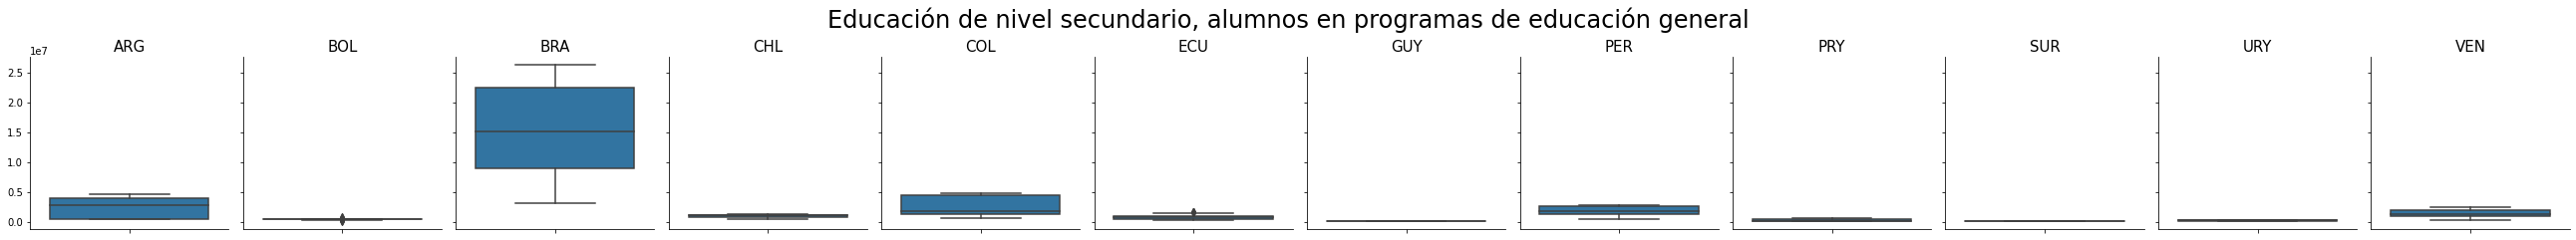

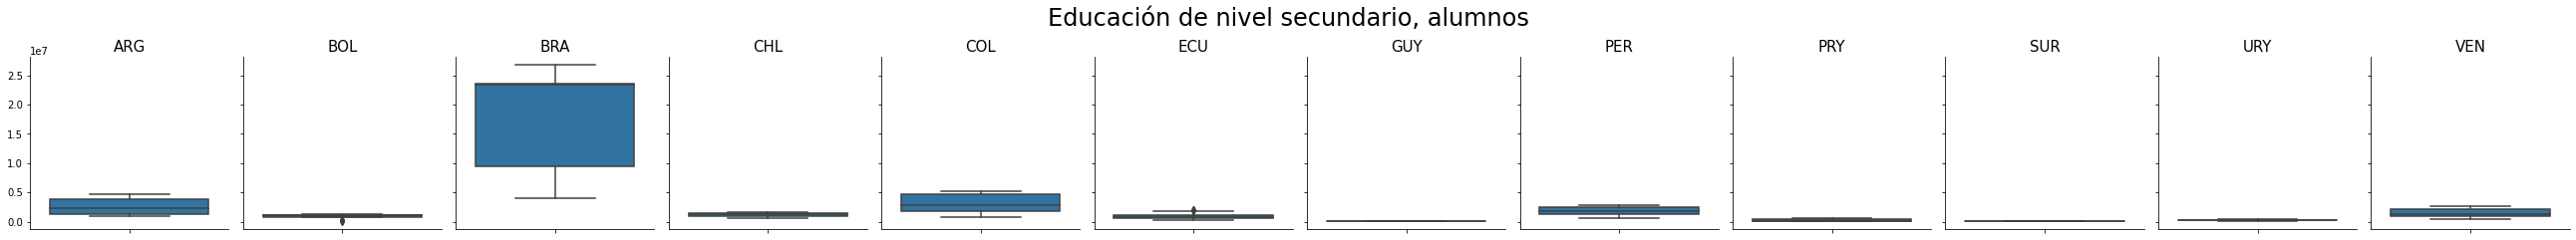

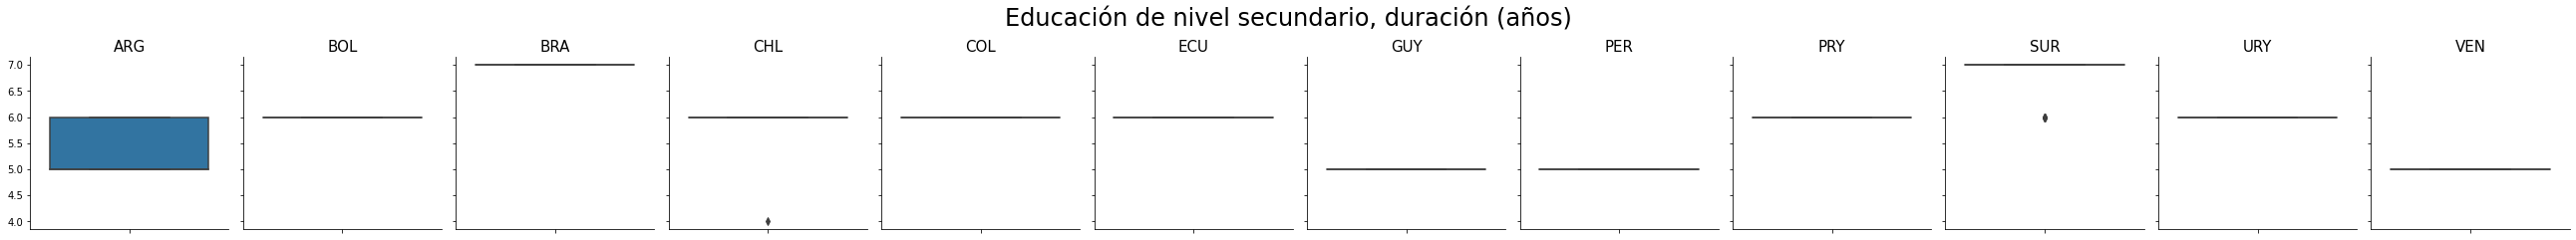

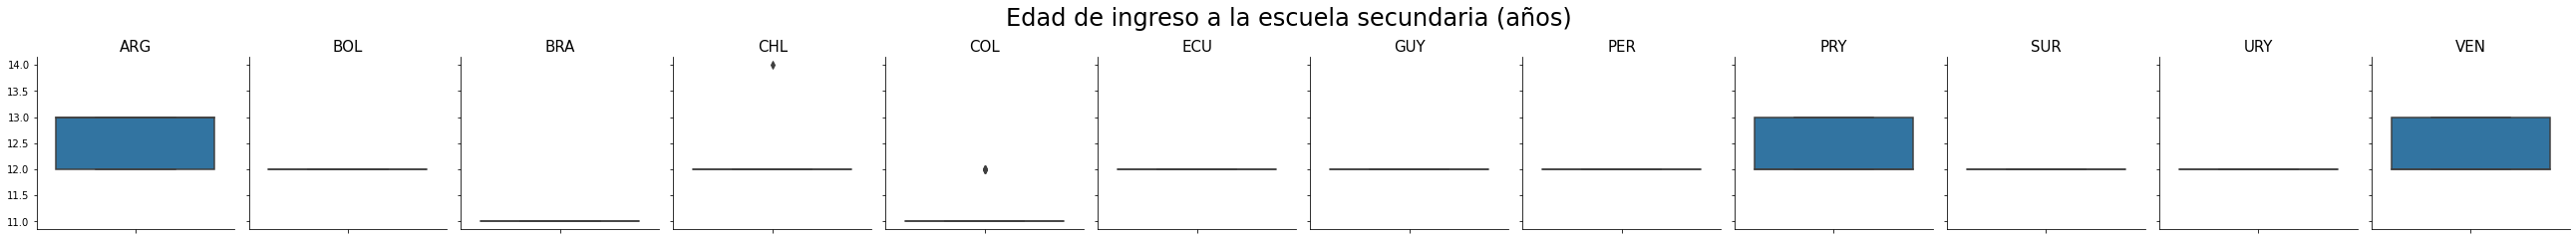

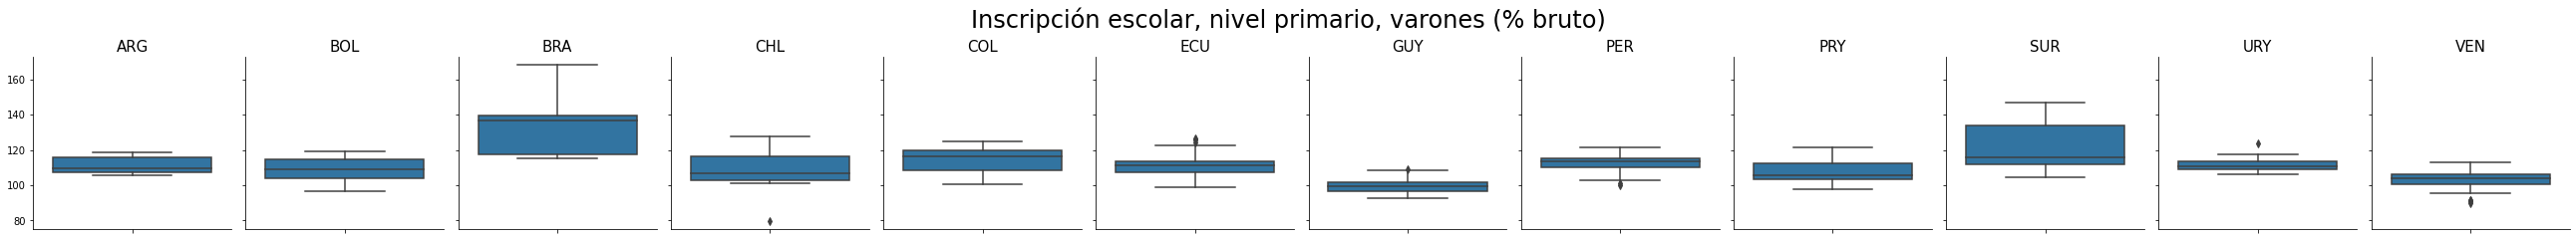

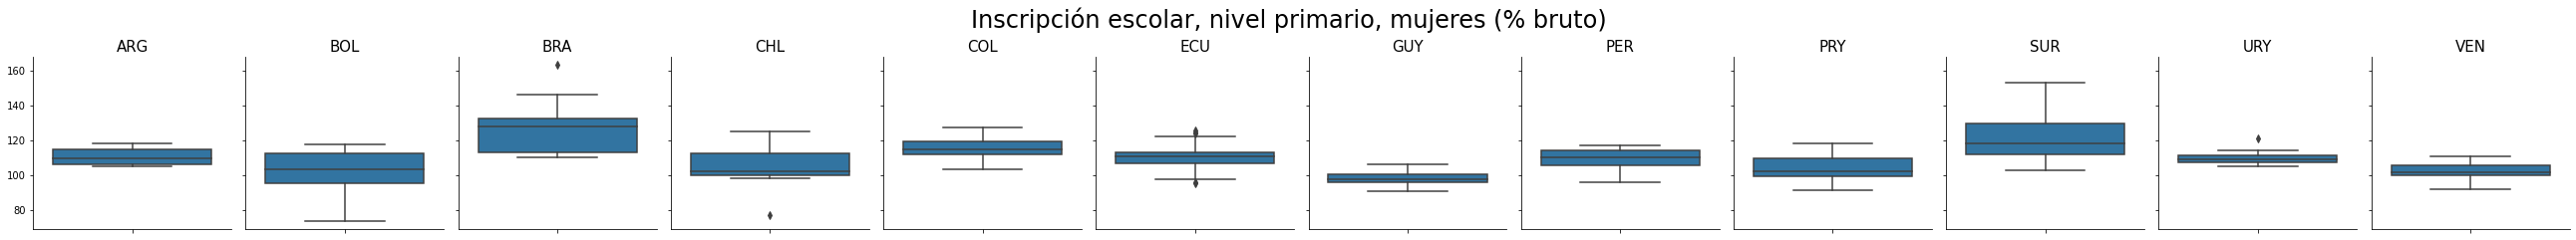

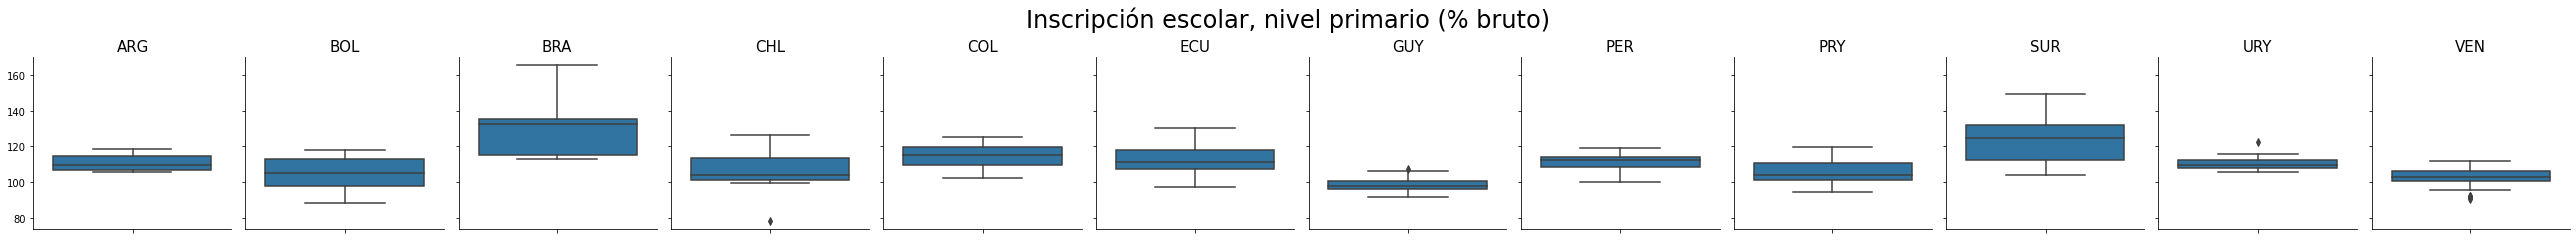

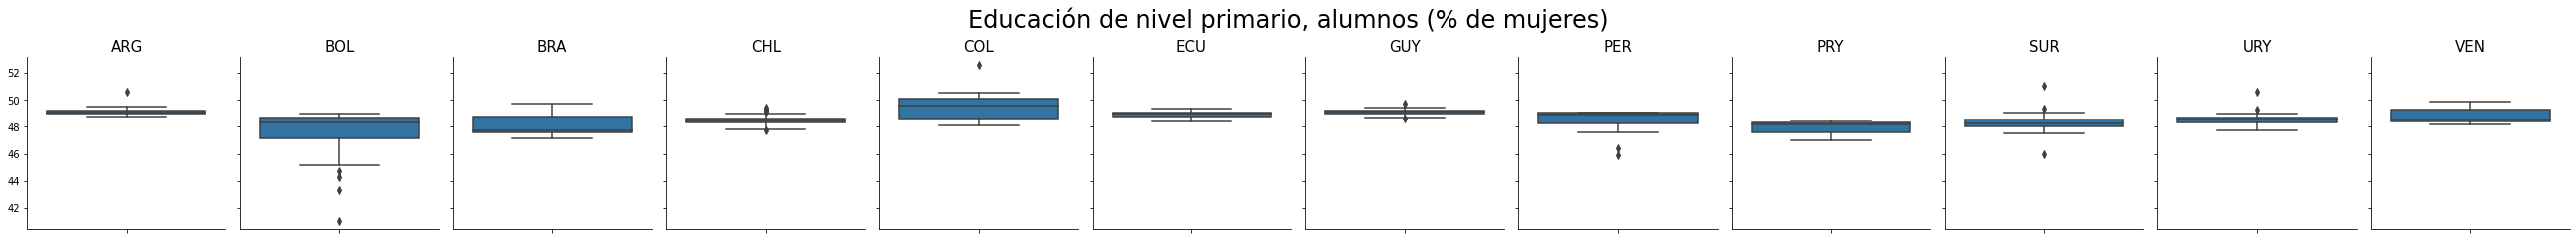

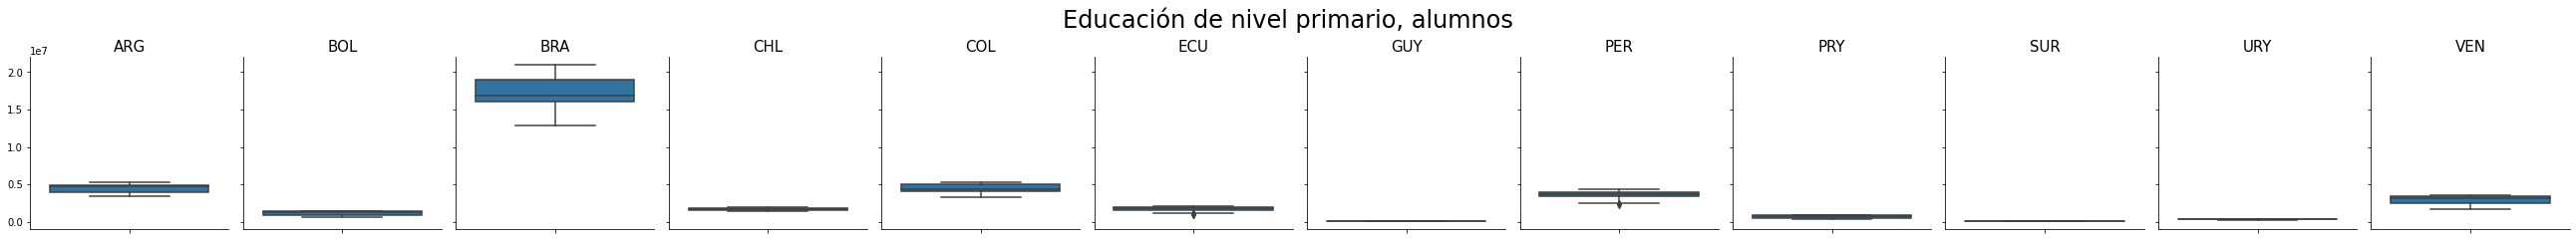

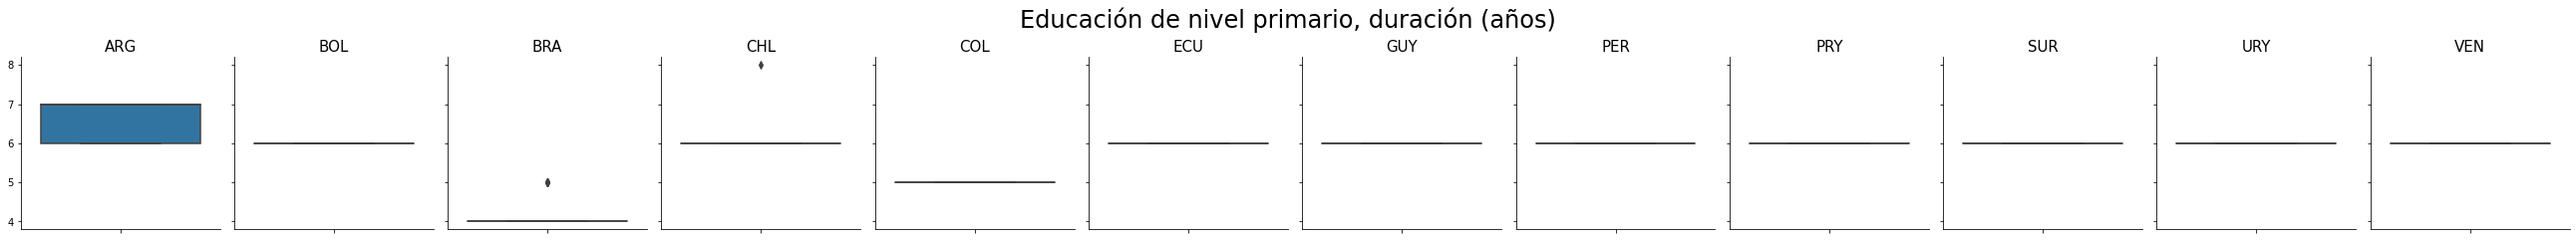

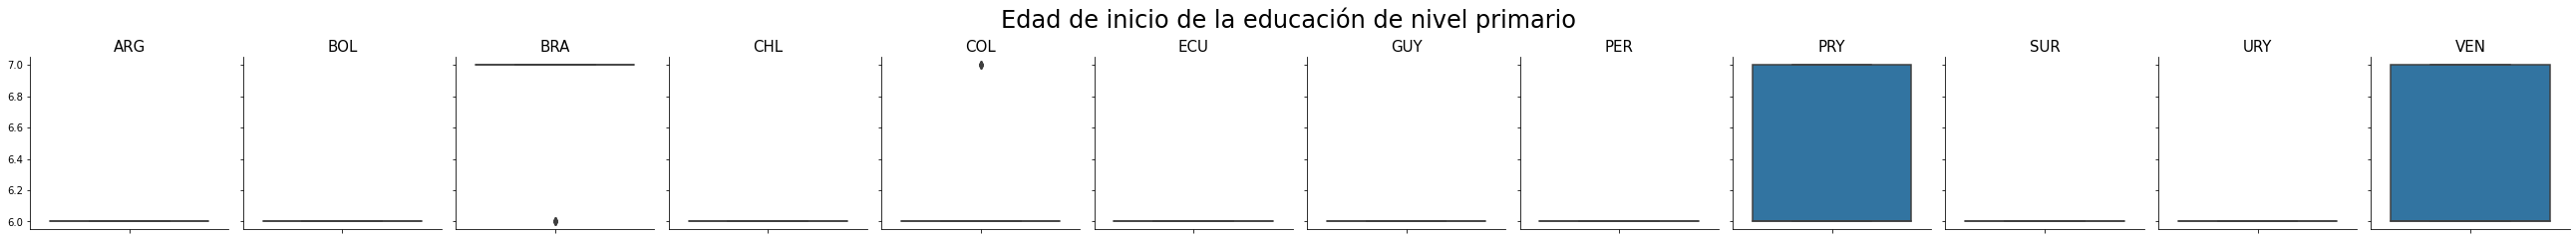

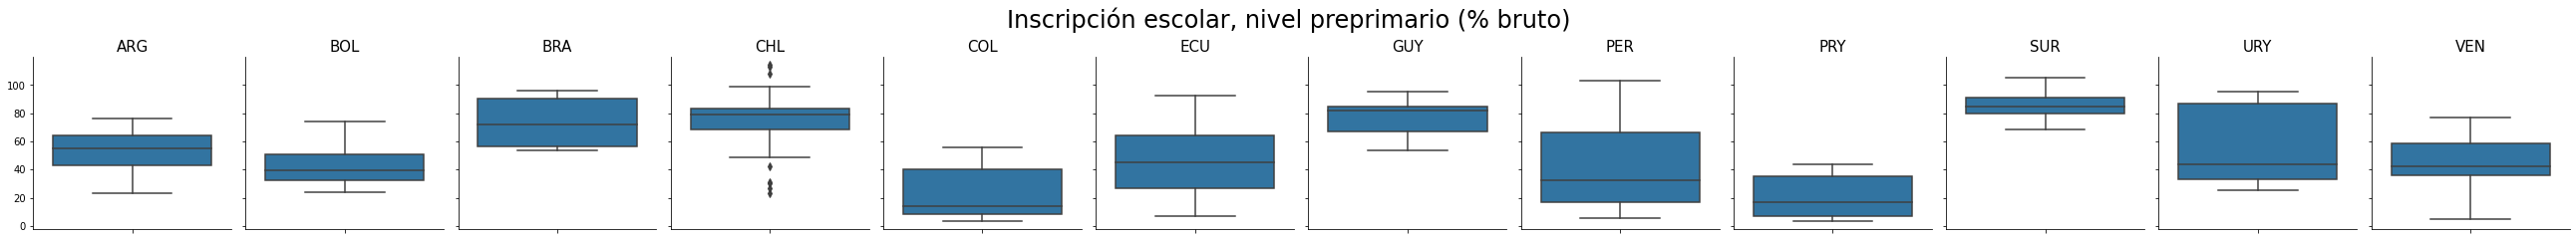

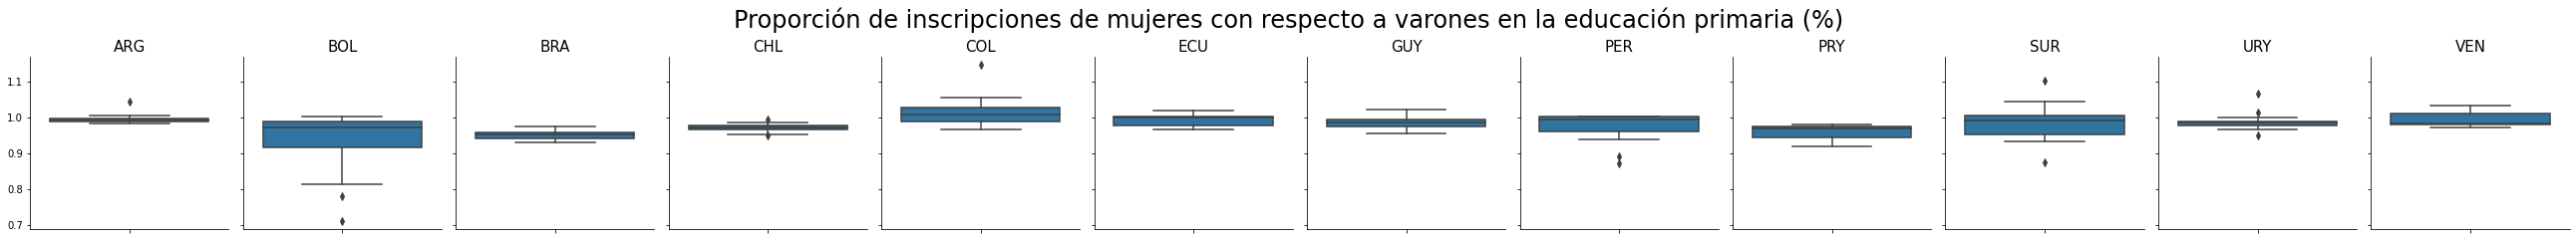

In [ ]:
plot_indi_15feat_boxplots("Education")

#### Gráficos de caja: Ambiente

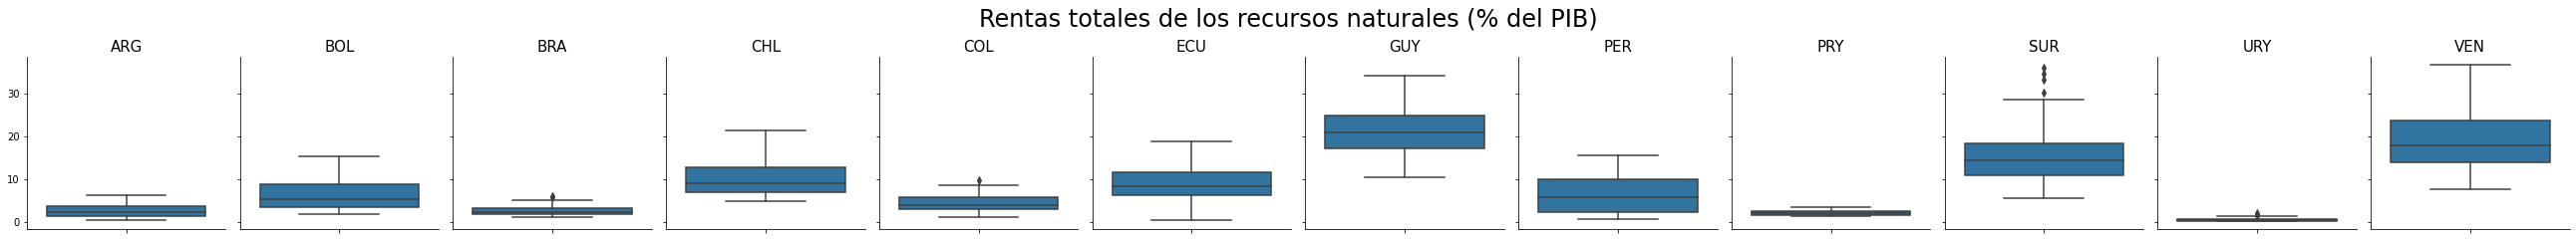

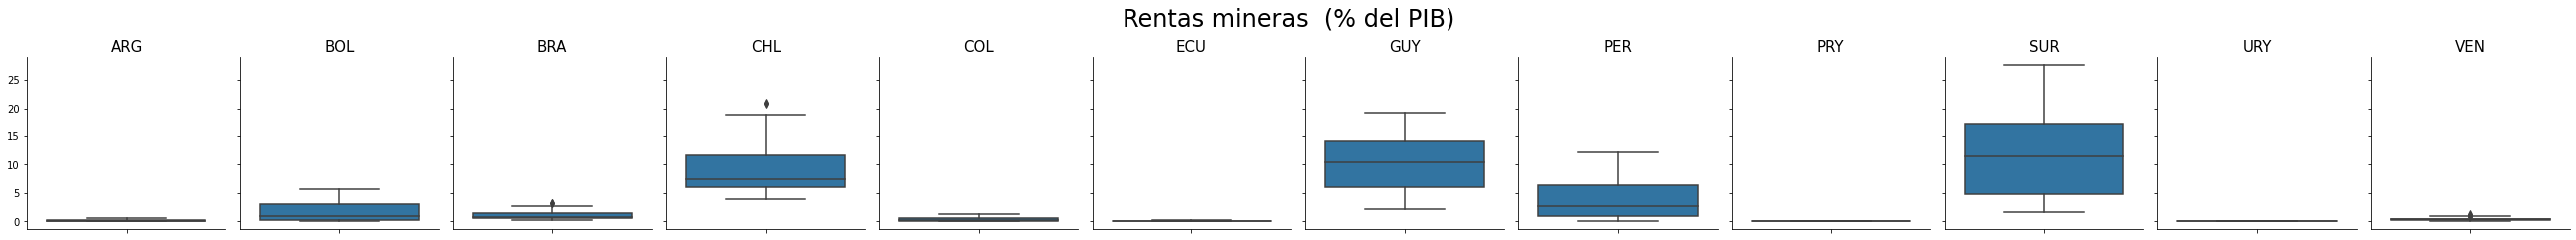

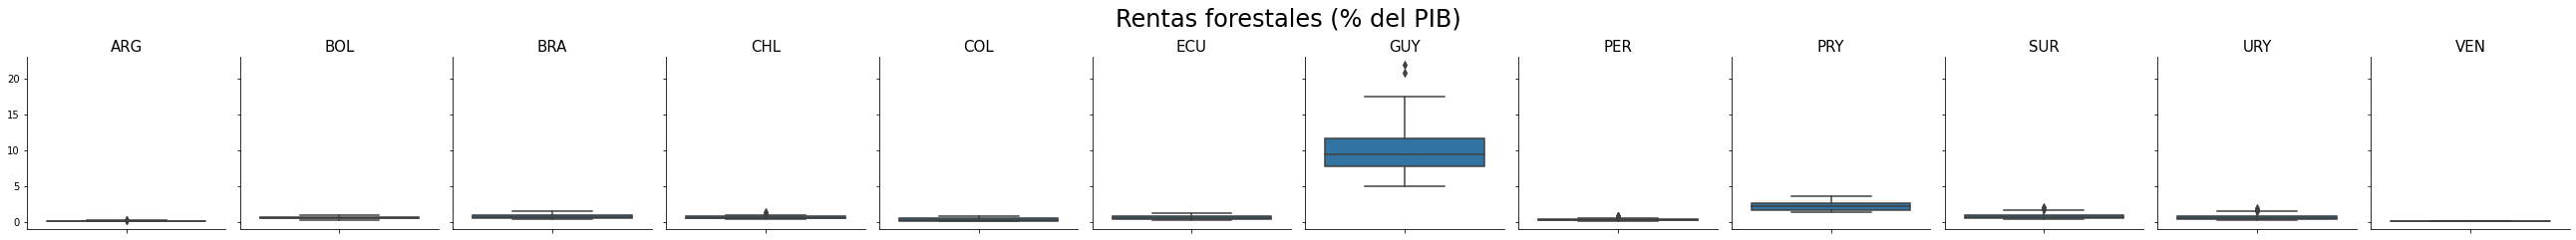

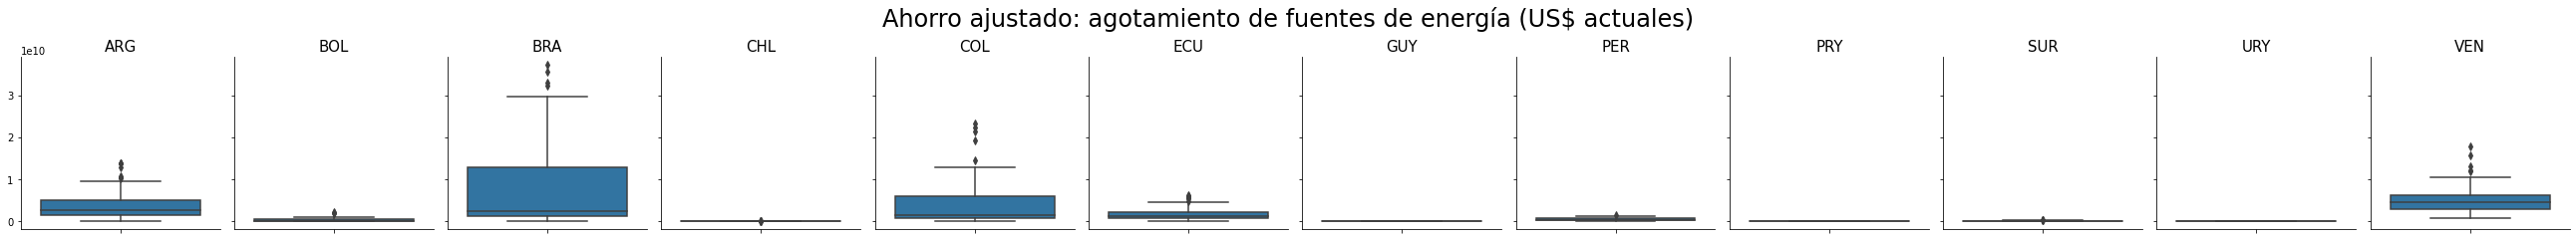

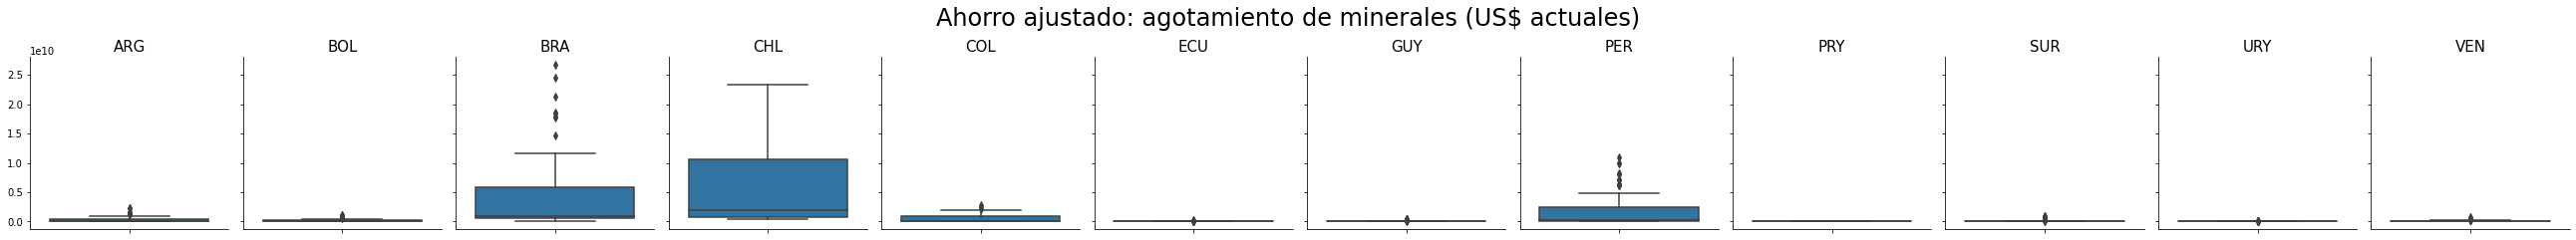

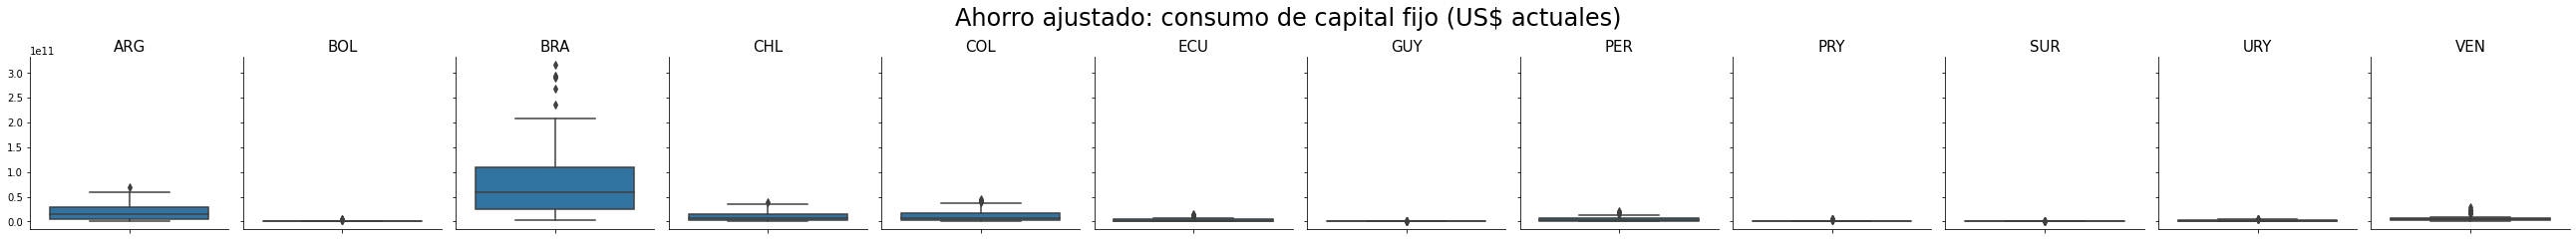

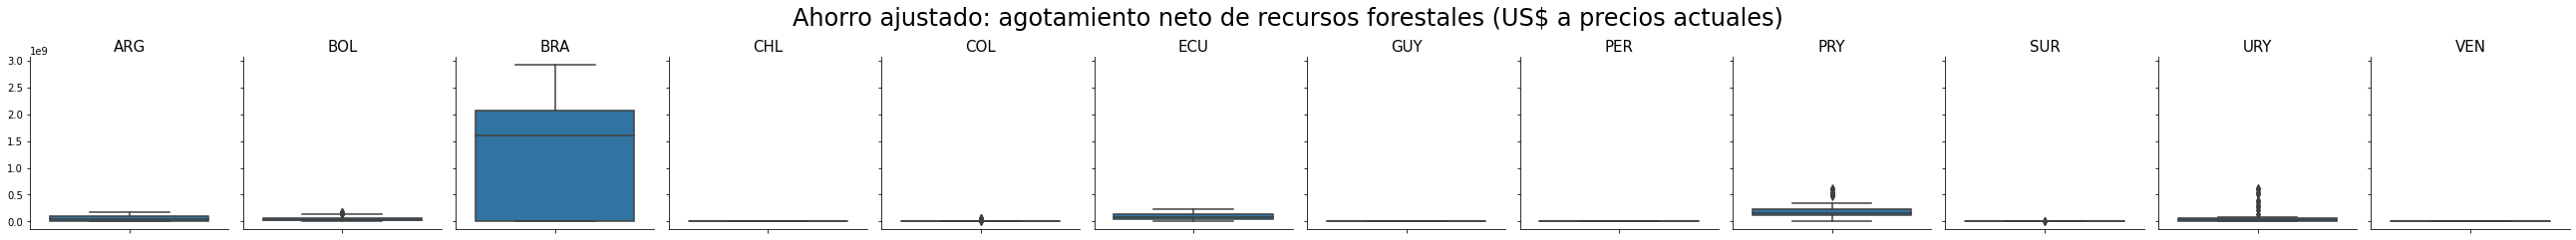

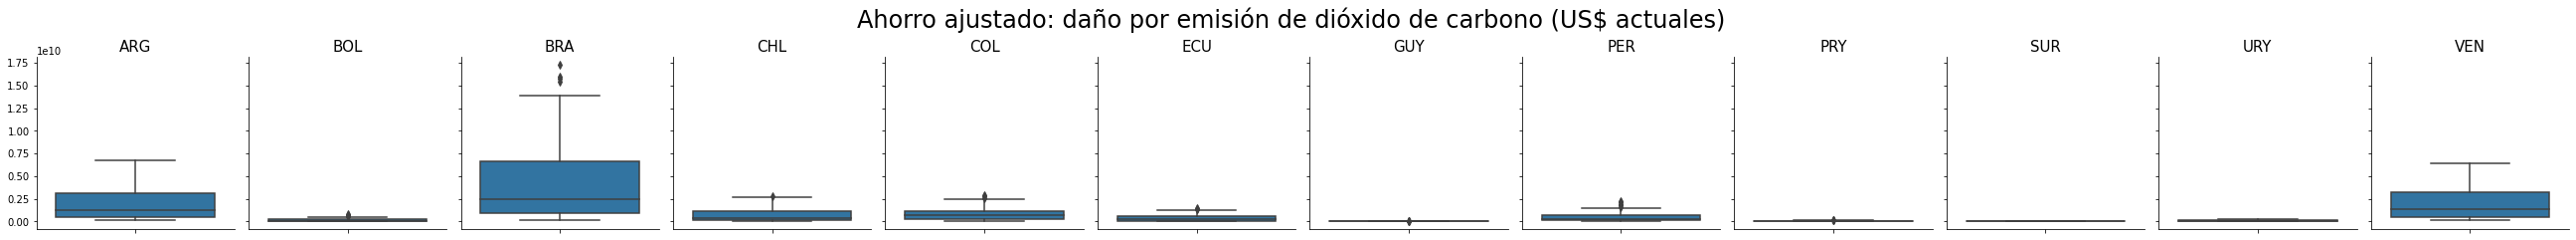

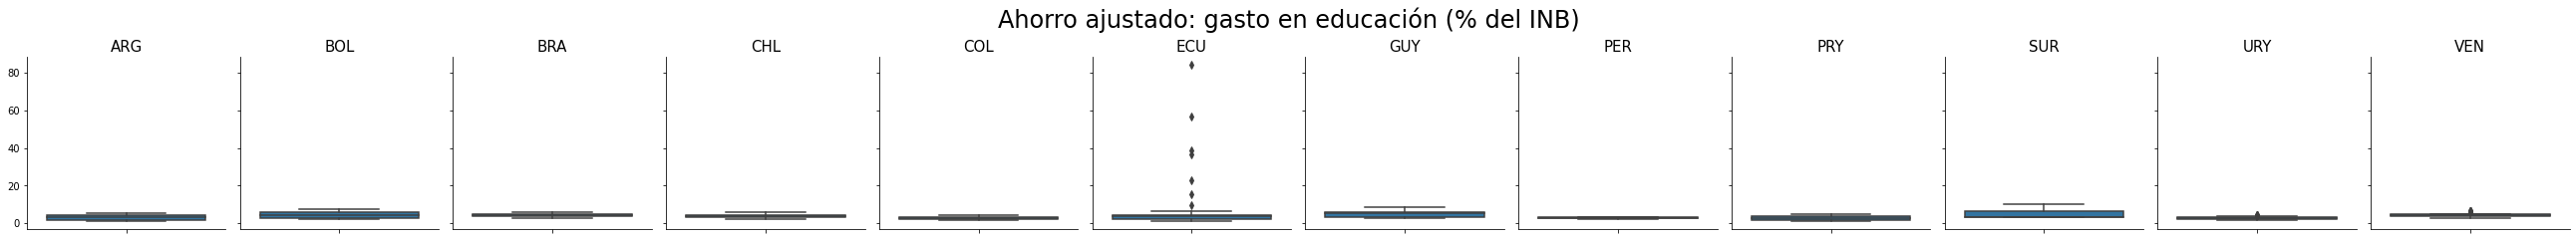

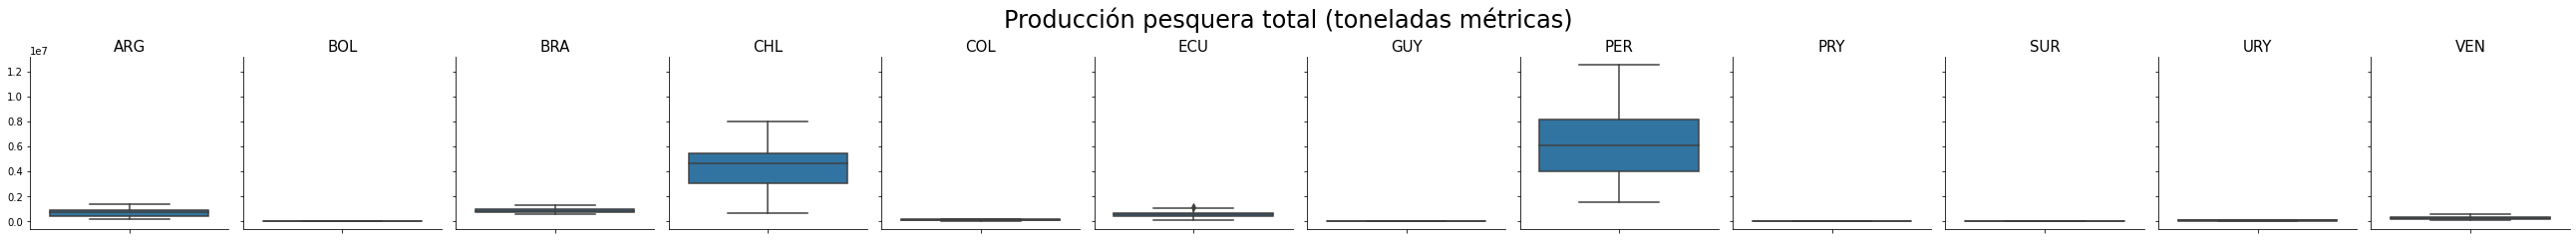

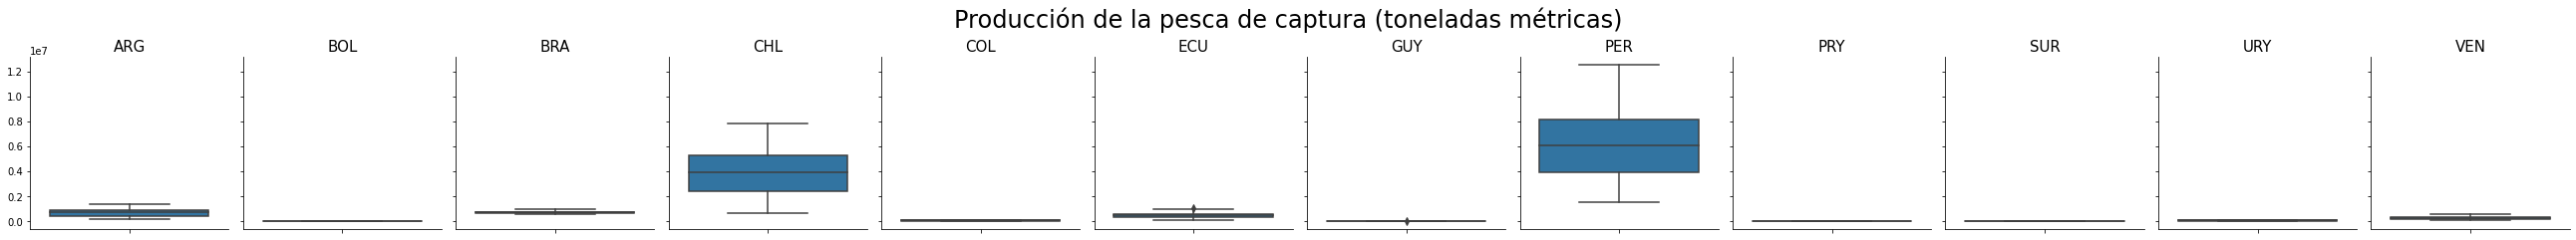

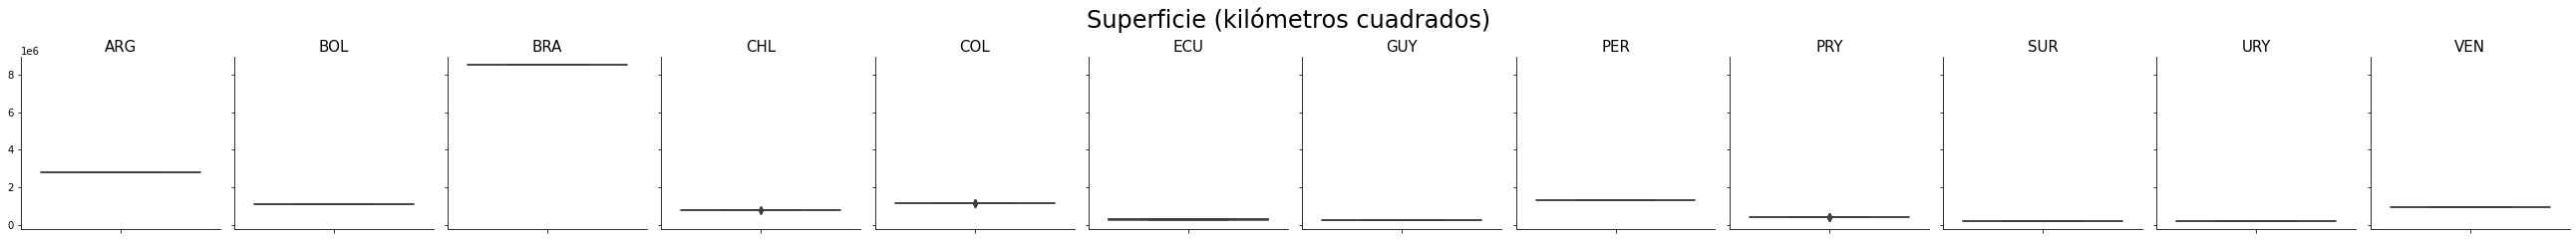

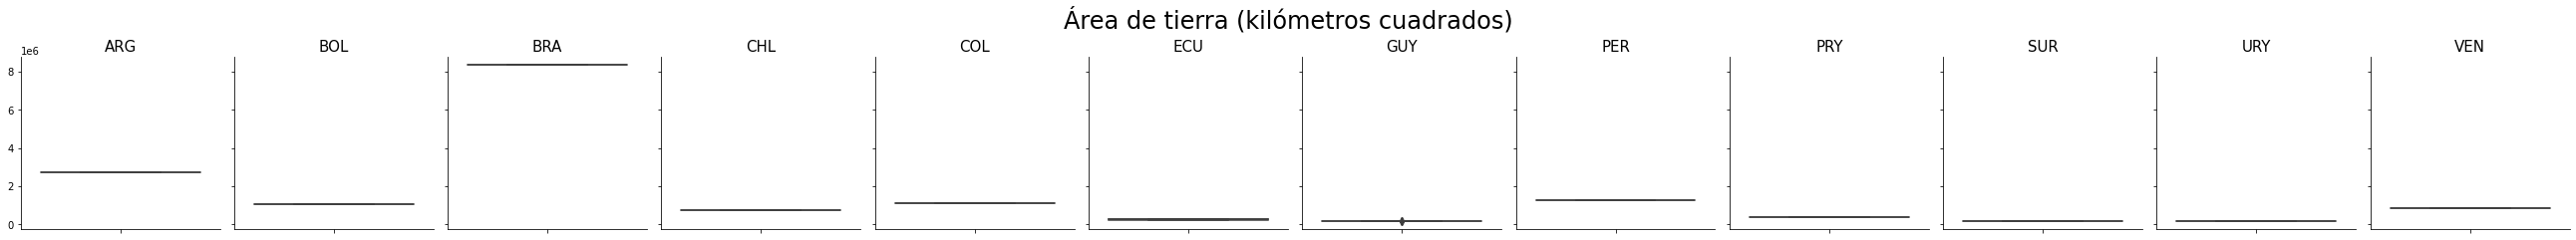

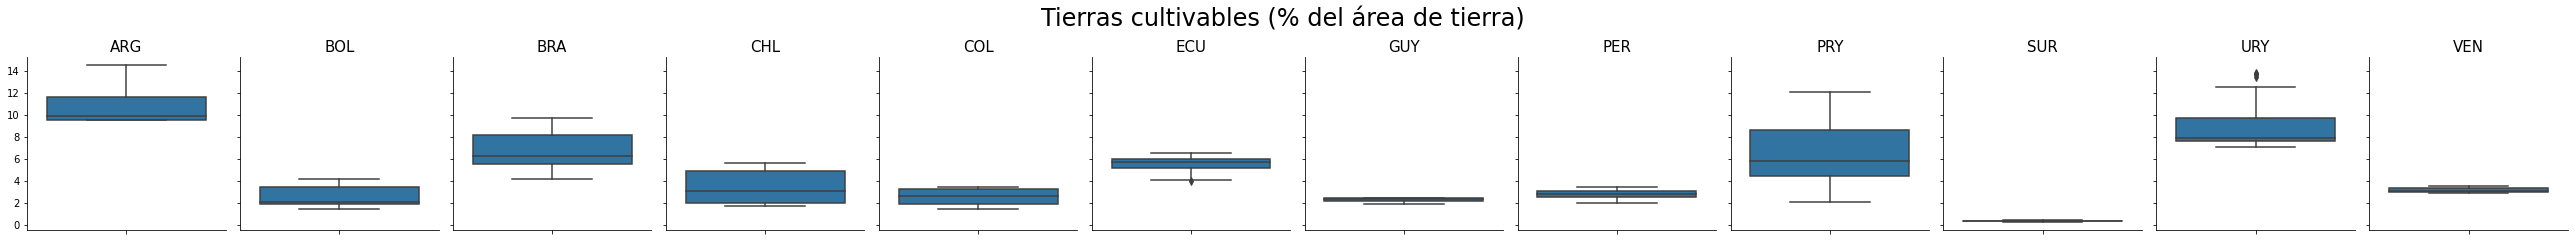

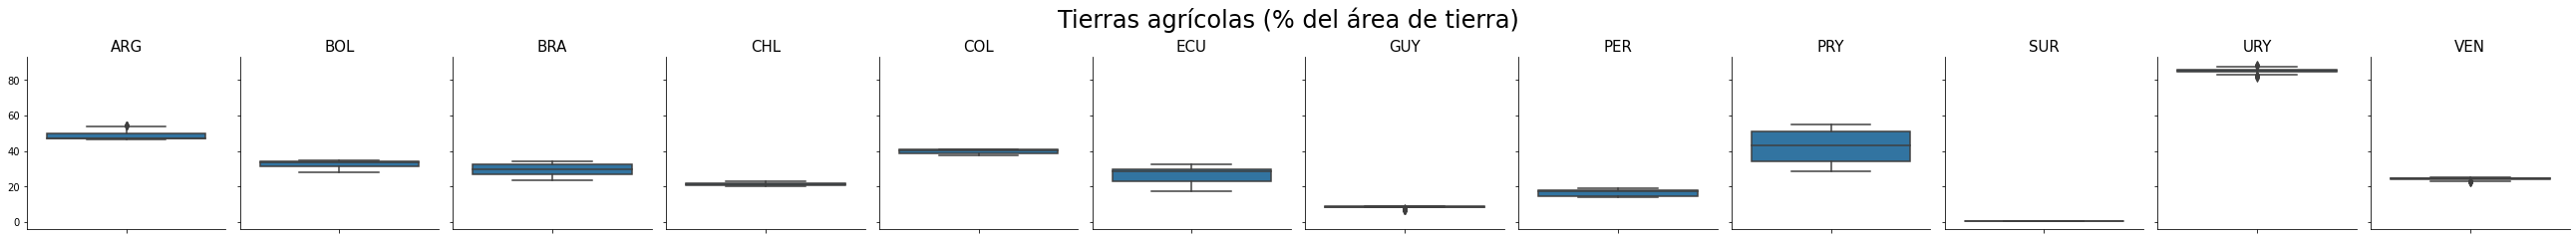

In [ ]:
plot_indi_15feat_boxplots("Environment")

#### Gráficos de caja: Salud

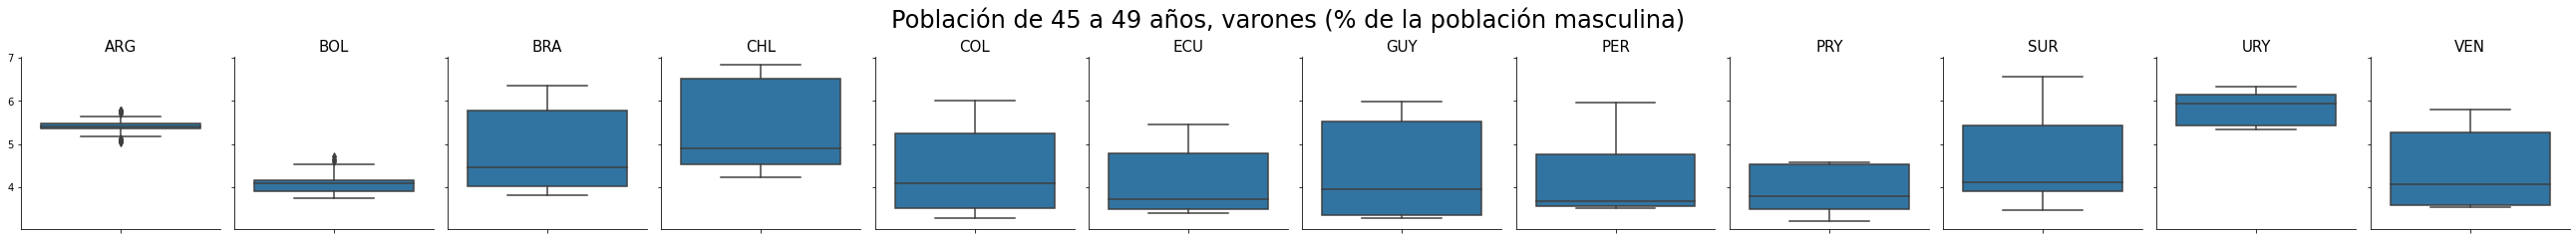

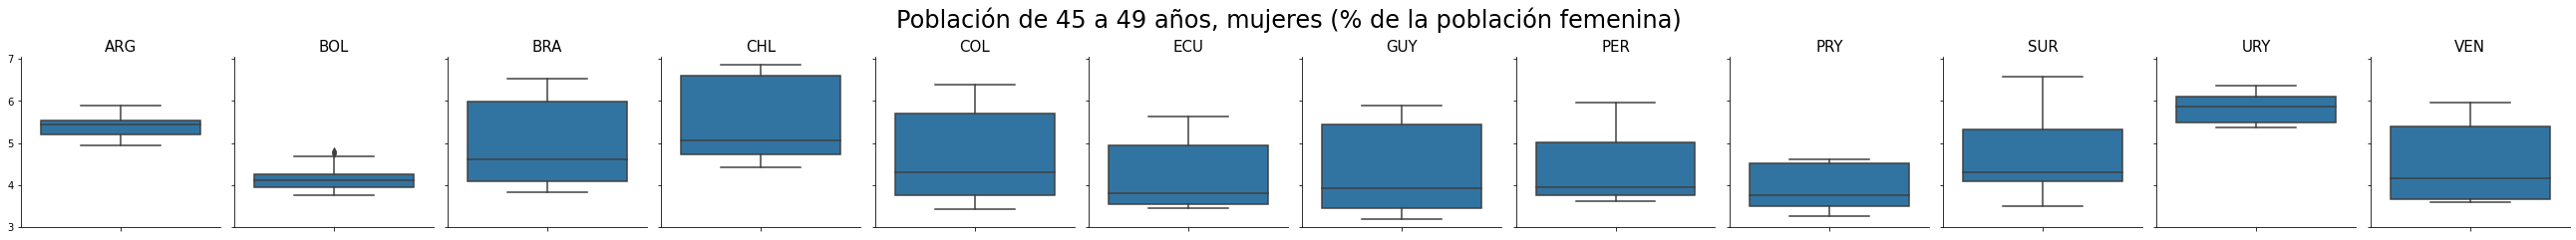

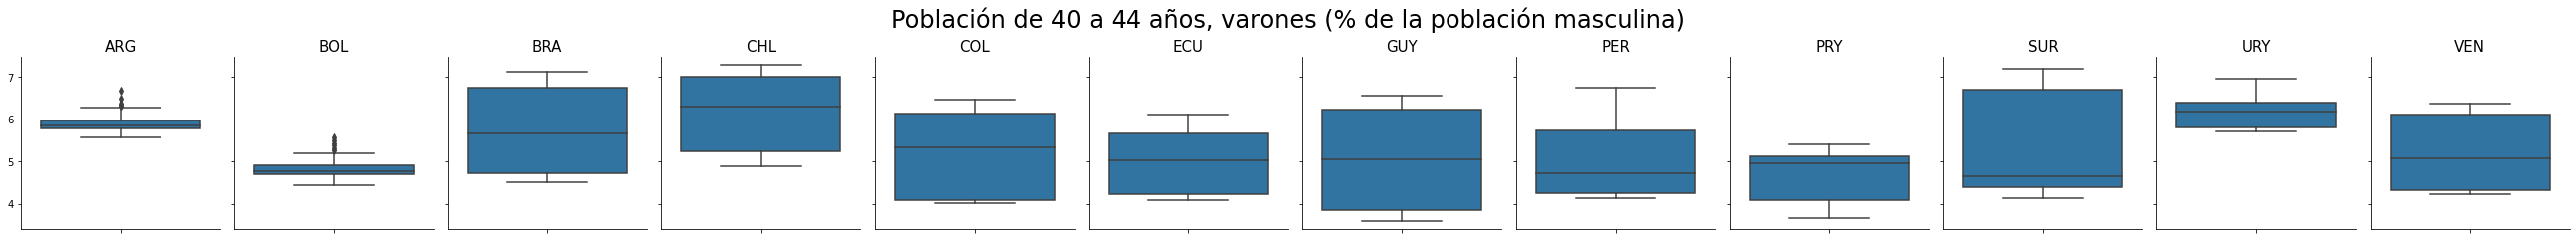

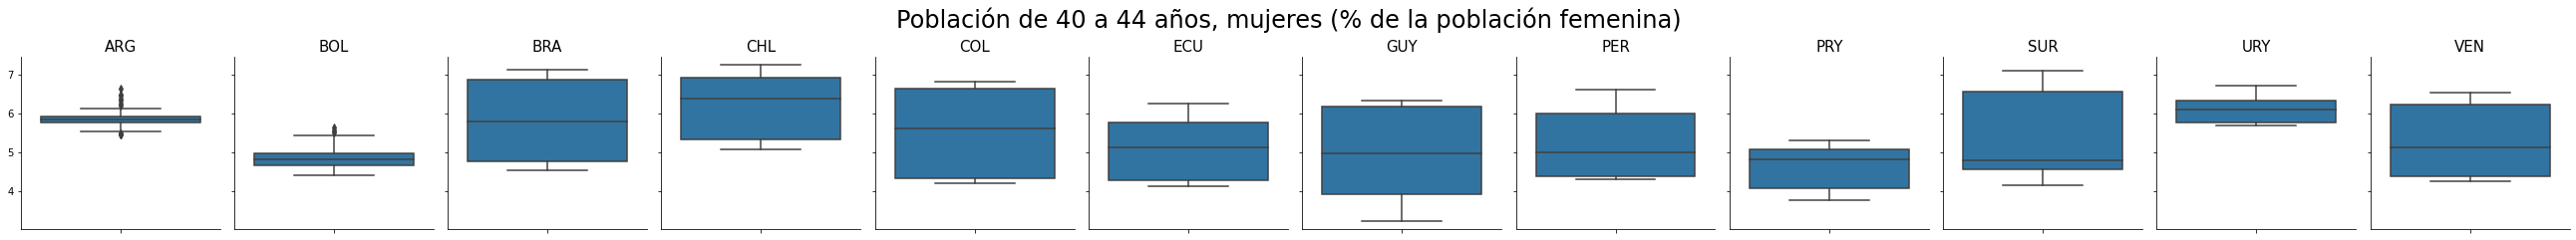

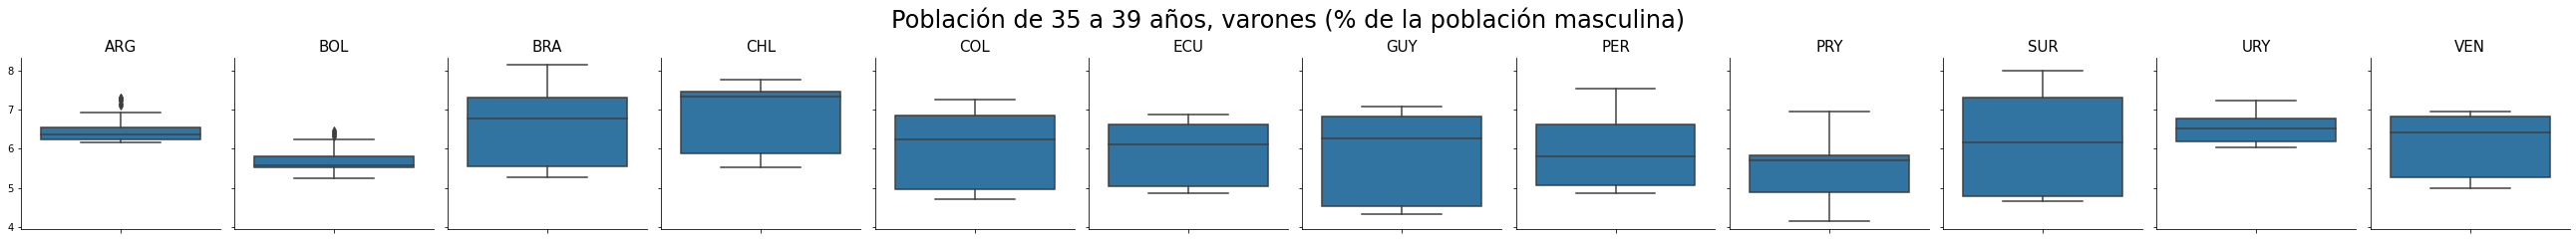

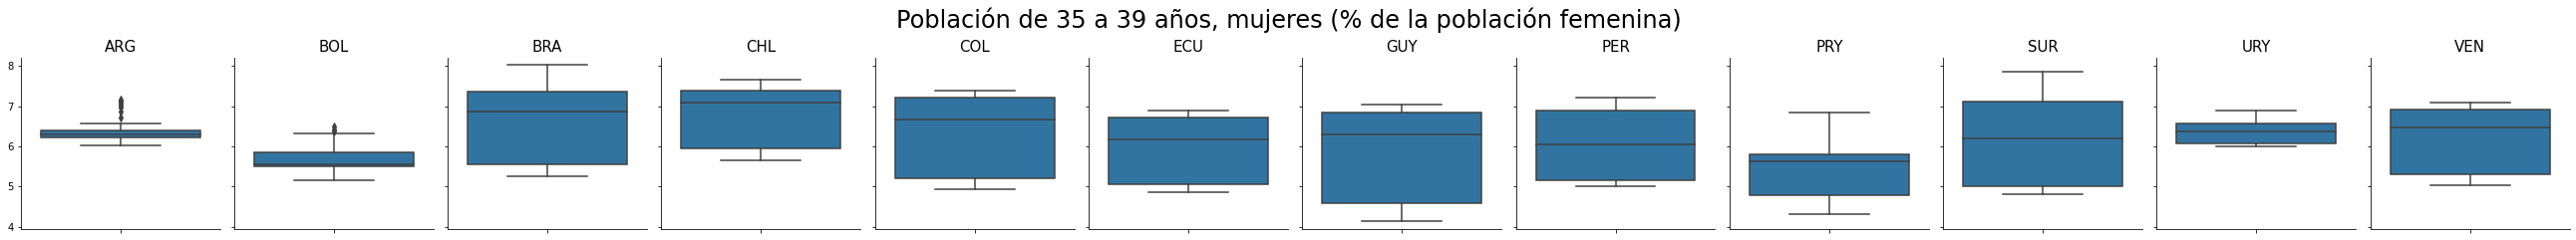

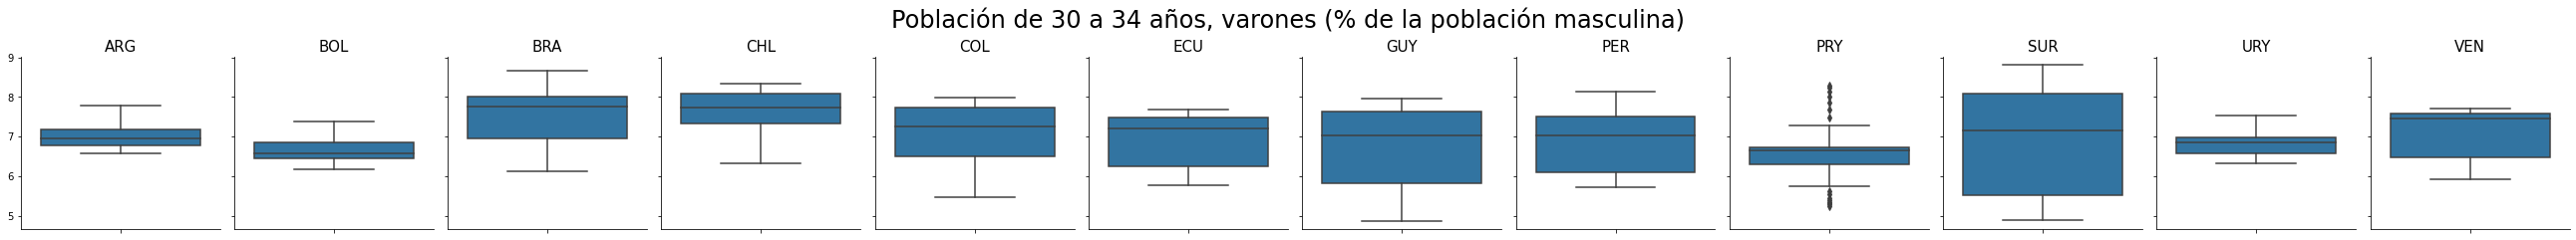

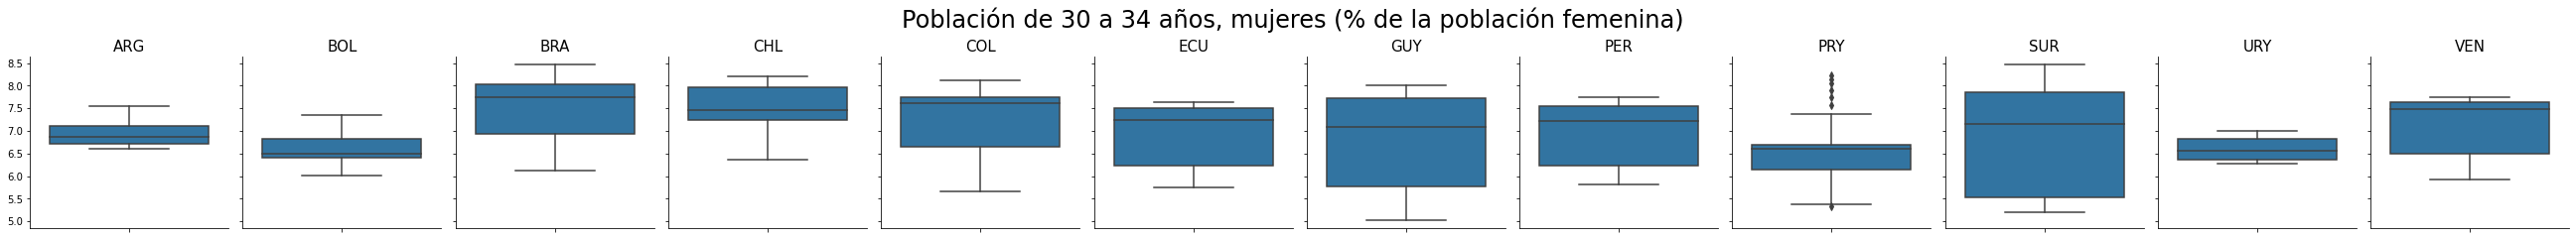

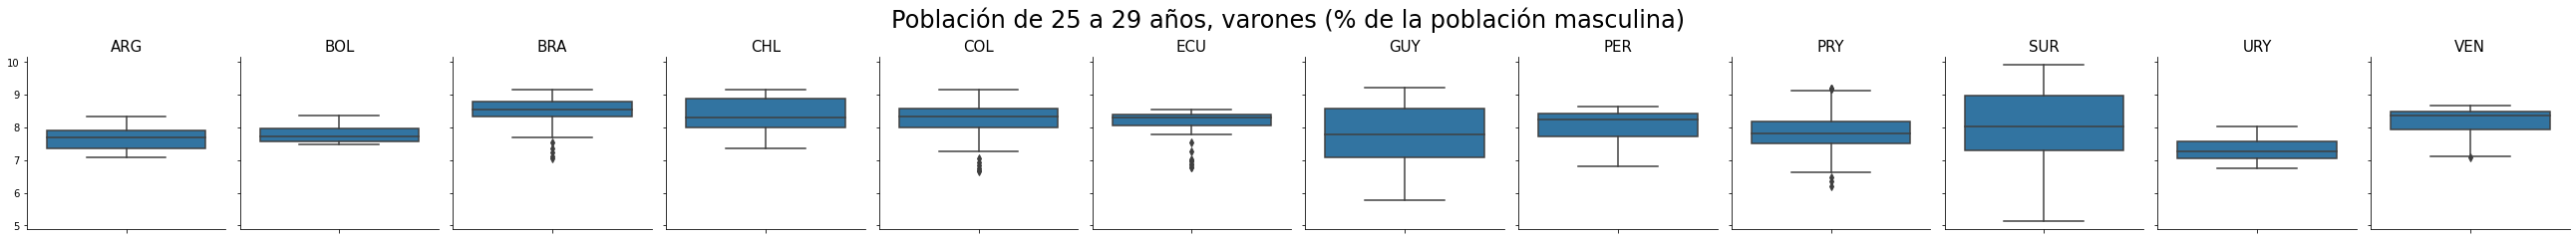

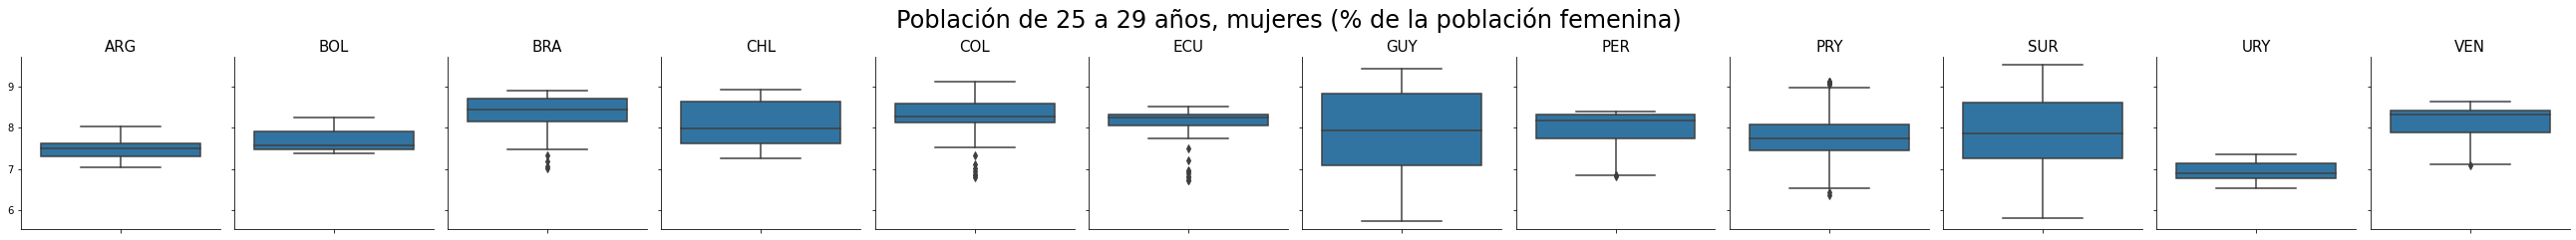

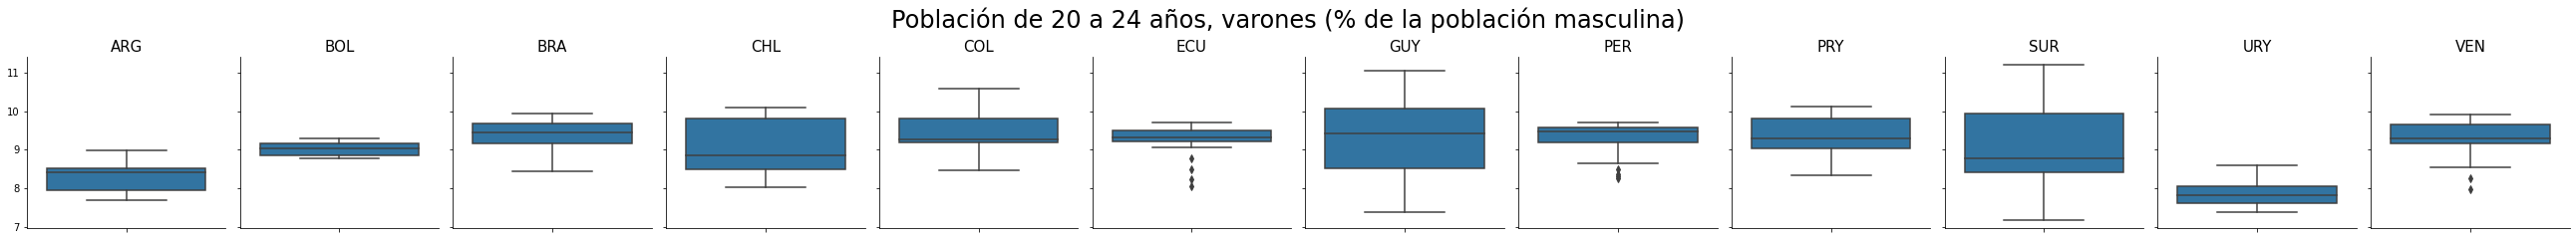

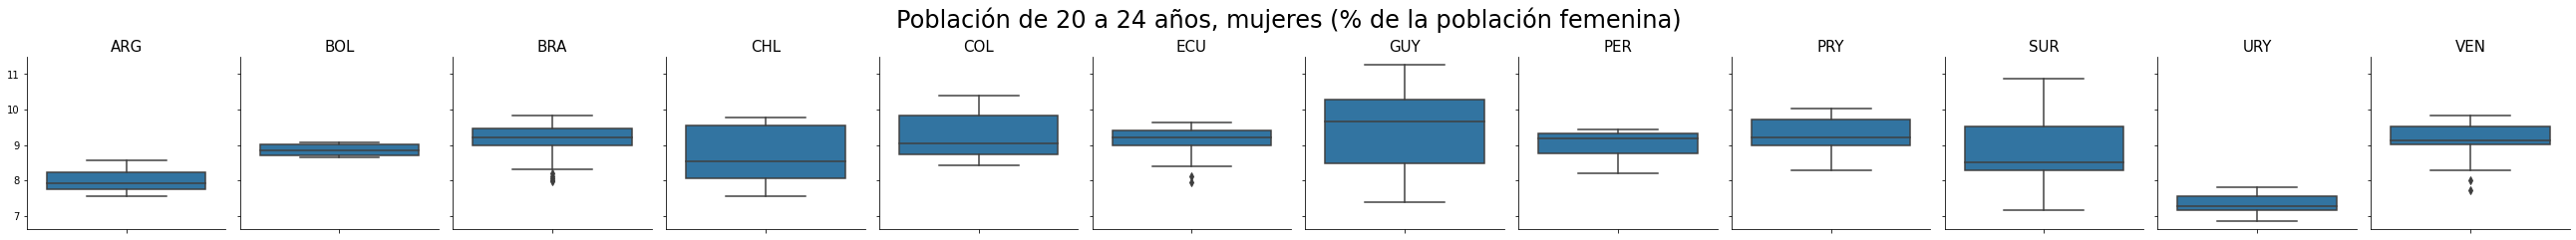

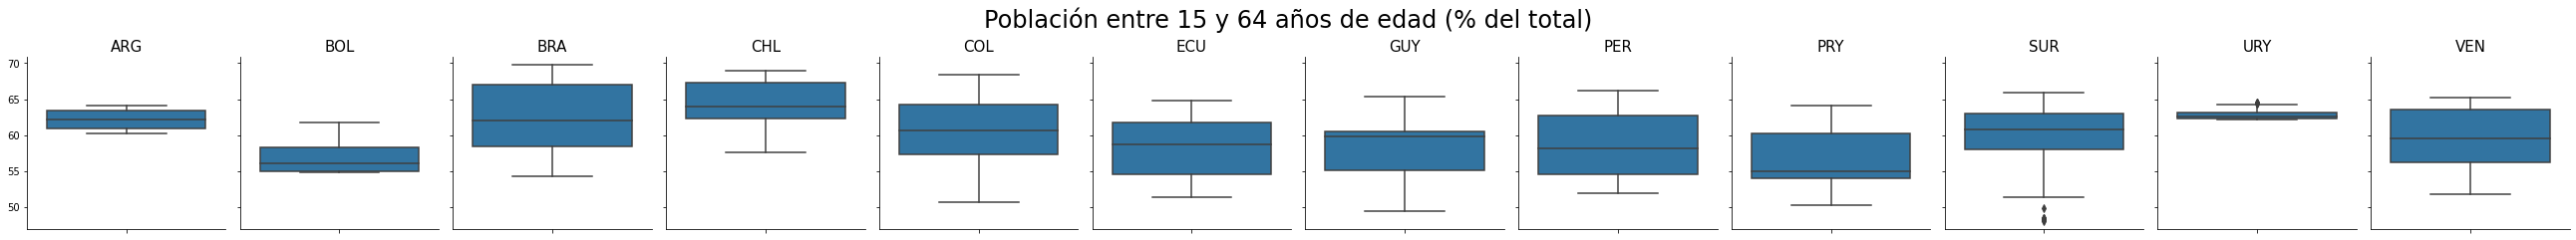

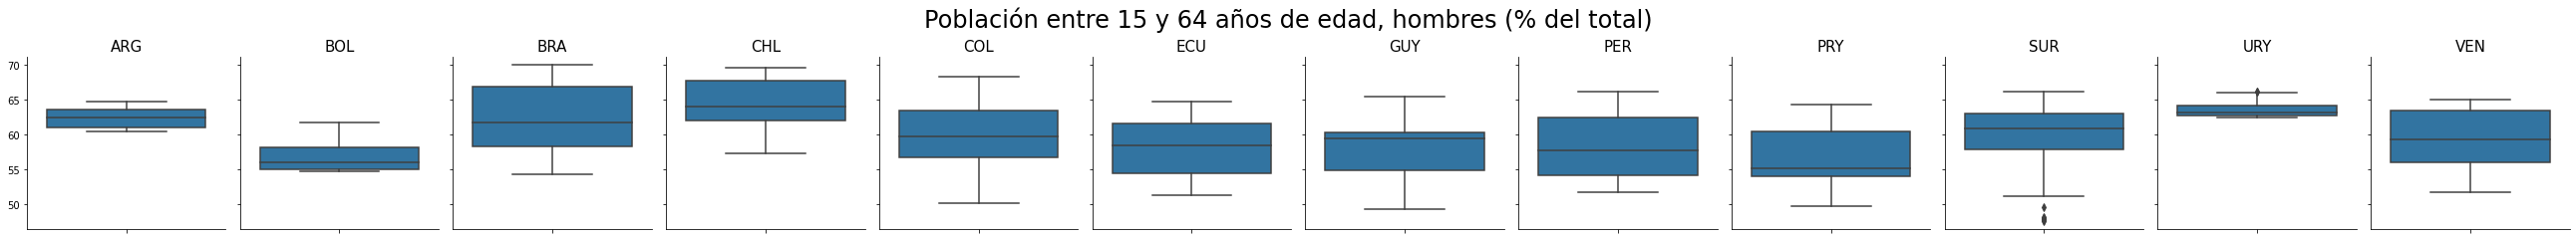

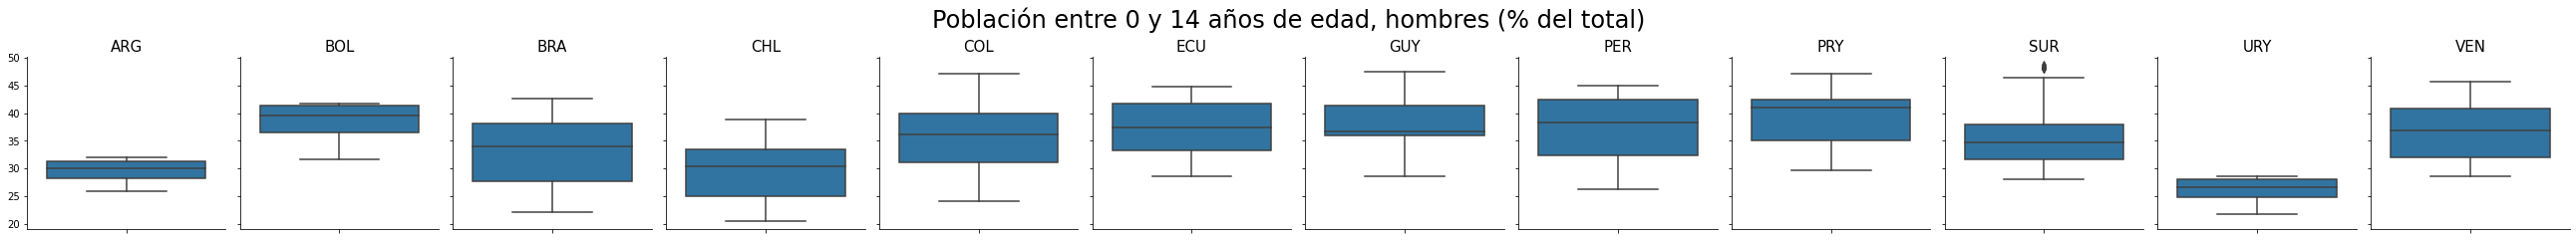

In [ ]:
plot_indi_15feat_boxplots("Health")

#### Gráficos de caja: Protección social

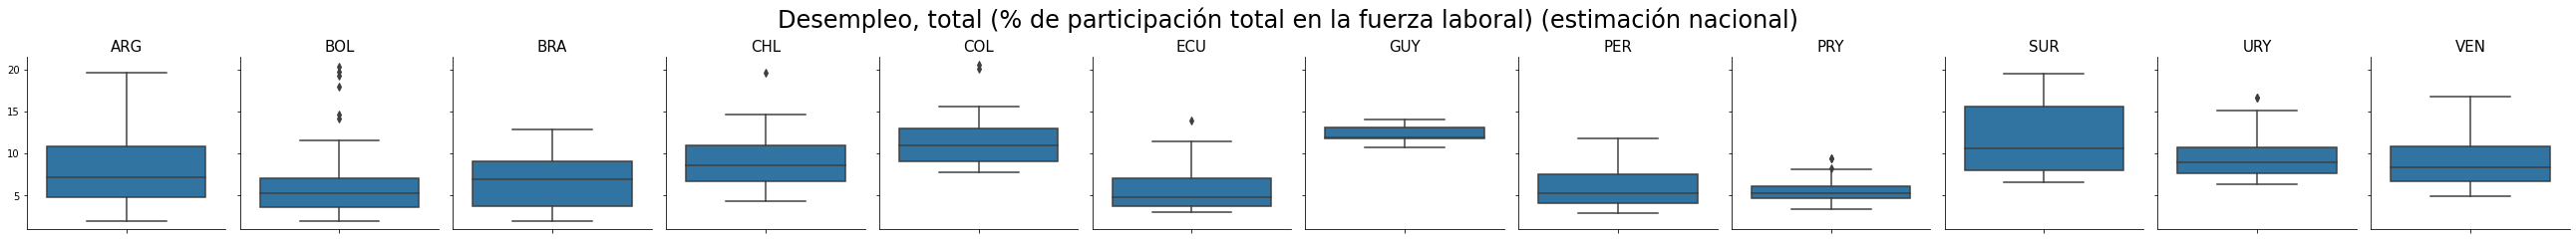

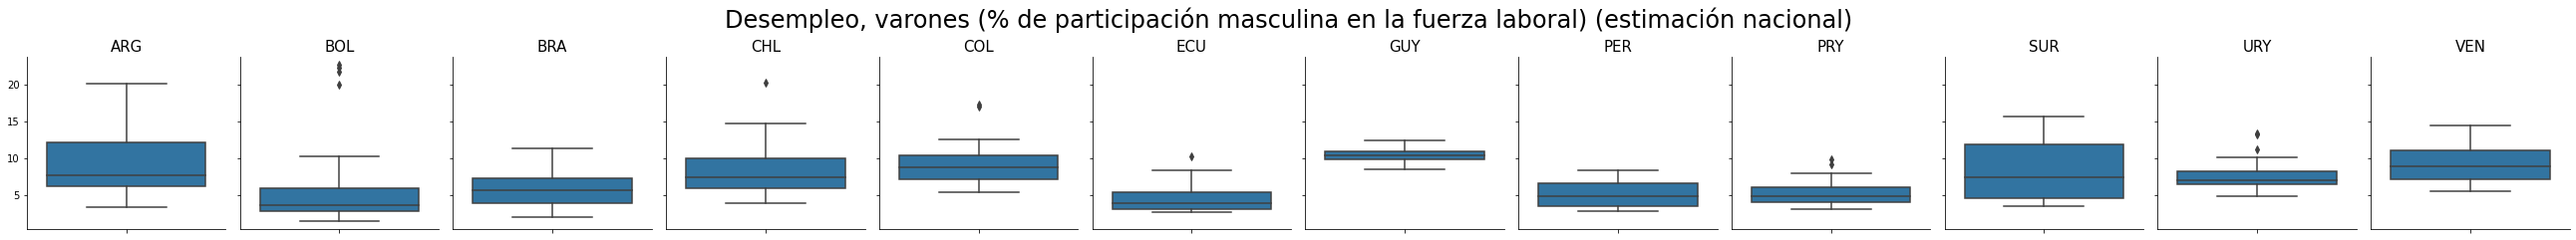

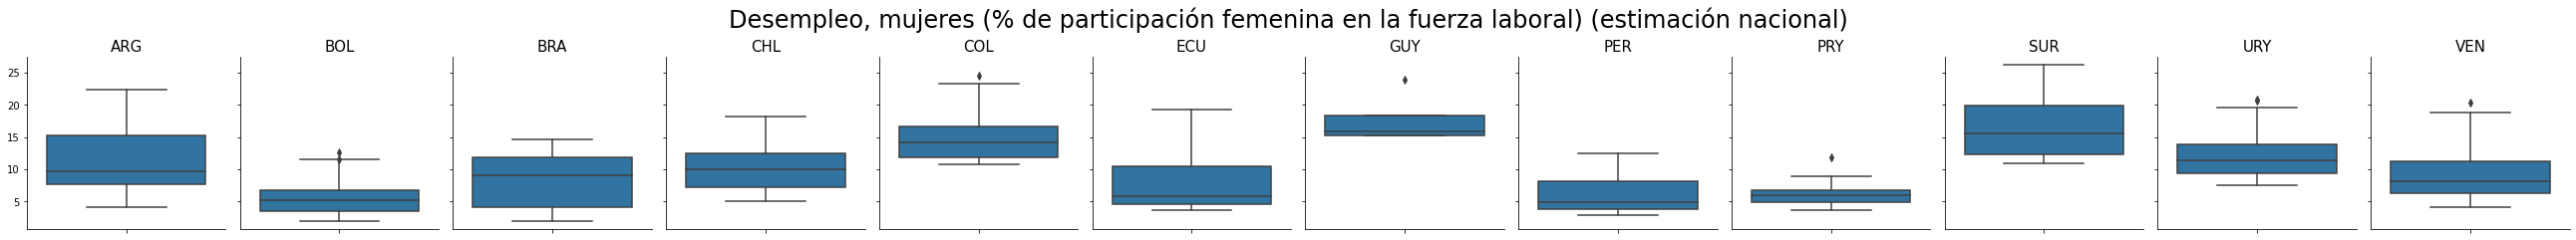

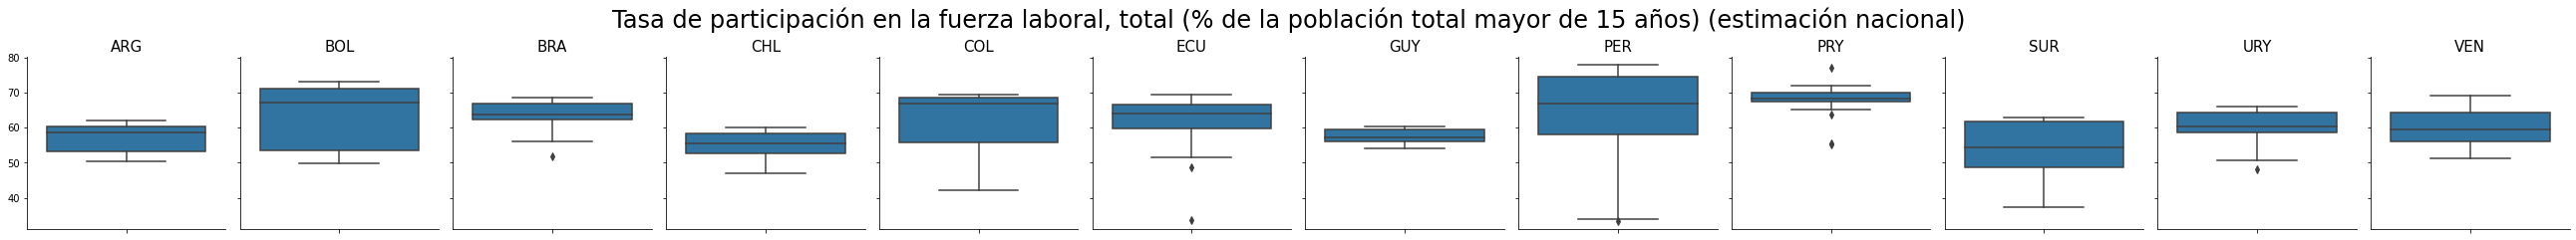

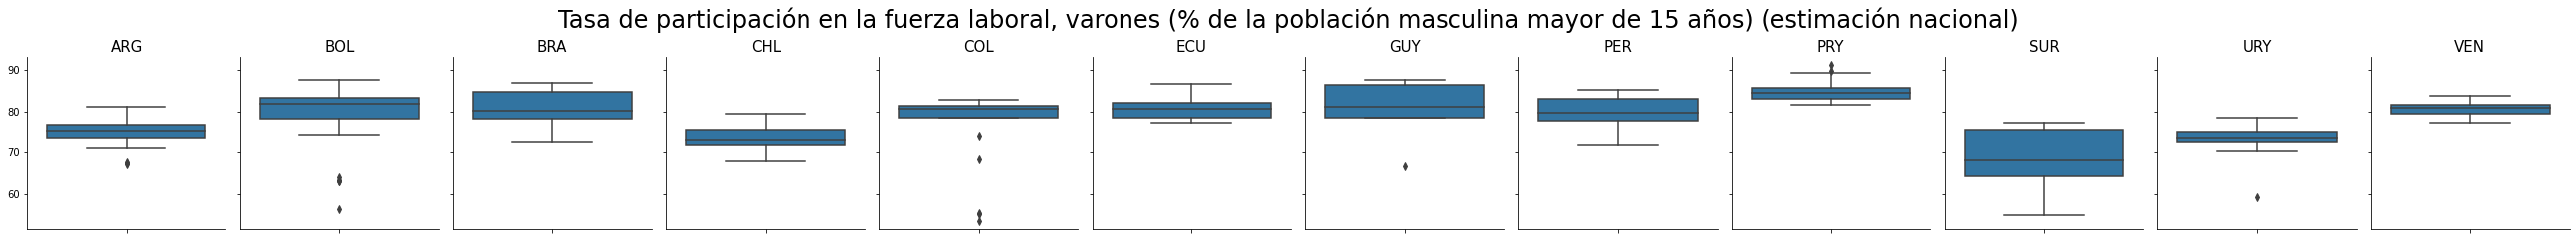

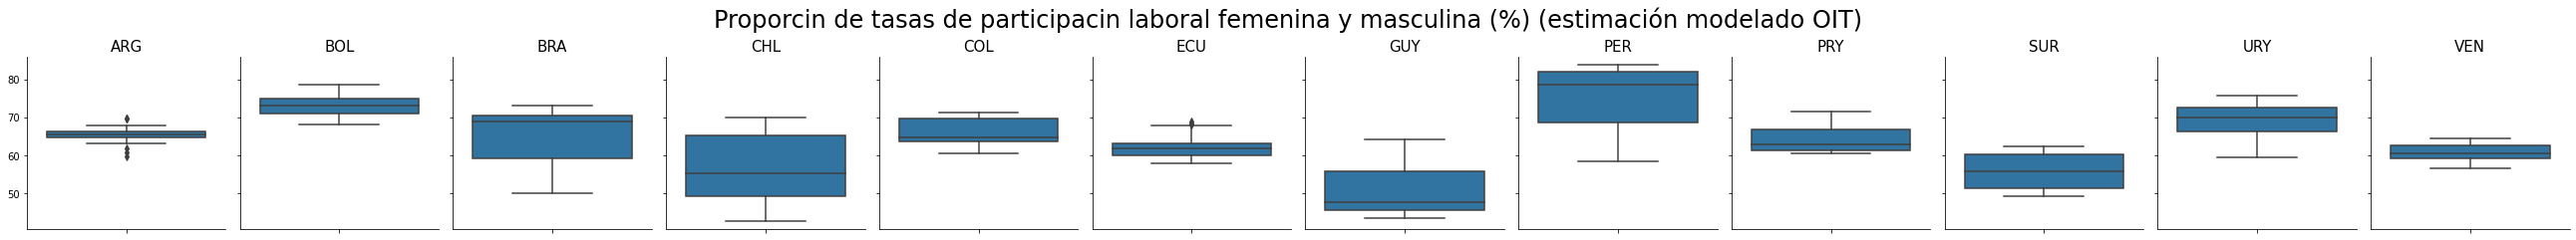

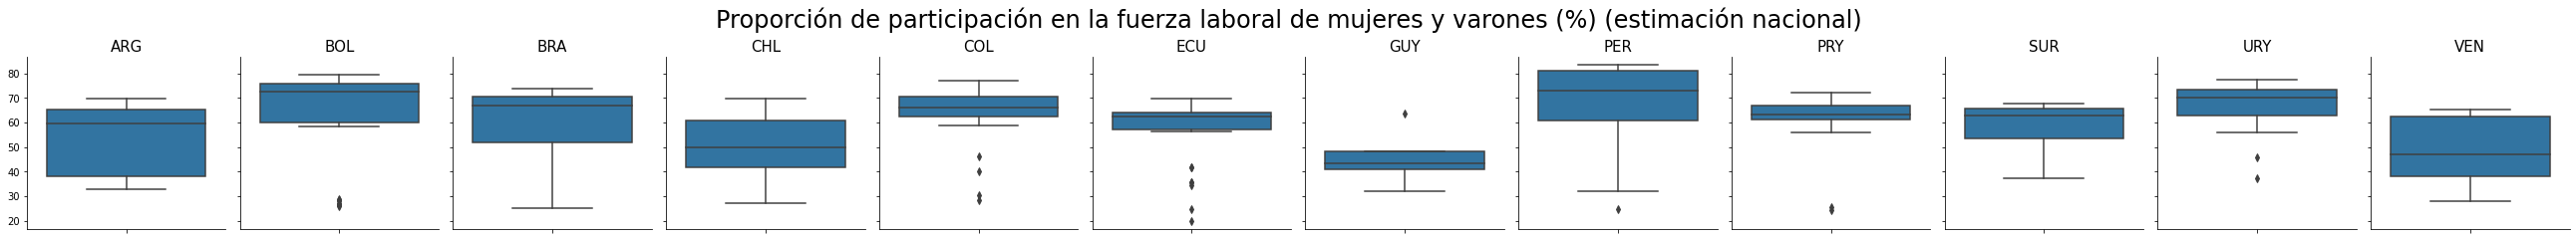

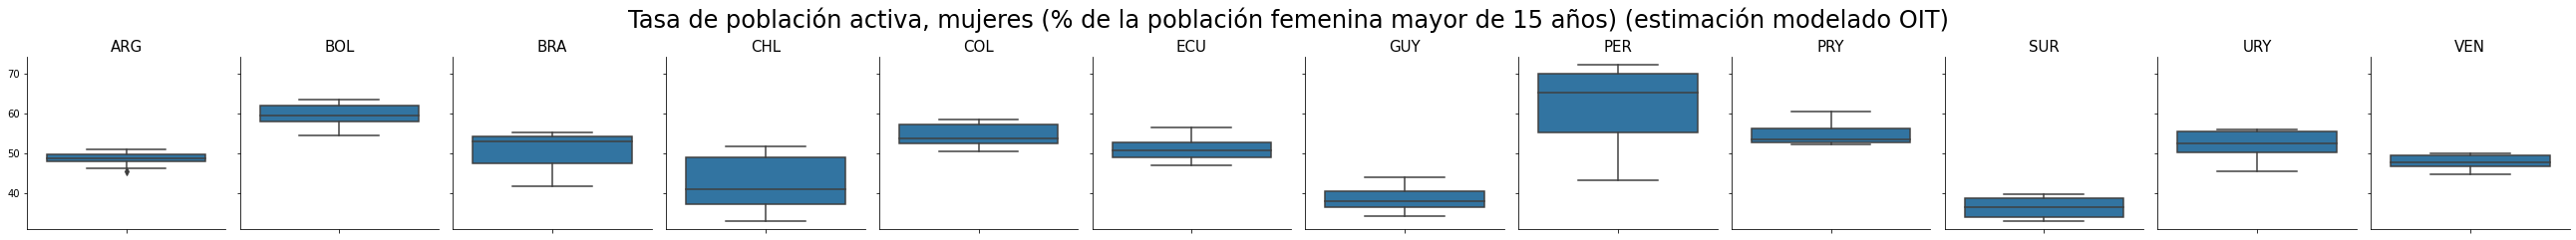

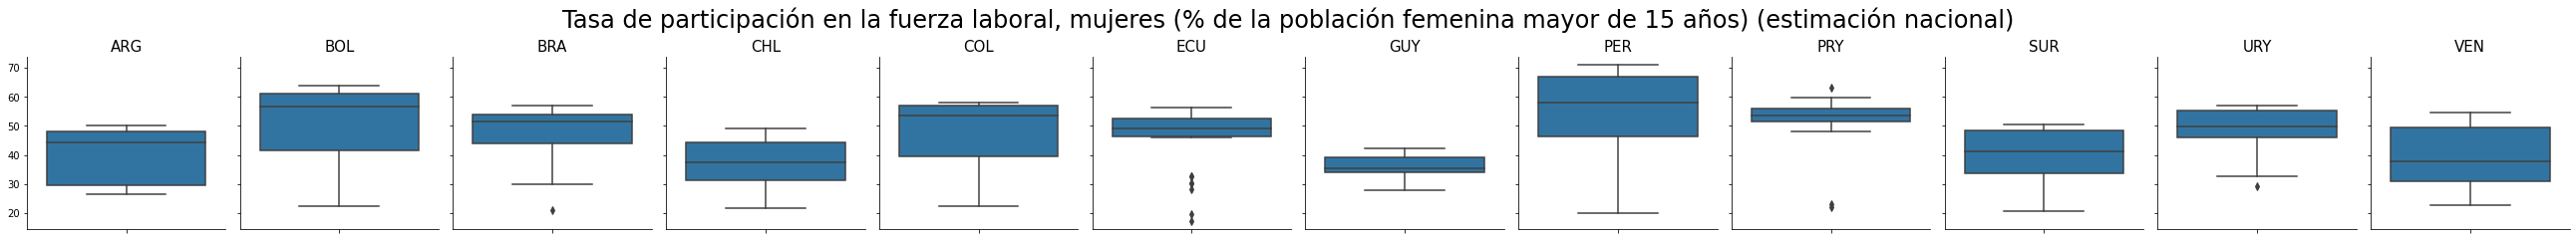

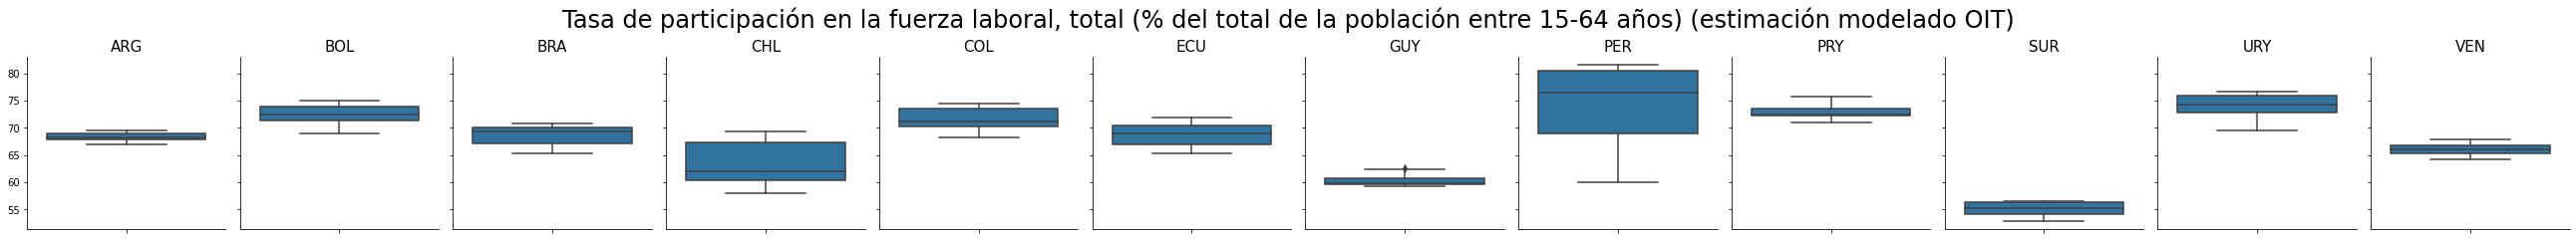

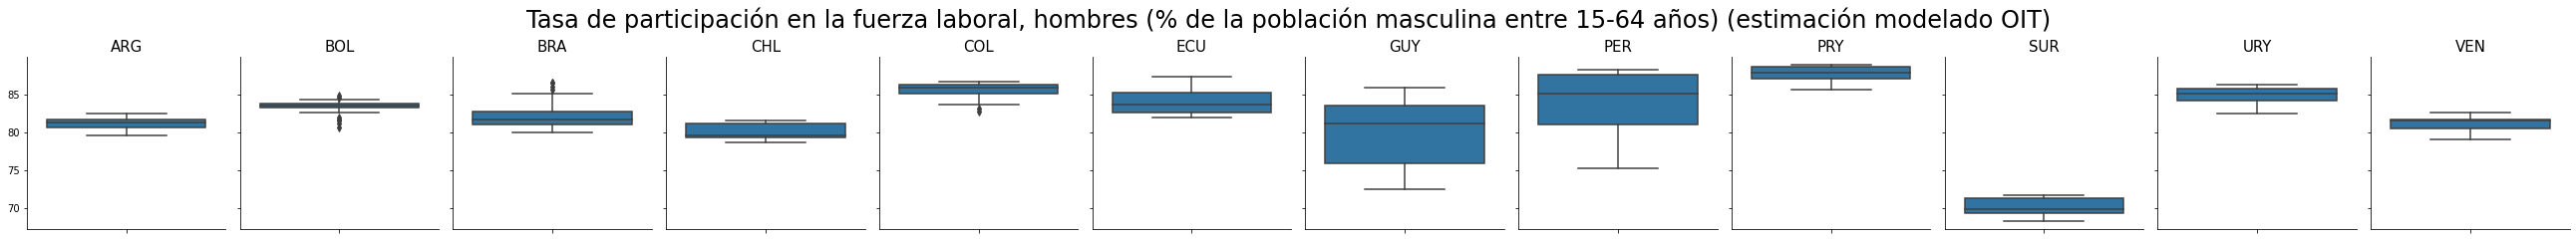

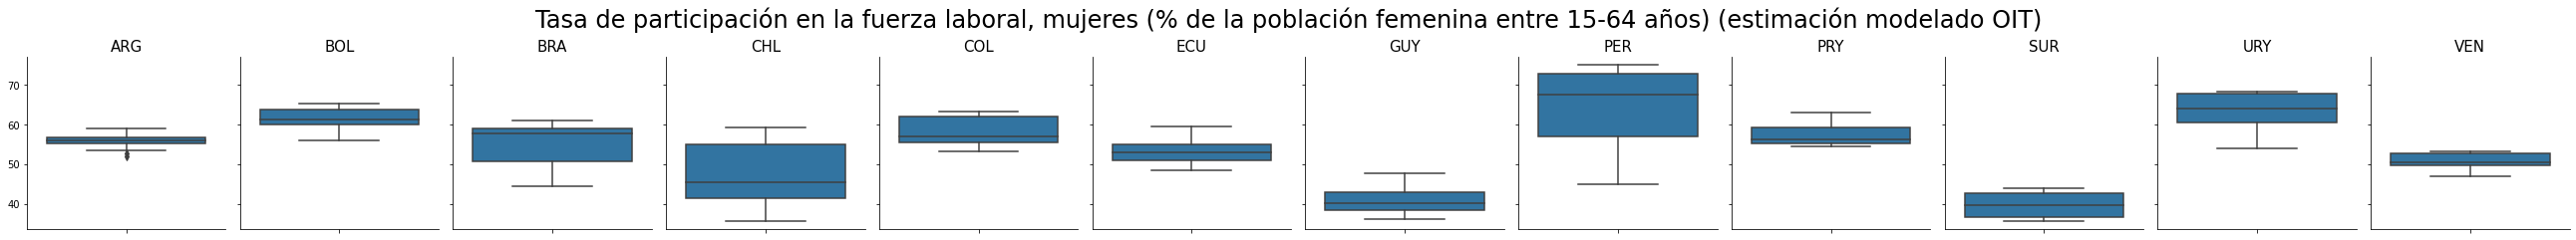

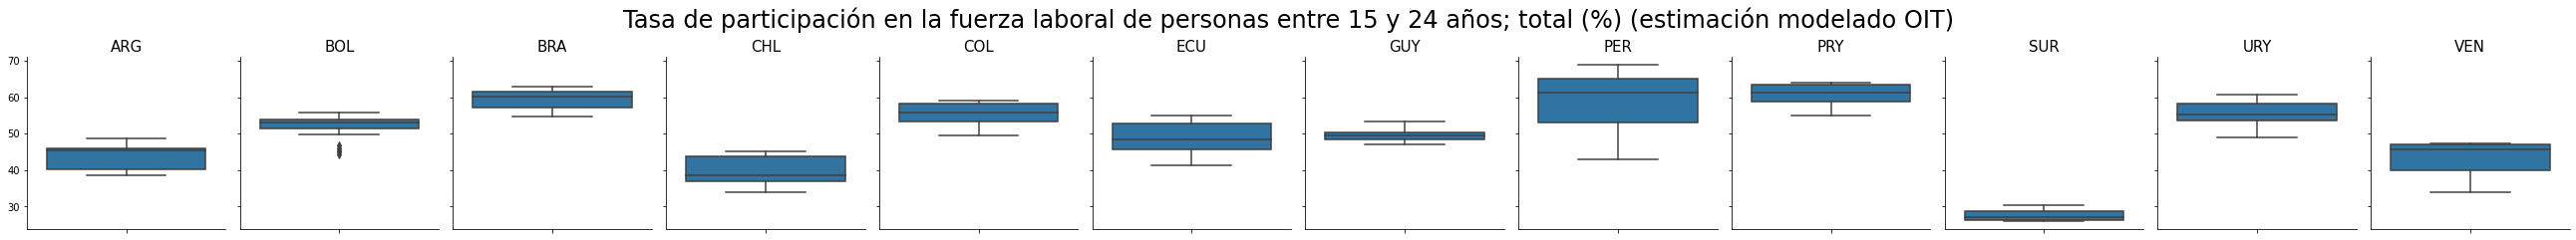

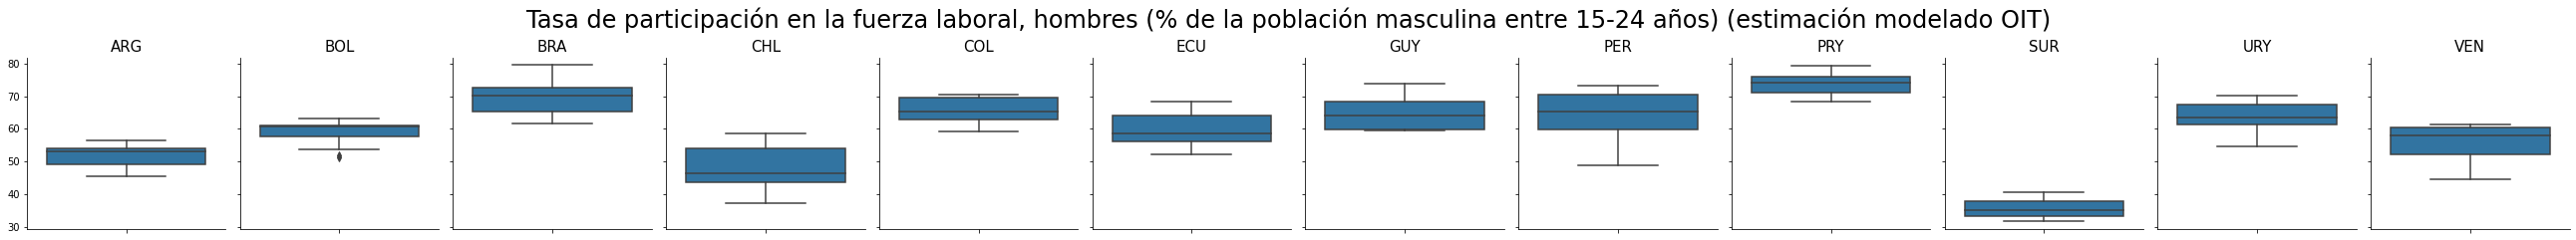

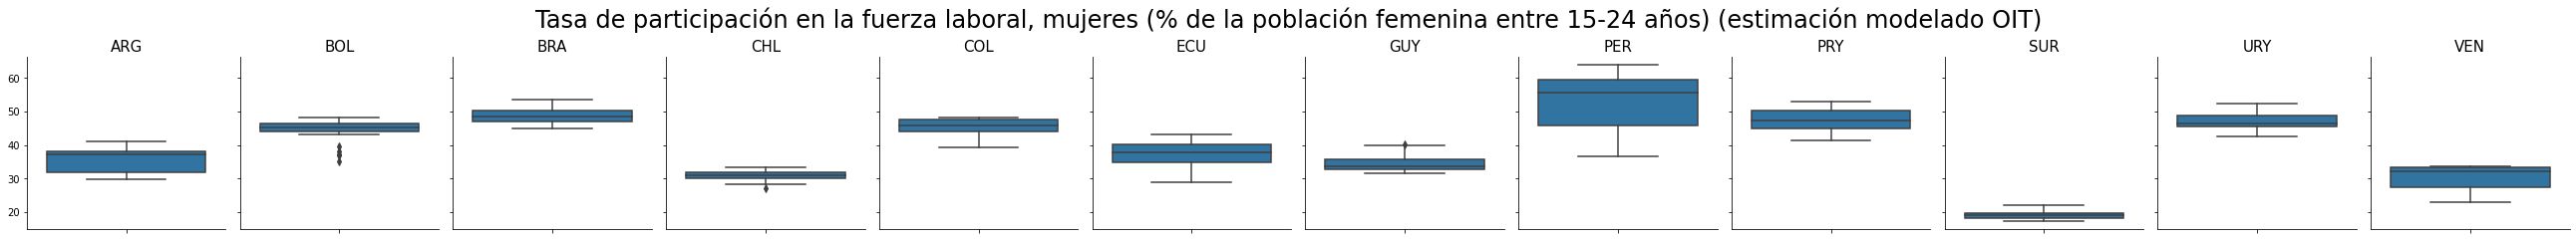

In [ ]:
plot_indi_15feat_boxplots("Social_protection")

### Gráficos de línea

Para gran parte de los features de todos los indicadores, pueden destacarse ciertos patrones que se repiten en todos los países estudiados: 

*   Tendencias descendentes a lo largo de los años (por ejemplo, la tasa de mortalidad en mujeres adultas)
*   Tendencias ascendentes a lo largo de los años (por ejemplo, la tasa de fertilidad, la inscripción preescolar, o la tasa de participación en la fuerza laboral por partes de mujeres.
*   Comportamientos más o menos constantes a lo largo de los años (por ejemplo, % de alumnas mujeres en educación primaria).

Además, encontramos features con comportamientos caóticos a través de los años y variable entre los países estudiados (por ejemplo, Rentas totales de los recursos naturales en % de PIB, o desempleo total).

También detectamos ciertos "picos" o "valles" para los valores de distintos features dentro de un mismo país. Es el caso de lso features del indicador Pobreza para Argentina, el cual presenta picos o valles en un intervalo temporal acotado. Esto podría indicar, por ejemplo, un evento político-económico particular que afecta a todos los features estudiados.


#### Gráficos de línea: Género

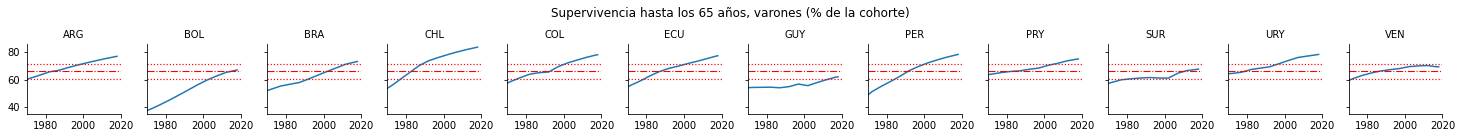

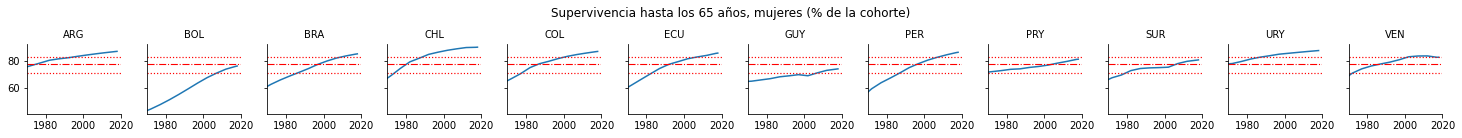

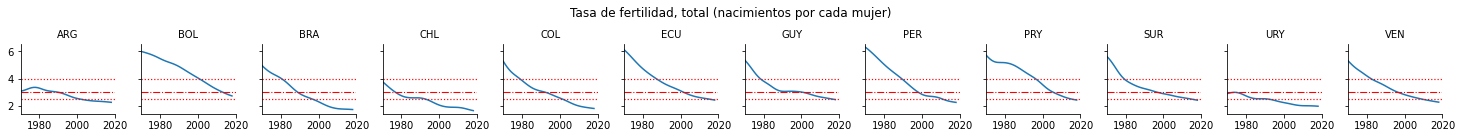

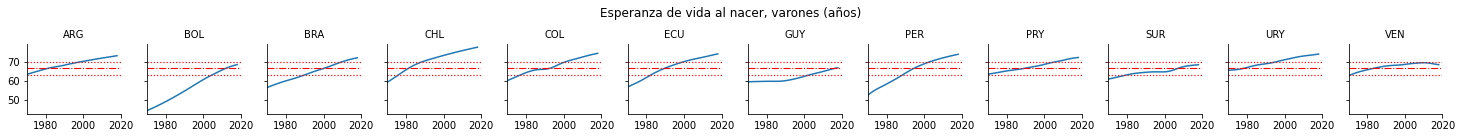

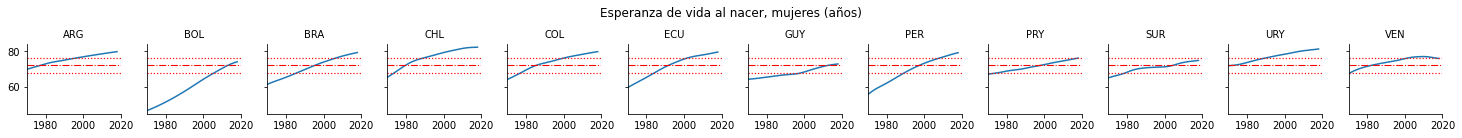

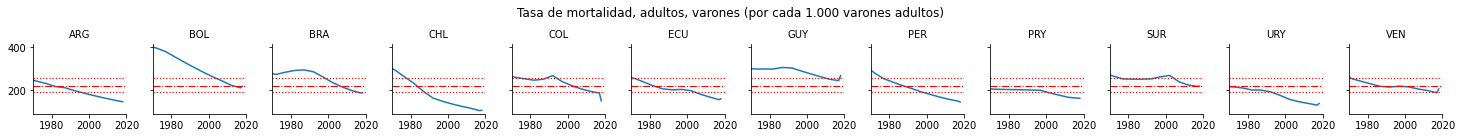

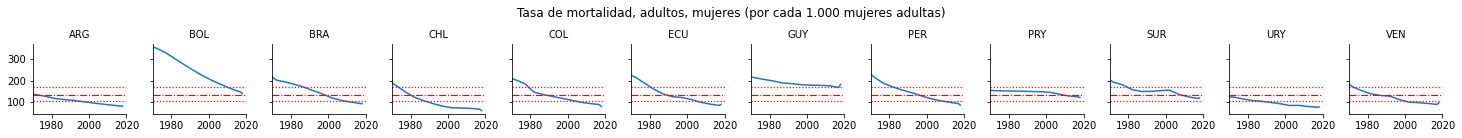

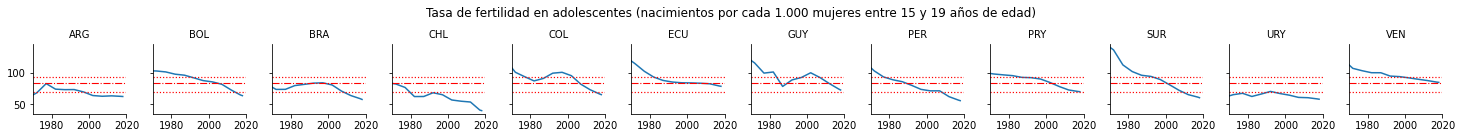

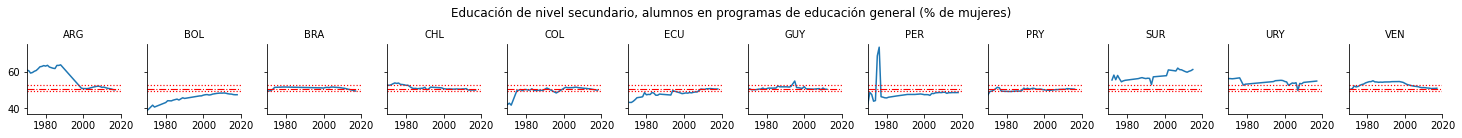

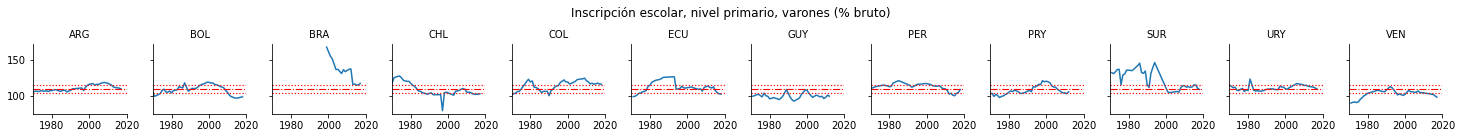

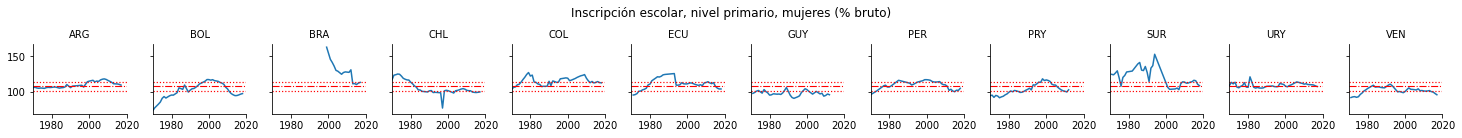

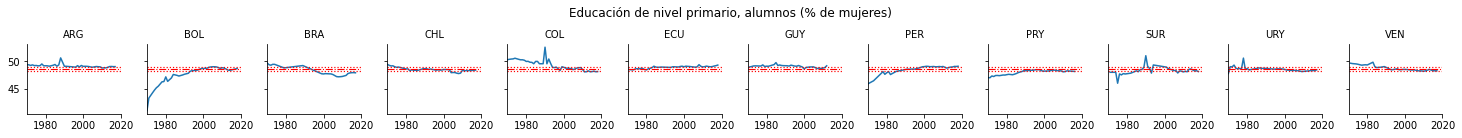

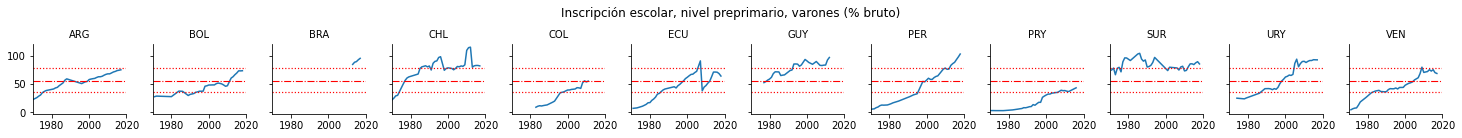

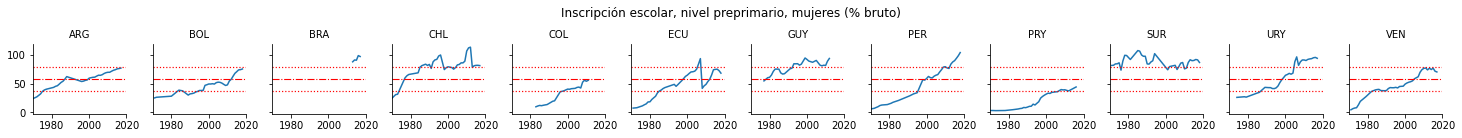

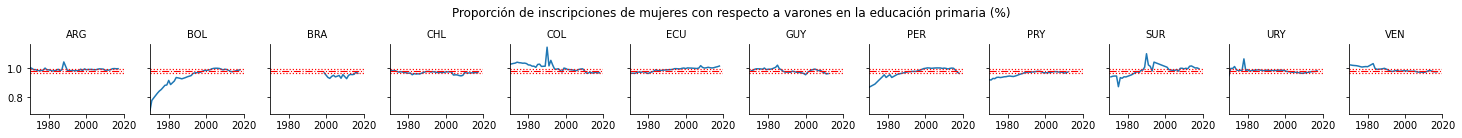

In [ ]:
plot_indi_15feat_lines("Gender")

#### Gráficos de línea: Pobreza

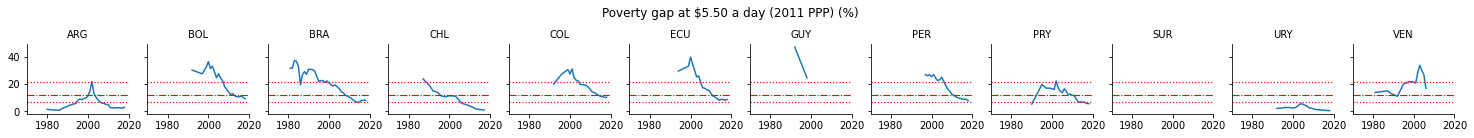

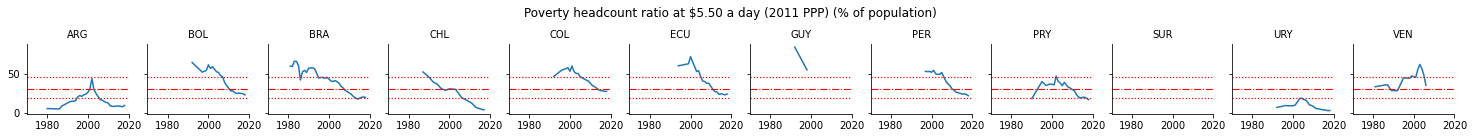

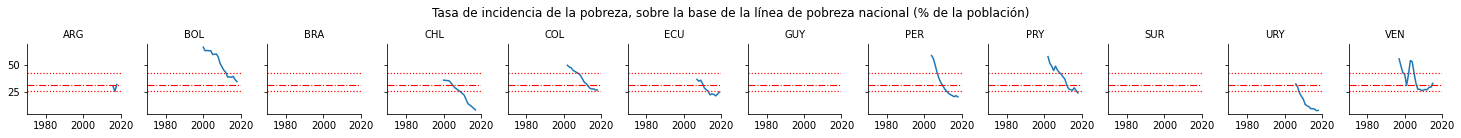

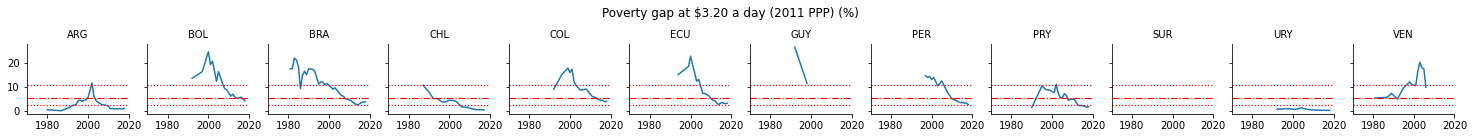

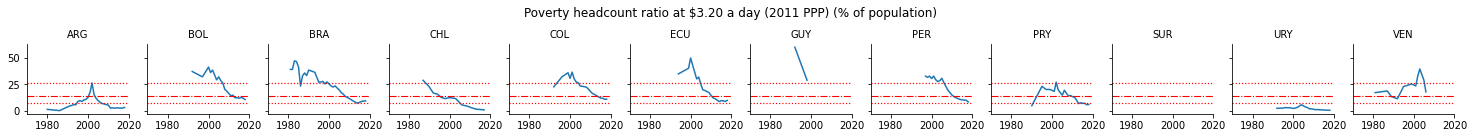

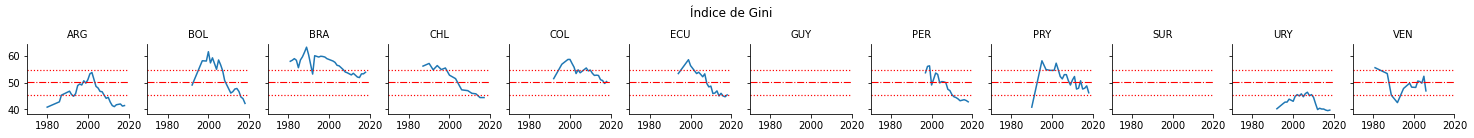

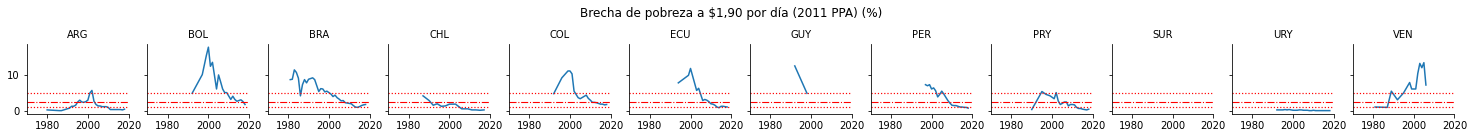

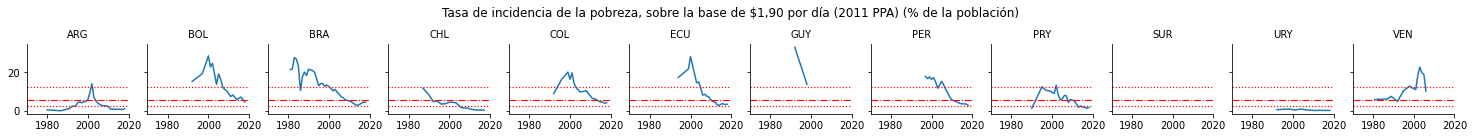

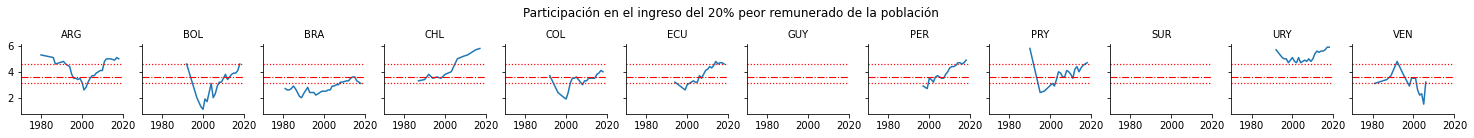

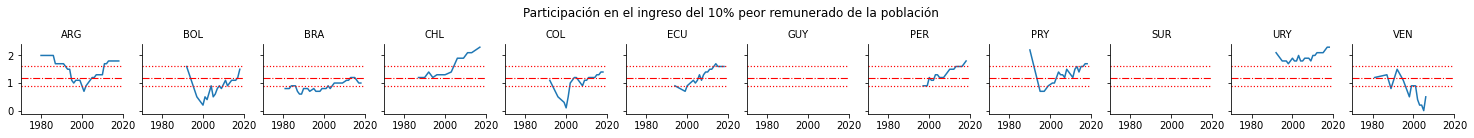

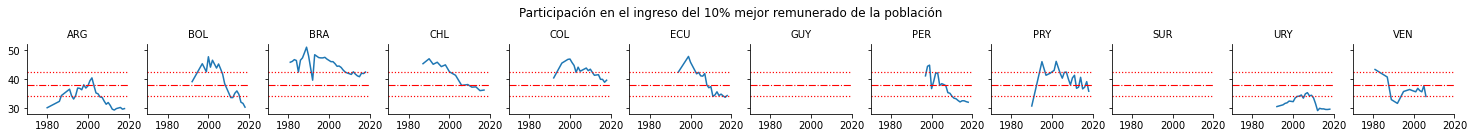

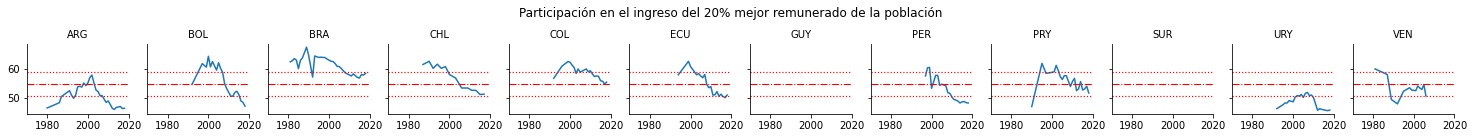

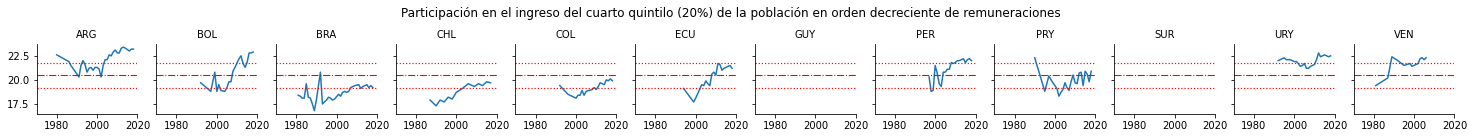

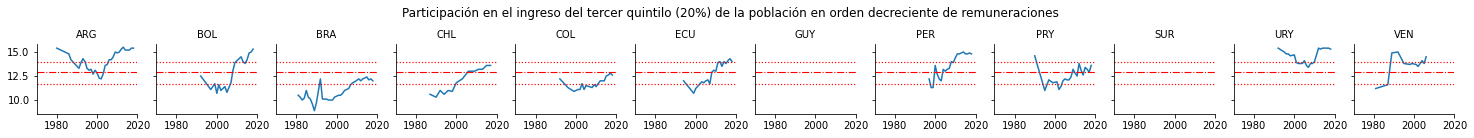

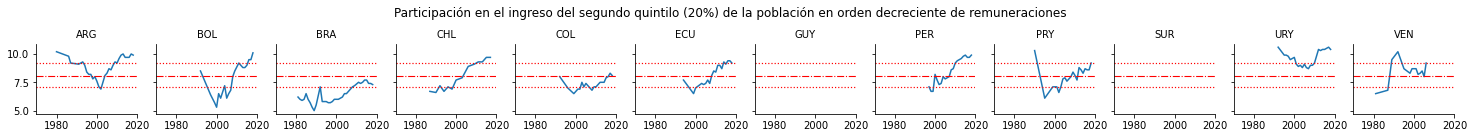

In [ ]:
plot_indi_15feat_lines("Poverty")

#### Gráficos de línea: Educación

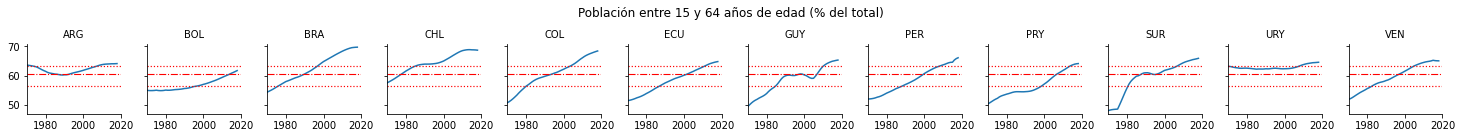

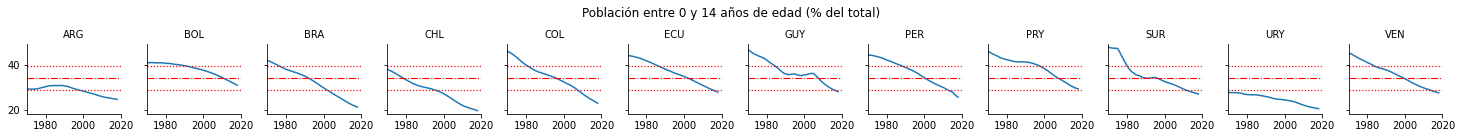

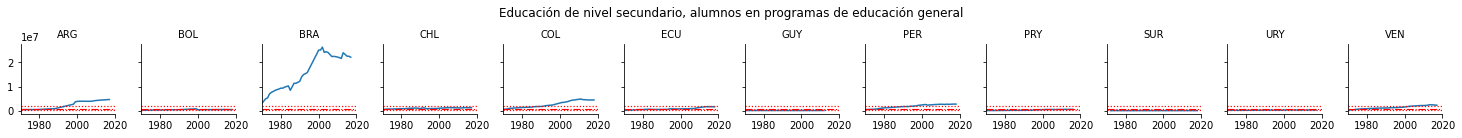

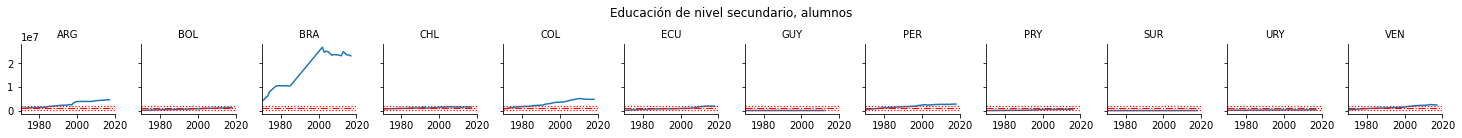

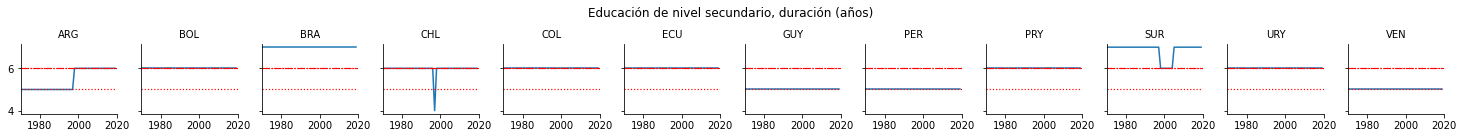

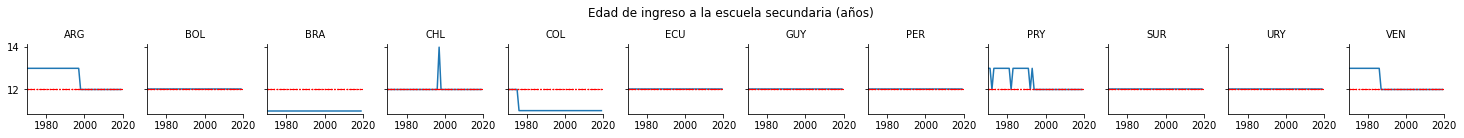

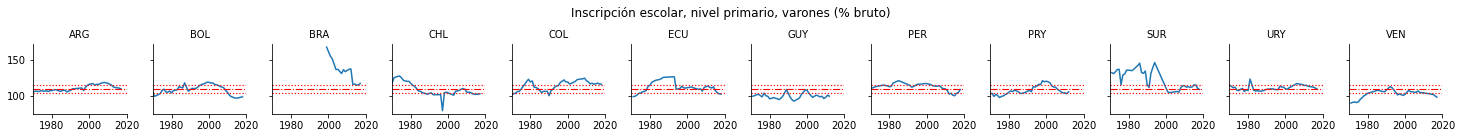

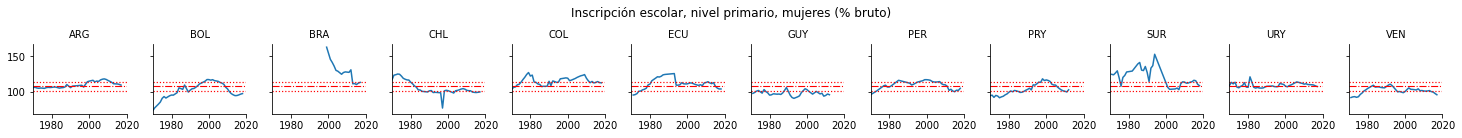

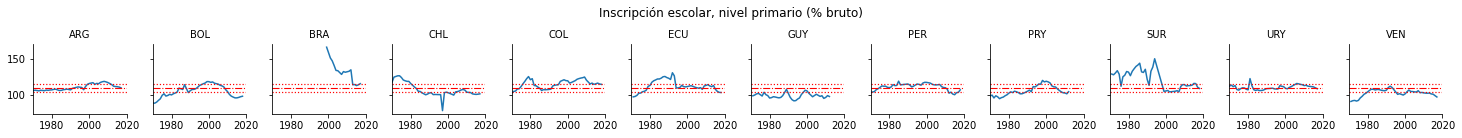

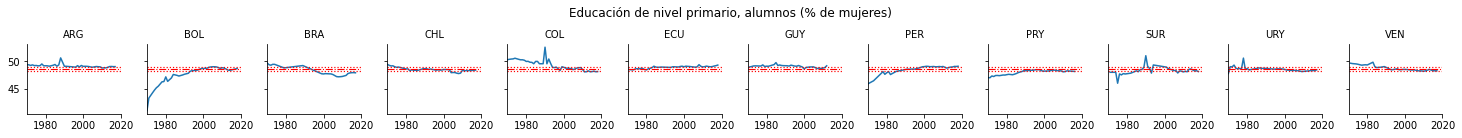

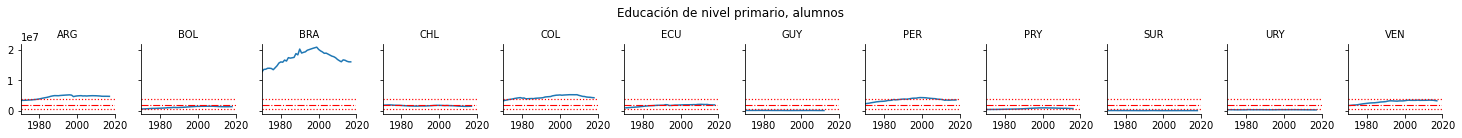

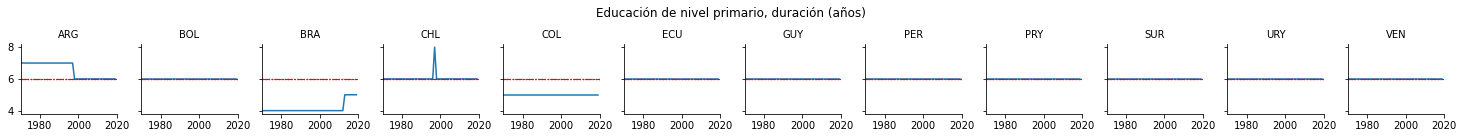

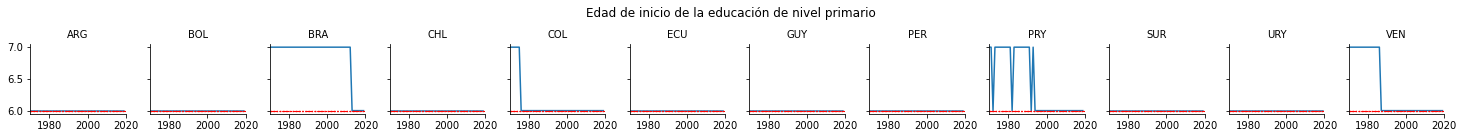

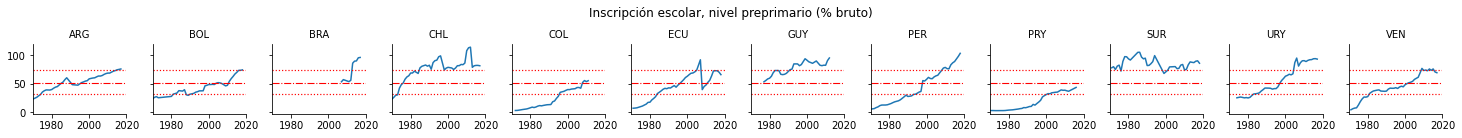

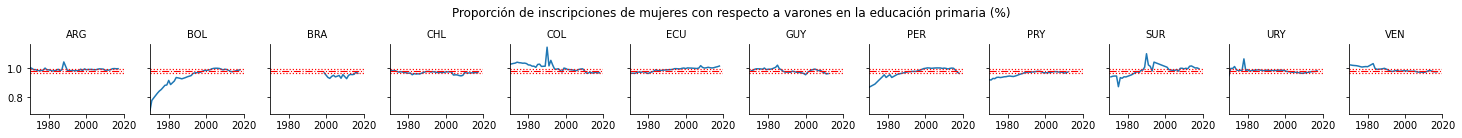

In [ ]:
plot_indi_15feat_lines("Education")

#### Gráficos de línea: Ambiente

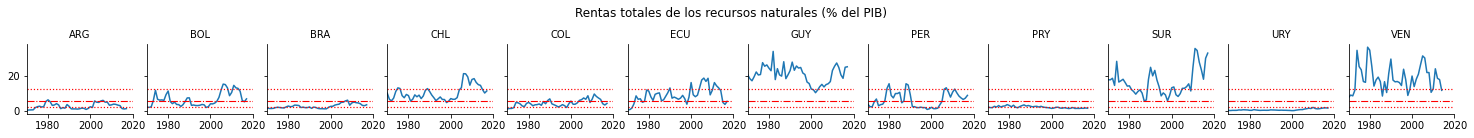

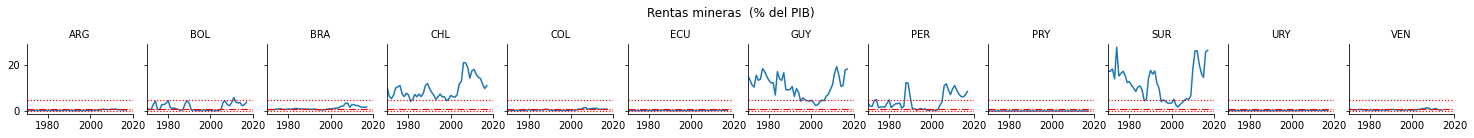

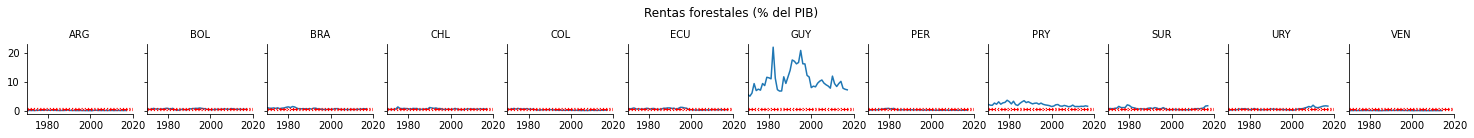

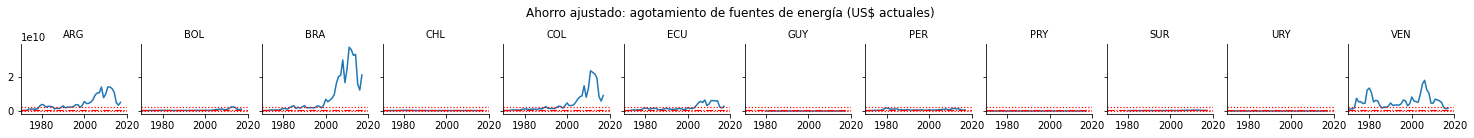

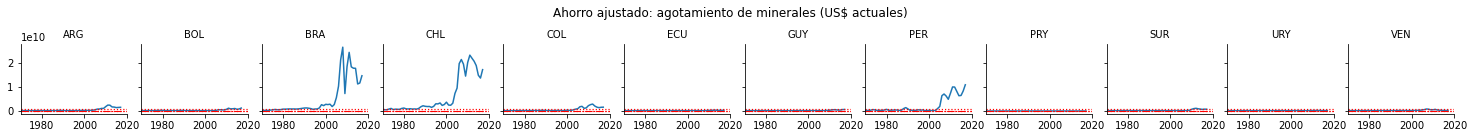

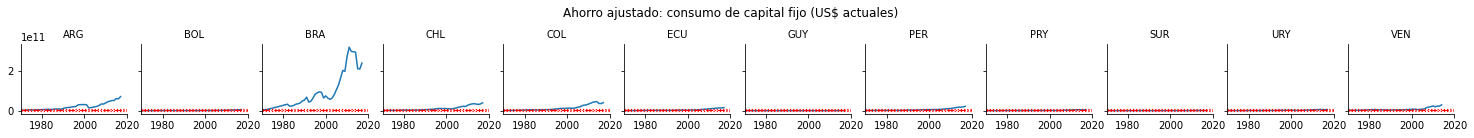

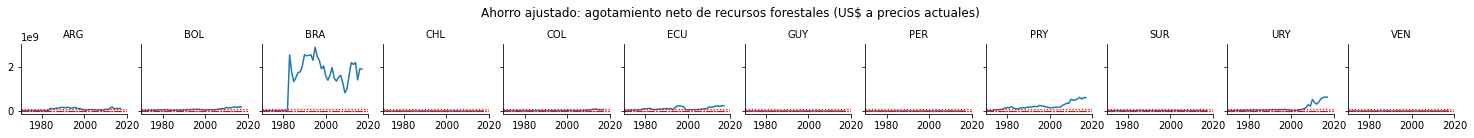

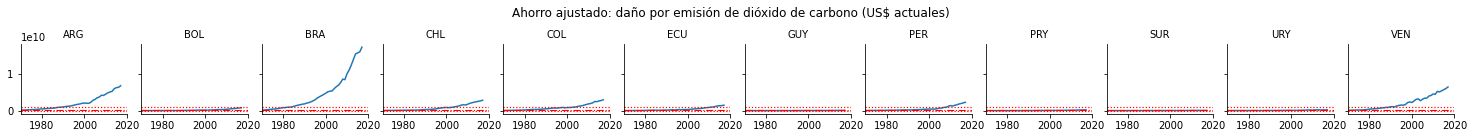

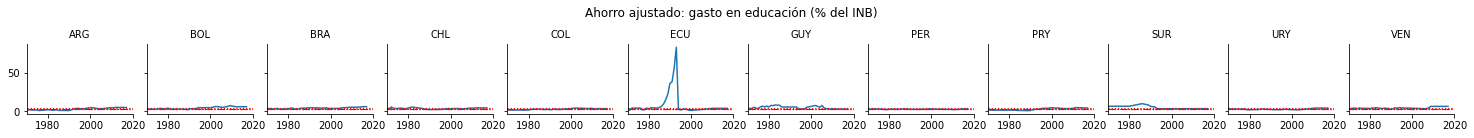

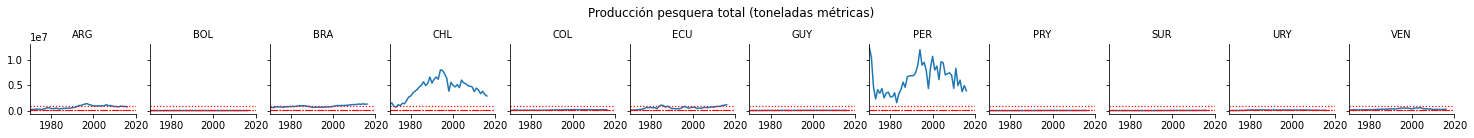

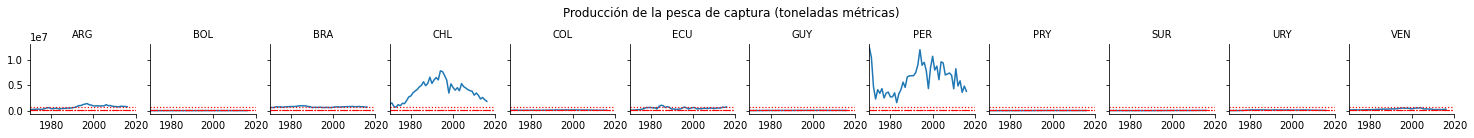

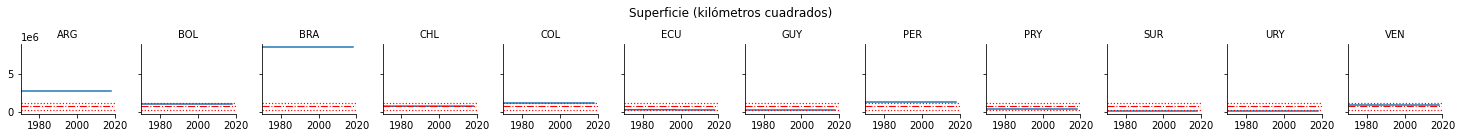

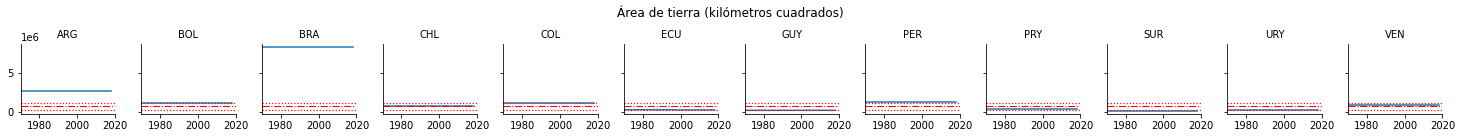

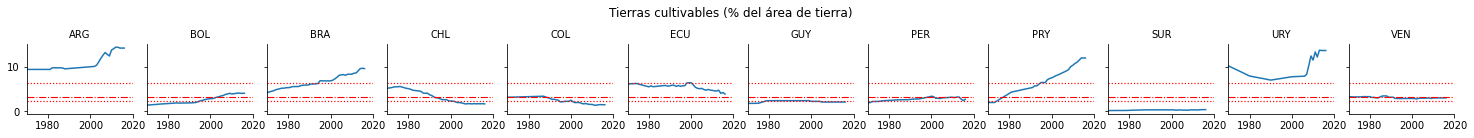

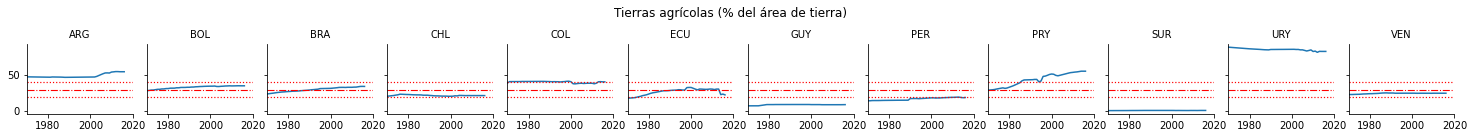

In [ ]:
plot_indi_15feat_lines("Environment")

#### Gráficos de línea: Salud

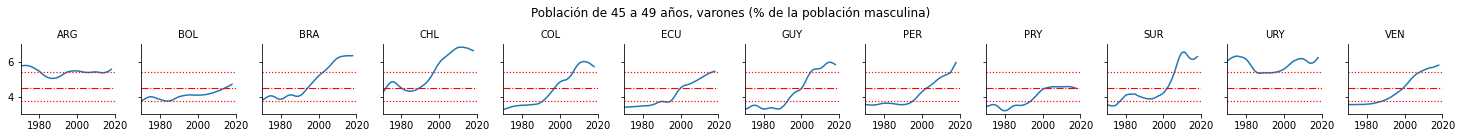

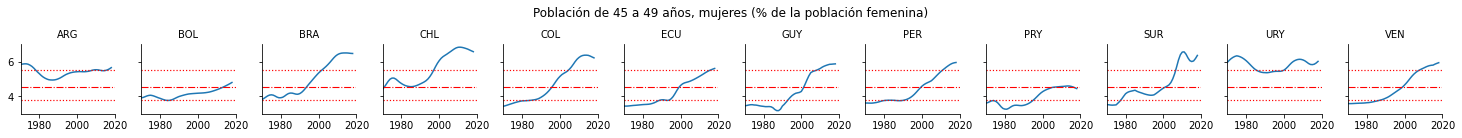

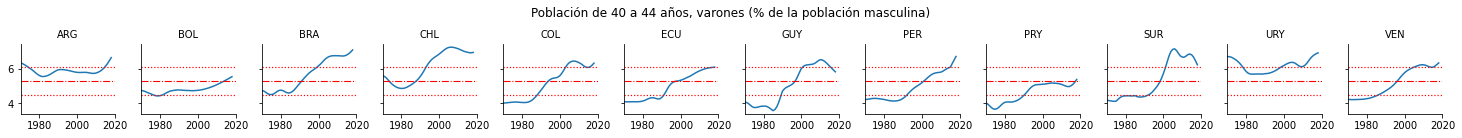

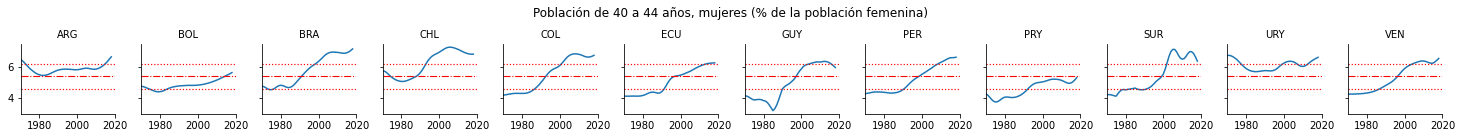

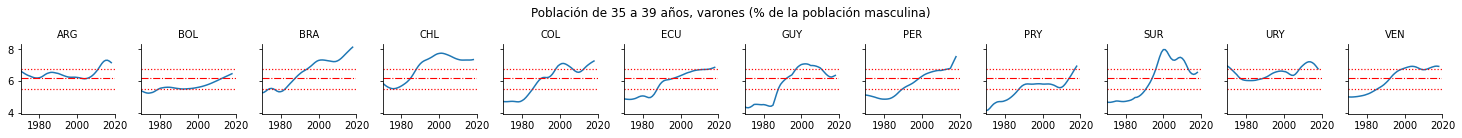

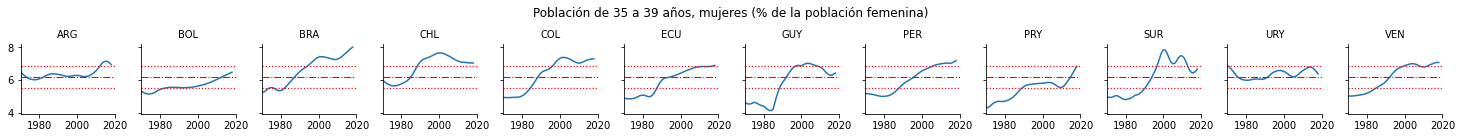

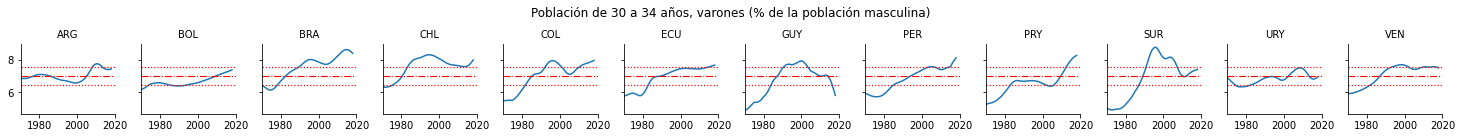

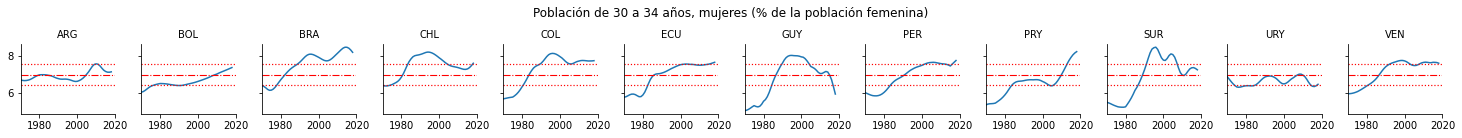

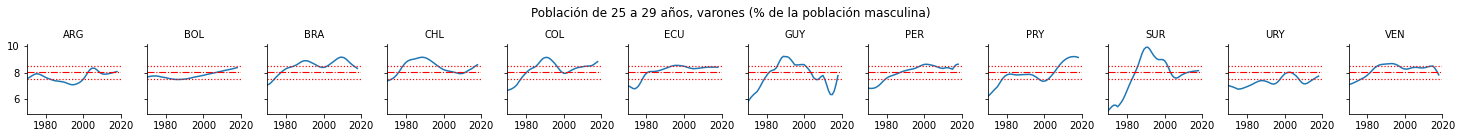

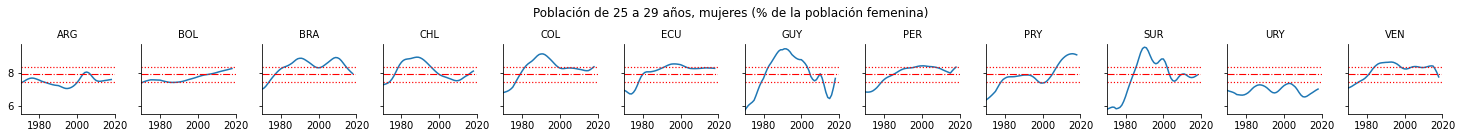

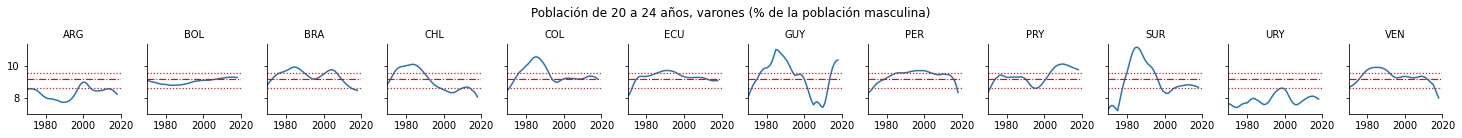

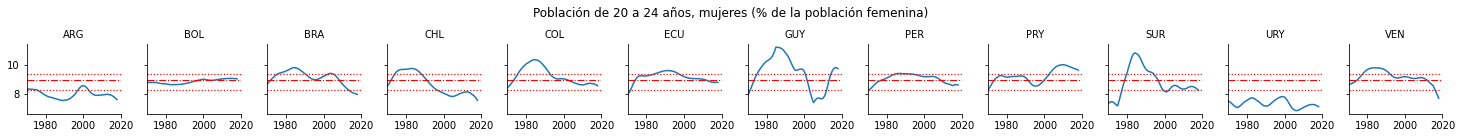

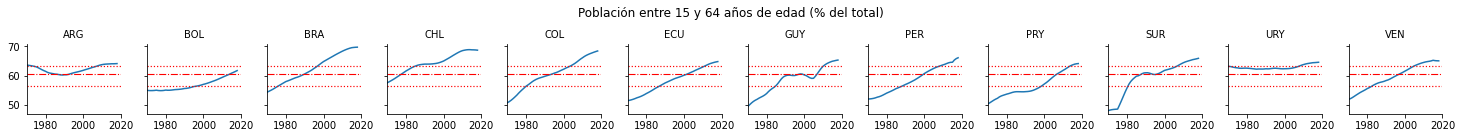

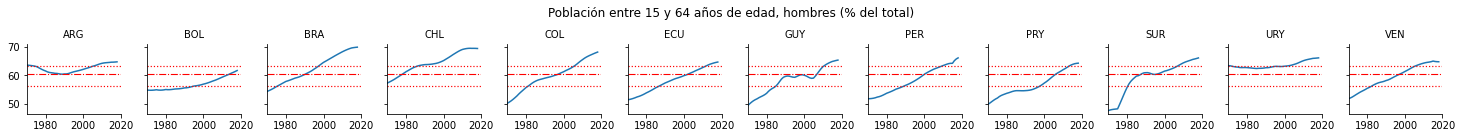

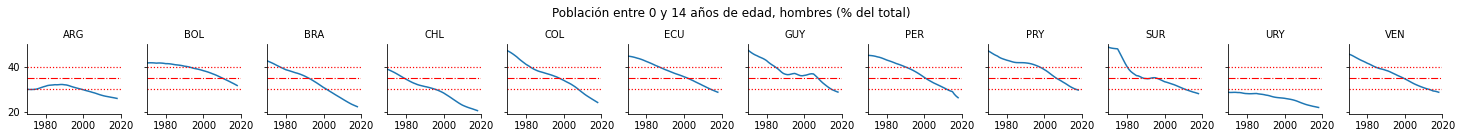

In [ ]:
plot_indi_15feat_lines("Health")

#### Gráficos de línea: Protección social

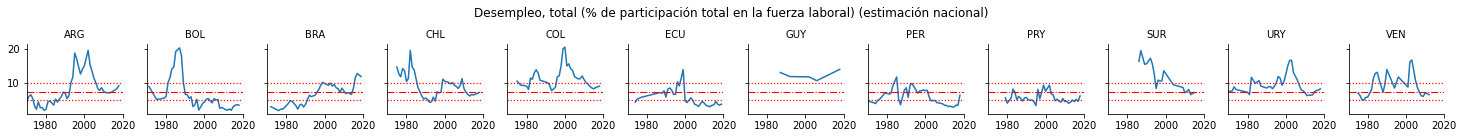

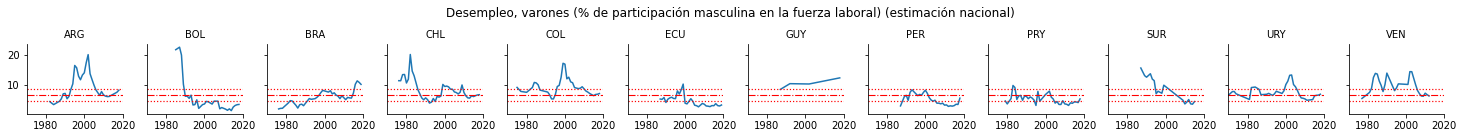

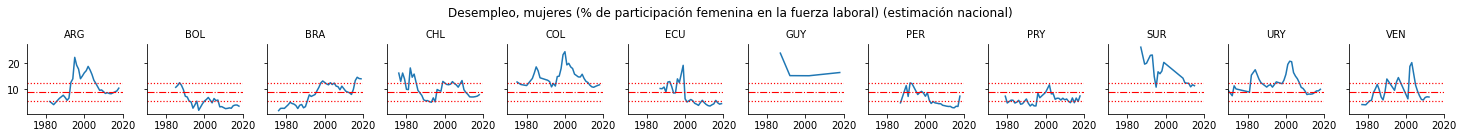

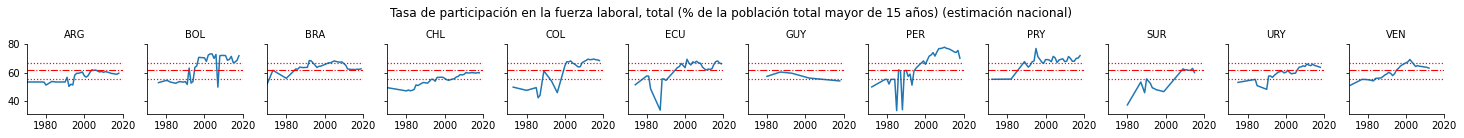

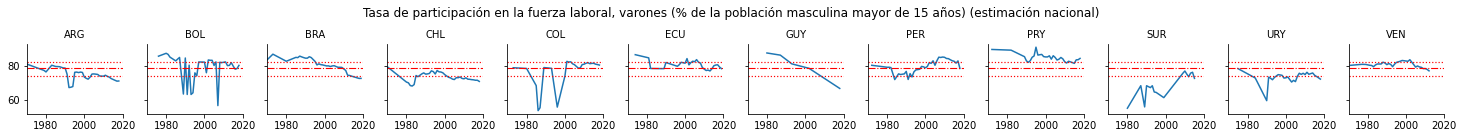

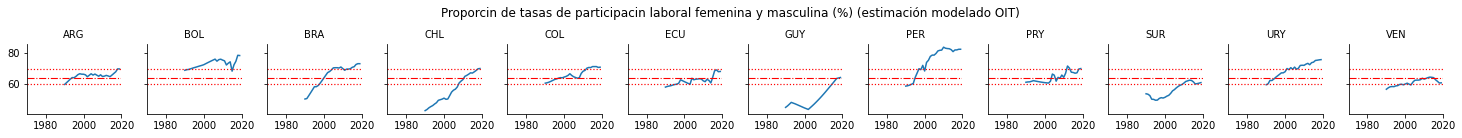

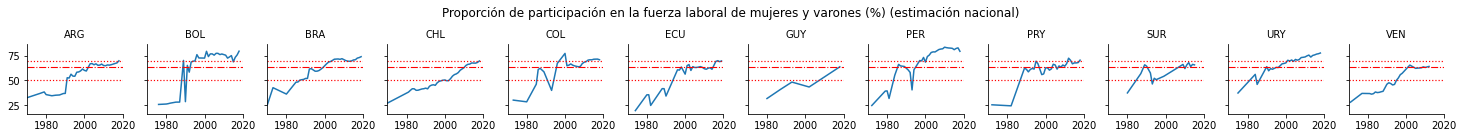

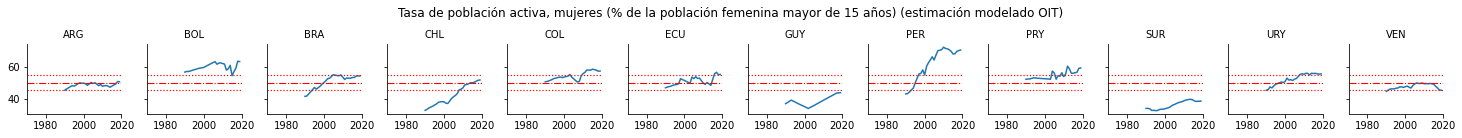

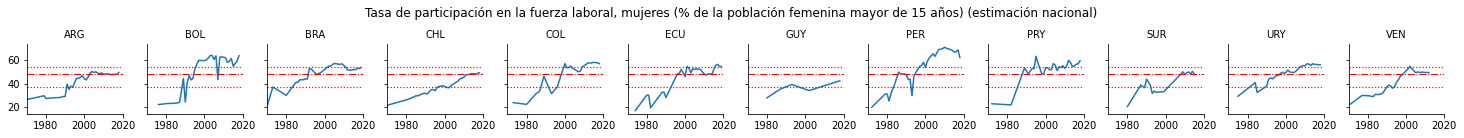

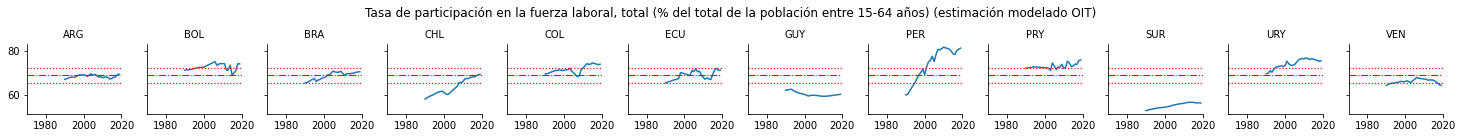

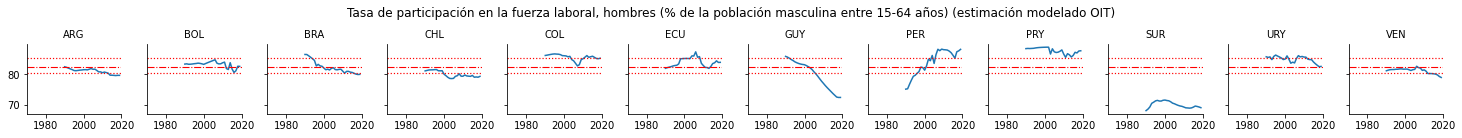

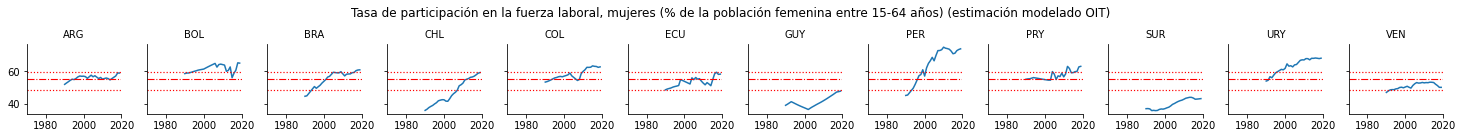

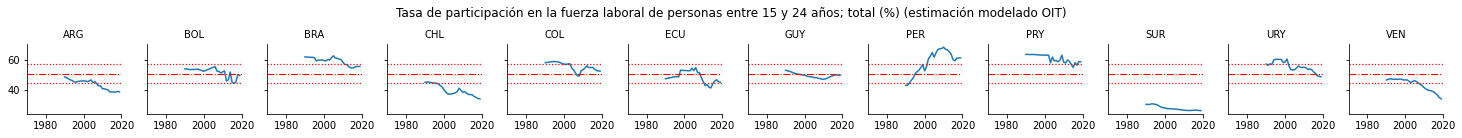

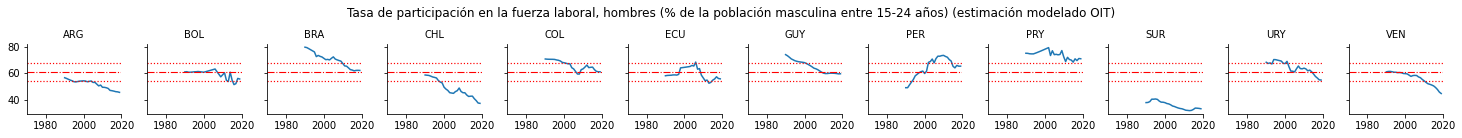

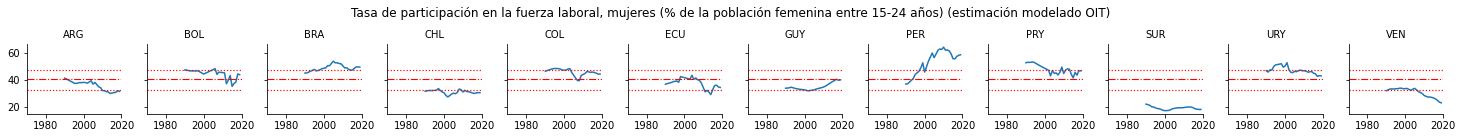

In [ ]:
plot_indi_15feat_lines("Social_protection")

## Pregunta 1.5

Elegir un Indicador de su interés y 5 features relacionados al mismo, también de su interés, y trazar la serie temporal sus valores a lo largo de los años. ¿Se observa alguna tendencia o algún patrón que se repite cada tanto?

### Respuesta

A continuación, elegimos el indicador Género y 5 features asociados que nos parecieron interesantes y que, además, en general presentan poca proporción de valores nulos.

In [ ]:
# Seleccionamos 5 Features dentro de Género, de nuestro interés
gender_5_Feats = ["Tasa de fertilidad, total (nacimientos por cada mujer)",
                  "Esperanza de vida al nacer, mujeres (años)",
                  "Tasa de mortalidad, adultos, mujeres (por cada 1.000 mujeres adultas)",
                  "Inscripción escolar, nivel primario, mujeres (% bruto)",
                  "Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)"]

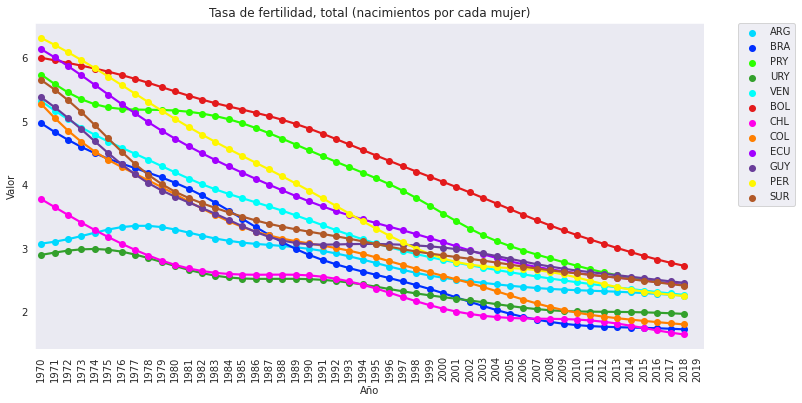

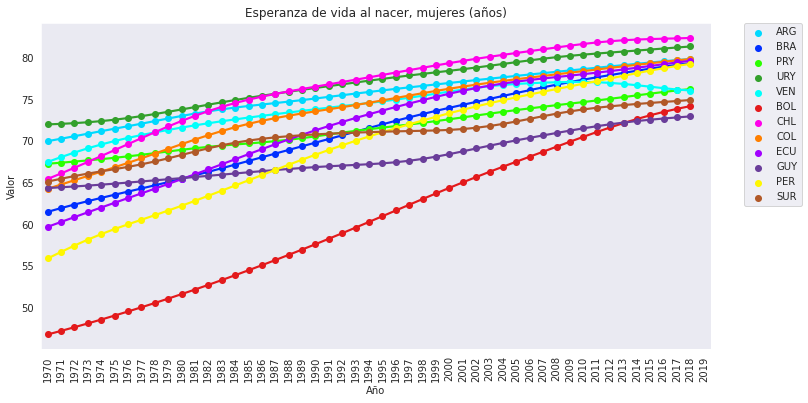

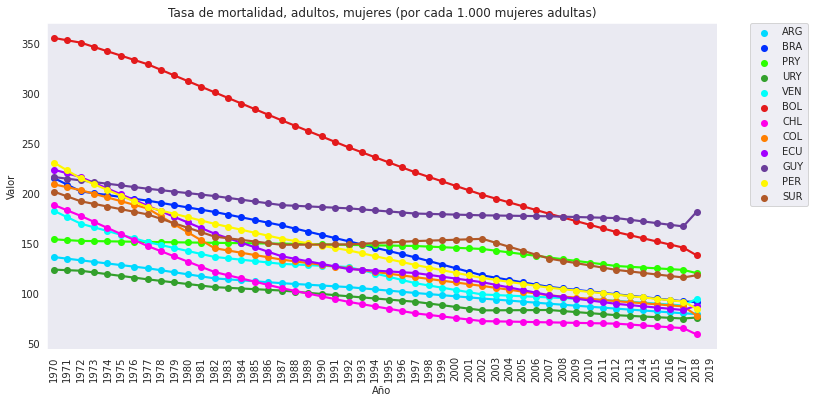

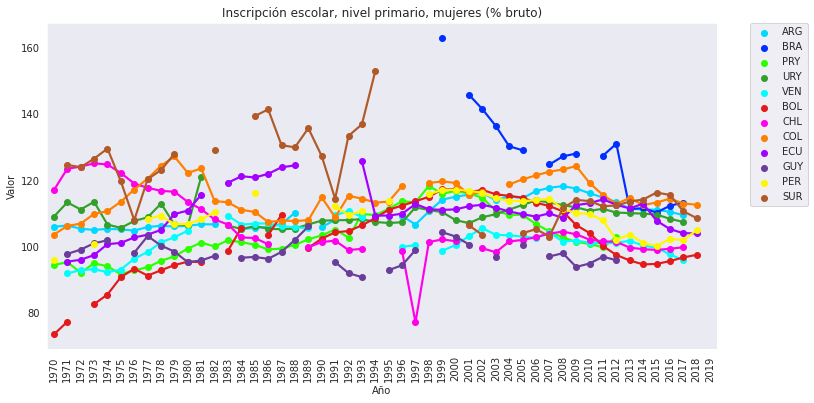

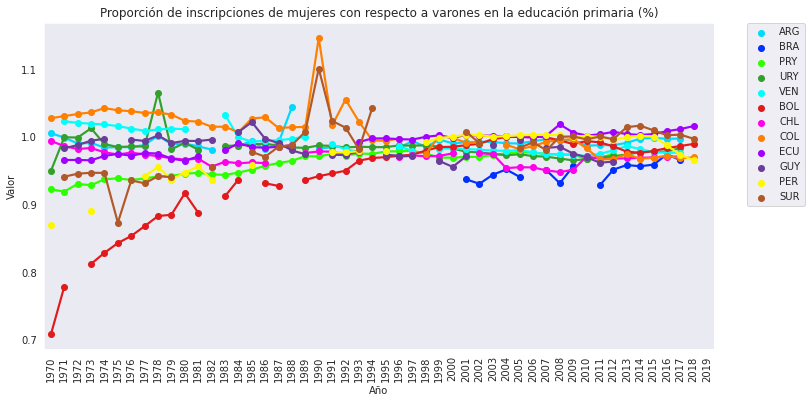

In [ ]:
color_pal = [(0, 0.850980392, 1),
 (0, 0.184313725, 1),
 (0.168627451, 1, 0),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0, 1, 0.984313725),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (1, 0, 0.917647059),
 (1.0, 0.4980392156862745, 0.0),
 (0.635294118, 0, 1),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 0.968627451, 0),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

sns.set_style('dark')

for ii in gender_5_Feats:
  figsize=(12,6)
  plt.figure(figsize=figsize)
  plt.title(ii)
  sns.pointplot(data=df_15_feat_melt[df_15_feat_melt['Feat'] == ii], x='Year', y='Value', hue='CCod',  ci=None, palette=color_pal, scale = 0.8)
  plt.xticks(rotation = 90)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel("Año")
  plt.ylabel("Valor")  

sns.set_style(None)

A continuación describimos el comportamiento de las curvas  a través de los años para los features elegidos:
1.   **"Tasa de fertilidad total (nacimientos por cada mujer):"** se observa una tendencia descendente para todos los países. También se observa una tendencia a la homogeneización de los valores entre países a medida que nos acercamos al presente.
2.   **"Esperanza de vida al nacer, mujeres (años)":** se observa una tendencia creciente para todos los países. Particuarmente, el caso de Bolivia llama la atención, ya que se observa un crecimiento más abrupto que para el resto de los países. 
3.   **"Tasa de mortalidad, adultos, mujeres (por cada 1.000 mujeres adultas):"** se observa una tendencia descendente para todos los países. Nuevamente, llama la atención el caso de Bolivia, que presenta una caída más abrupta que el resto de los países.
4.   **"Inscripción escolar, nivel primario, mujeres (% bruto):"** no se observan patrones o tendencias claras.
5.   **"Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%):"** se observa una leve homogeneización de los valores entre países a medida que nos acercamos al presente. Bolivia, nuevamente, presenta un crecimiento más abrupto en los primeros años. También llama la atención el pico de inscripciones en Colombia y Surinam en el año 1990.

## Pregunta 1.6

Pregunta de respuesta abierta y libre: ¿Qué herramientas estadísticas aprendidas en clase (cálculo de estadísticos, test de hipótesis, probabilidad condicional, etc.) podría ayudar en el análisis de este dataset y el objetivo planteado?

### Respuesta

Múltiples herramientas estadísticas podrían utilizarse para comenzar a analizar el dataset. A continuación detallamos ejemplos de posibles aproximaciones, de acuerdo a la pregunta de análisis particular:

*   Si se quisiera comparar en general los valores de un feature entre países, podría calcularse la media para cada país en todo el intervalo temporal. Luego, se podría hacer un test de comparación de medias entre países para ver si existen diferencias significativas entre países.
*   Si la pregunta se enfoca al análisis en la escala temporal, se podría dividir el espacio temporal en rangos discretos (por ejemplo, de a 5 o de a 10 años), obtener medias de los valores de un feature para un país para cada intervalo temporal, y realizar tests de comparación de medias entre intervalos temporales.
*   Si se diera el caso de algún feature cuya tendencia a través de los años para todos los países es más o menos lineal, podría realizarse una regresión lineal por país, y luego comparar las pendientes entre países.
*   En algunos features, se observó una tendencia a la homogeneización de los valores entre países a medida que nos acercamos al presente. Para poner a prueba esta hipótesis, podría calcularse la varianza (o el desvío estándar) para todos los países para un intervalo temporal más cercano al presente, y comparar dicho valor con el obtenido para un intervalo temporal pasado.
*   Se podrían realizar muchos cálculos de probabilidades según la pregunta de análisis. Por ejemplo, se podría calcular cuál es la probabilidad de que un dato sea nulo para un determinado feature, siendo que el país de análisis es Argentina, y comparar dicho valor de probabilidad con el calculado para otros países.
*   Para analizar distribuciones y ver si se parecen a alguna distribución conocida, podrían realizarse tests de Kolgomorov-Smirnof. La determinación del tipo de distribución será clave a la hora de definir los parámetros de modelos a correr futuros. 



## Pregunta 1.7

¿Existen similitudes y/o diferencias entre los diferentes países considerados? Justifique su respuesta utilizando los datos del análisis previo.

### Respuesta

En general, existen similitudes entre países en la tendencia observada de los valores de los features a lo largo de los años. Es interesante el patrón que se observa en alguno de ellos, en donde los valores del feature por país tienden a un valor en particular a medida que nos acercamos al presente. Existen países, como por ejemplo Bolivia, que para distintos features presentan tendencias (ascendentes o descendetes según el feature) más abruptas que para los otros países.

## Pregunta 1.8

¿Existen Features compartidos entre los diferentes Indicadores? En caso de respuesta afirmativa, los valores y la distribución es la misma para cada país? ¿Qué conclusión se podría sacar acerca de que un Feature tenga dos o más indicadores asociados?

### Respuesta
A continuación, determinaremos aquellos features que se encuadran dentro de más de un indicador.

In [ ]:
dataset_melt = pd.melt(
    dataset,
    id_vars = dataset.columns[:5],
    value_vars= dataset.columns[5:],
    var_name='Year',
    value_name='Value',
)
dataset_melt.Year = dataset_melt.Year.astype('int')

In [ ]:
for ii in dataset.Feat.unique():
    indicators = dataset[dataset.Feat == ii].Indi.unique()
    if len(indicators) > 1:
        print(ii)
        print(indicators, "\n")

Población entre 15 y 64 años de edad (% del total)
['Education' 'Health'] 

Población entre 0 y 14 años de edad (% del total)
['Education' 'Health'] 

Desempleo, total (% de la población activa total) (estimación modelado OIT)
['Education' 'Social_protection'] 

Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)
['Education' 'Gender' 'Social_protection'] 

Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)
['Education' 'Gender' 'Social_protection'] 

Población activa, total
['Education' 'Social_protection'] 

Población activa, mujeres (% de la población activa total)
['Education' 'Gender' 'Social_protection'] 

Inscripción escolar, nivel terciario, varones (% bruto)
['Education' 'Gender'] 

Inscripción escolar, nivel terciario, mujeres (% bruto)
['Education' 'Gender'] 

Educación de nivel secundario, maestros (% de mujeres)
['Education' 'Gender'] 

Transición a la escuela secundaria, varones (%)
['Education' 'Gender'] 

Trans

Se observa que existen numerosos Features que se encuentran incluidos en 2 Indicadores. Esto indica que estos features reflejan realidades que pueden encajar dentro de varios indicadores. A continuación, determinamos si los Feaures de distintos indicadores poseen los mismos valores o no.

Dado que es esperable que el mismo Feature tenga los mismas valores en distintos indicadores, programamos un loop para verificar que todos los pares de Features poseen los mismos valores sin importar a que indicador pertenezcan:

In [ ]:
bool_arr = np.array([], dtype=bool)
for ii in dataset.Feat.unique():
    indicators = dataset[dataset.Feat == ii].Indi.unique()
    if len(indicators) == 2:
      ser1 = dataset_melt[(dataset_melt.Feat == ii) & (dataset_melt.Indi == indicators[0])].Value
      ser2 = dataset_melt[(dataset_melt.Feat == ii) & (dataset_melt.Indi == indicators[1])].Value
      bool_arr = np.append(bool_arr, tuple(ser1.dropna()) == tuple(ser2.dropna()))
      # Se eliminan los NA en ambas tuplas ya que no permiten hacer una comparación váldia

print("¿Todos los pares de Features compartidos por dos Indicadores poseen los mismos valores?", 
      "\n", bool_arr.all())
        

¿Todos los pares de Features compartidos por dos Indicadores poseen los mismos valores? 
 True


Se observa que de los Features incluidos en más de un Indicador, como esperábamos, estos poseen los mismos valores para cada Indicador.

# PARTE 2

## Pregunta 2.1

¿Qué pueden decir acerca de los valores nulos y no nulos presentes en aquellos Features relacionados con el rol de la mujer y con grupos históricamente marginados? ¿De qué manera cree que el contexto social se refleja en los valores del dataset?

### Respuesta

Podemos tomar al indicador de Pobreza como aquel que contiene features referidos a grupos históricamente marginados. Para este caso, se puede observar una ausencia importante datos a lo largo de los años (ver respuesta a la pregunta 1.2). Además, solo presentan 15 features, un número bastante menor en comparación con el resto de los indicadores.

A continuación, graficamos mapas de calor para el indicador de Género, distinguiendo entre features referidos a mujeres y features referidos a hombres. Esto lo realizamos filtrando a los features por el código del mismo, el cual contiene el string "FE" cuando es referido a mujeres, y "MA" cuando es referido a hombres.

Las celdas azules indican años en los que el feature en cuestión no tiene valores nulos, mientras que las celdas rojas indican años en los que el feature en cuestión tiene todos valores nulos; colores intermedios indican proporciones intermedias de valores nulos para ese año, para el feature en cuestión.

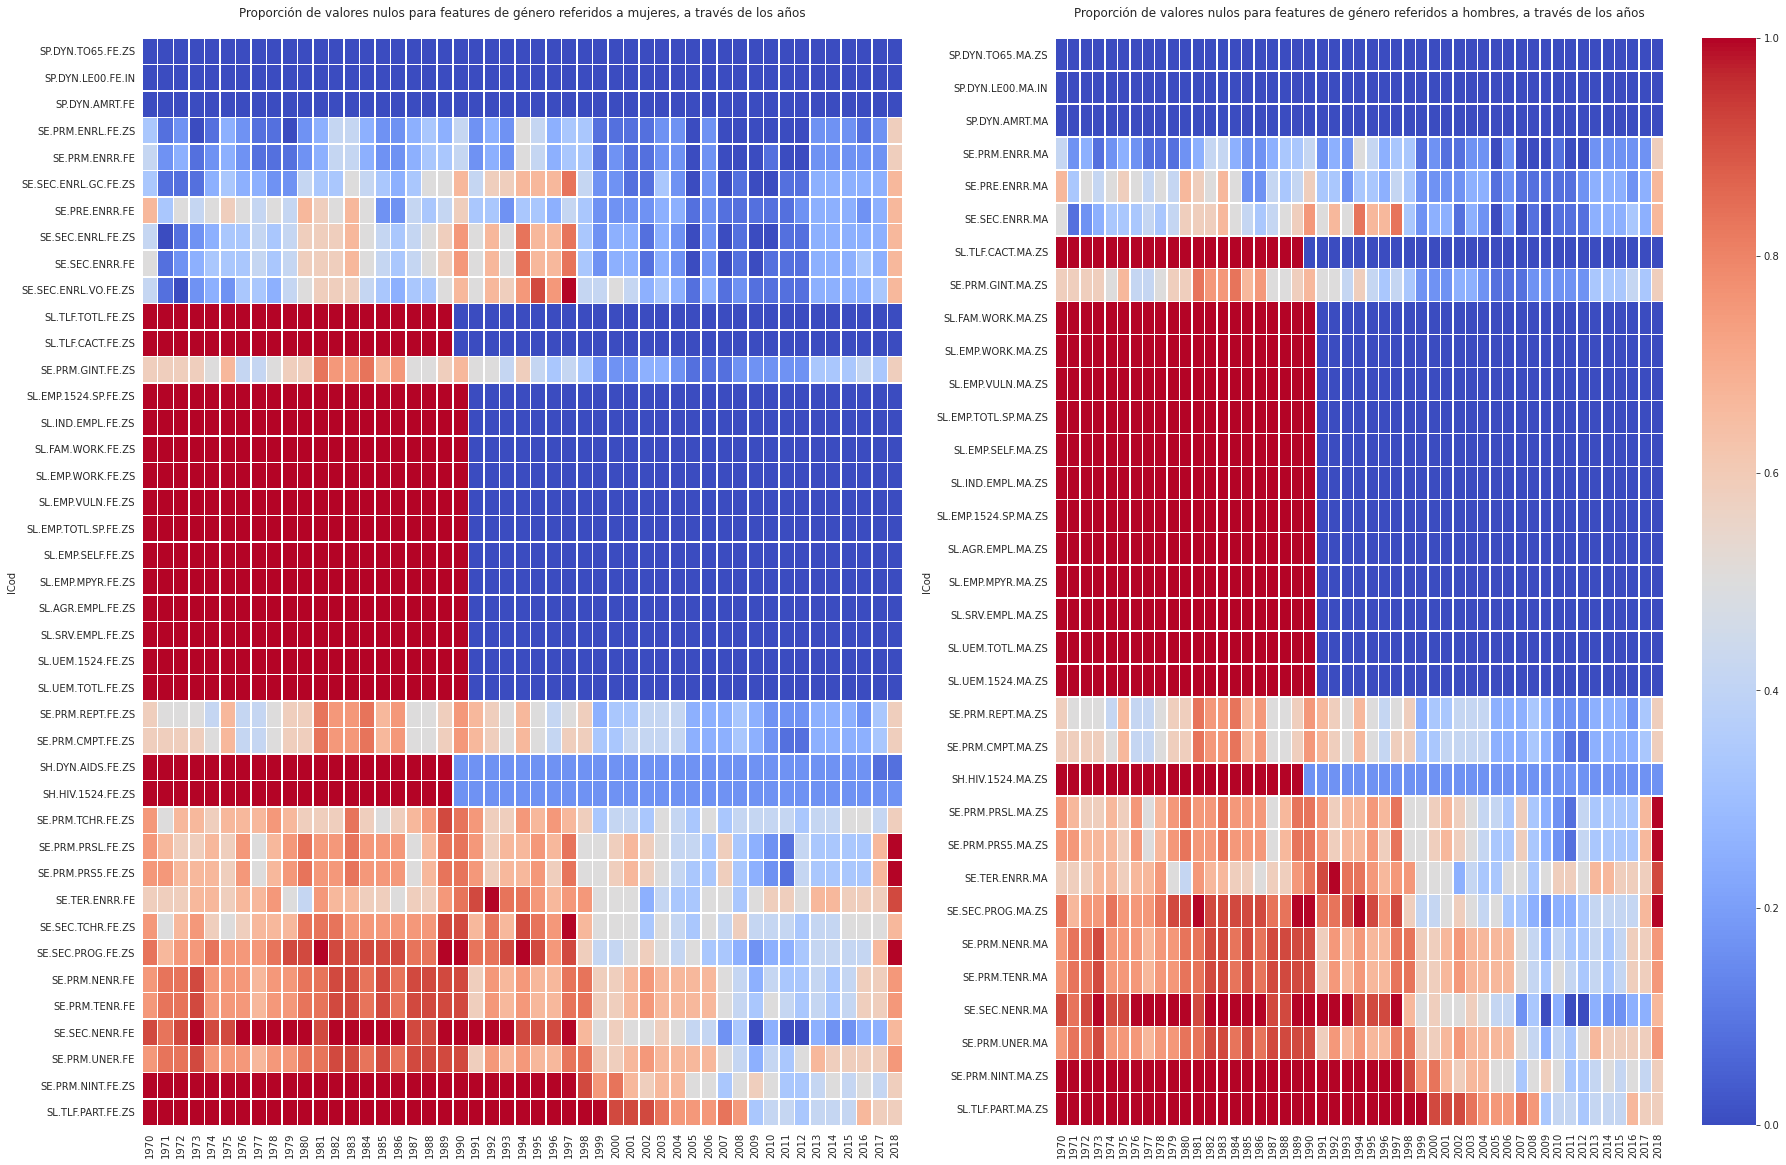

In [ ]:
df_ic_sort.index = df_ic_sort['ICod']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30,20))

sns.heatmap(data=df_ic_sort[(df_ic_sort.Indi == 'Gender') & (df_ic_sort.ICod.str.contains('FE'))].iloc[:,2:(len(df_ic_sort.columns)-1)], 
            vmin=0, vmax=1, cmap="coolwarm", linewidths=.5, cbar=False, ax = ax1)
ax1.title.set_text('Proporción de valores nulos para features de género referidos a mujeres, a través de los años\n')
sns.heatmap(data=df_ic_sort[(df_ic_sort.Indi == 'Gender') & (df_ic_sort.ICod.str.contains('MA'))].iloc[:,2:(len(df_ic_sort.columns)-1)], 
            vmin=0, vmax=1, cmap="coolwarm", linewidths=.5, ax = ax2)
ax2.title.set_text('Proporción de valores nulos para features de género referidos a hombres, a través de los años\n')


Si comparamos los mapas de calor que contienen los features referidos a mujeres con los features referidos a hombres, visualmente no se observan diferencias. Es decir, los features referidos a mujeres poseen tantos datos faltantes como los referidos a hombres.

Por otro lado, el contexto social claramente influye en los valores de los features. A modo de ejemplo, tomamos 2 features particulares y analizamos la tendencia a lo largo de los años considerando sólo a Argentina (cuya historia conocemos con más detalle que otros países). Analizaremos los features "Participación en el ingreso del 20% peor remunerado de la población" y "Participación en el ingreso del 20% mejor remunerado de la población".

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

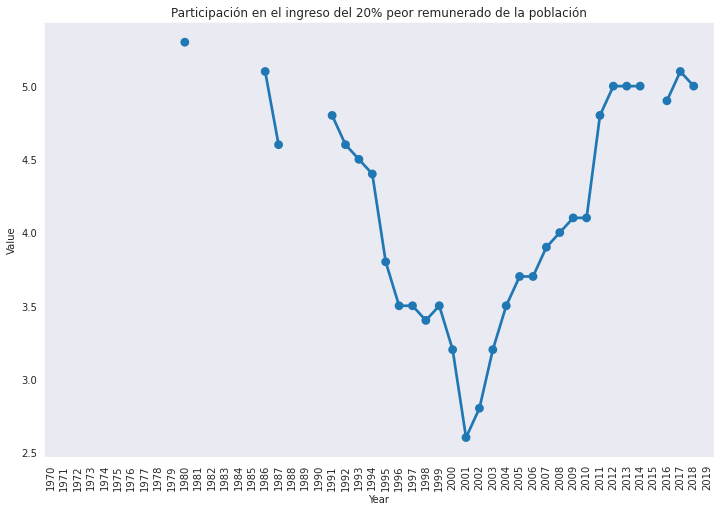

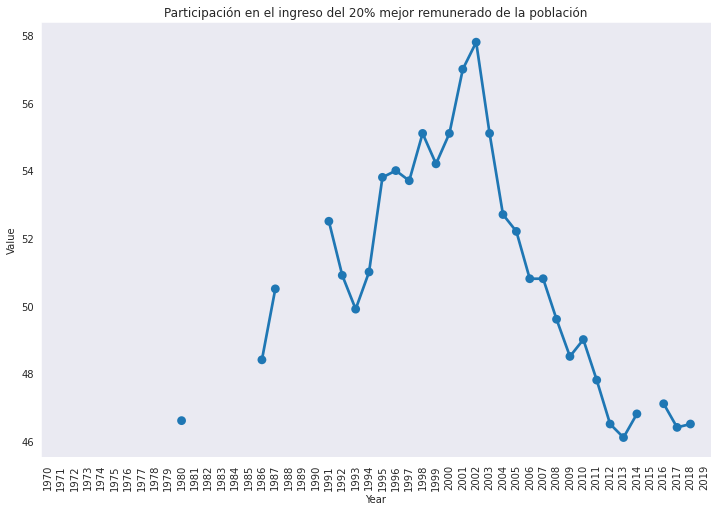

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Participación en el ingreso del 20% peor remunerado de la población")
sns.pointplot(x = "Year", y = "Value", data = dataset_melt[(dataset_melt.Feat == "Participación en el ingreso del 20% peor remunerado de la población") & 
                                                           (dataset_melt.CCod == "ARG")])
plt.xticks(rotation = 90)

plt.figure(figsize=(12, 8))
plt.title("Participación en el ingreso del 20% mejor remunerado de la población")
sns.pointplot(x = "Year", y = "Value", data = dataset_melt[(dataset_melt.Feat == "Participación en el ingreso del 20% mejor remunerado de la población") & 
                                                           (dataset_melt.CCod == "ARG")])
plt.xticks(rotation = 90)

Se observan patrones interesantes para ambos Features. En el caso de "Participación en el ingreso del 20% peor remunerado de la población", se observa una tendencia descendente hasta el año 2001 a partir del cual los valores comienzan a subir. Lo inverso se observa para el feature "Participación en el ingreso del 20% mejor remunerado de la población". Una hipótesis a poner a prueba sería que el contexto político-económico del país puede explicar estos patrones. Por ejemplo, políticas públicas que tienden a la concentración de la riqueza durante la decada del 90 (con su pico en el año 2001), y políticas públicas que tienden a la desconcentración de la riqueza luego de la crisis del 2001.

## Pregunta 2.2

¿Qué conclusiones a nivel social puede sacar de todo lo analizado hasta el momento? ¿Qué considera que sería interesante seguir indagando o explorando?

### Respuesta

A continuación, podemos destacar algunos patrones encontrados y su posible correlación con condiciones sociales/políticas/económicas: 

*   Para algunos features, se observaron tendencias ascendentes o descendentes a lo largo del tiempo en todos los países estudiados. Esto nos puede indicar que las condiciones sociales/políticas/económicas de los países fueron similares en la escala temporal para todos los países. Este comportamiento se observa, por ejemplo, para la tasa de mortalidad de mujeres adultas, en donde la tendencia es descendente para todos los países.

*   También se observa que para algunos features de un mismo país existen rangos temporales acotados en donde se observan "picos" o "valles". Esto puede indicar eventos sociales/políticos/económicos de relevancia para dicho país, que afectan a los valores de los features en cuestión. Es el caso, por ejemplo, de muchos features del indicador de Pobreza para Argentina.

*   Se puede observar también que, para algunos features, a principio de la serie temporal los países presentan valores más dispersos entre si. Sin embargo, conforme pasan los años los valores de los features para los distintos países tienden a tener a homogeneizarse. A modo de hipótesis, podemos decir que el contexto social/político/económico de los distintos países se fue homogeneizando a lo largo de los años, y esto se refleja en la similitud de los valores de los features en los años más cercanos al presente.

Luego del análisis gráfico y exploratorio de los features en general, nos gustaría pasar a una etapa exploratoria más analítica. Por ejemplo, se podrían calcular algunas medidas de posición como la media o el desvío estándar, y realizar tests de comparación entre países o entre intervalos temporales relevantes. También sería interesante calcular correlaciones entre features de un mismo indicador, o de distintos indicadores, a lo largo de los años.

# Conclusiones

A continuación, se resumen las principales conclusiones obtenidas durante el práctico:

*  Existen numerosos Features con valores nulos, aunque la presencia de los mismos varía en función del Indicador que se analice. En general, se observa una tendencia de decrecimiento en la proporción de valores nulos a través de los años.
*  La distribución de los Features es variable. Algunas se acercan a una distribución gaussiana mientras que otras no se parecen a una distribución conocida.
*  Numerosos Features mantienen la misma tendencia temporal a lo largo de los años para los distintos países que se analizan. Esto indicaría contextos políticos-económicos-sociales comparables entre los países.
*  Existen Features compartidos por más de un Indicador (específicamente, por 2 indicadores).
